# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

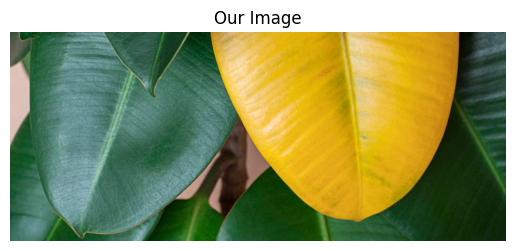

In [ ]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img = Image.open(io.BytesIO(img_data))
img_part5 = np.array(img)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

(np.float64(-0.5), np.float64(1037.5), np.float64(399.5), np.float64(-0.5))

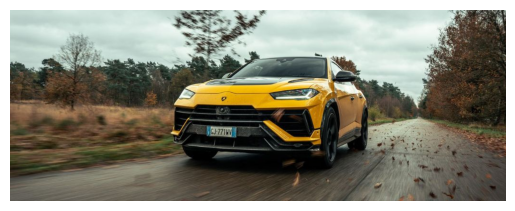

In [ ]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """
/9j/4AAQSkZJRgABAQAAAQABAAD/4QEGRXhpZgAASUkqAAgAAAAGABIBAwABAAAAAQAAABoBBQABAAAAsAAAABsBBQABAAAAuAAAACgBAwABAAAAAgAAABMCAwABAAAAAQAAAGmHBAABAAAAVgAAAAAAAAAHAACQBwAEAAAAMDIzMQGRBwAEAAAAAQIDAACgBwAEAAAAMDEwMAGgAwABAAAA//8AAAKgAwABAAAADgQAAAOgAwABAAAAkAEAAIaSBwA+AAAAwAAAAAAAAABgAAAAAQAAAGAAAAABAAAAQVNDSUkAAAB4cjpkOkRBRWRDRWdJTFhjOjE3Mzgsajo2NzAxNzgwMTYzMTg4NzAxMjA1LHQ6MjQwNDA1MTP/4QUhaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8eDp4bXBtZXRhIHhtbG5zOng9J2Fkb2JlOm5zOm1ldGEvJz4KICAgICAgICA8cmRmOlJERiB4bWxuczpyZGY9J2h0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMnPgoKICAgICAgICA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0nJwogICAgICAgIHhtbG5zOmRjPSdodHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyc+CiAgICAgICAgPGRjOnRpdGxlPgogICAgICAgIDxyZGY6QWx0PgogICAgICAgIDxyZGY6bGkgeG1sOmxhbmc9J3gtZGVmYXVsdCc+RGVhbGVyU29ja2V0IEJsb2dzIEEgSW1hZ2VzIC0gTGFtYm9yZ2hpbmkgVXJ1cyBQZXJmb3JtYW50ZS1BMV9vPC9yZGY6bGk+CiAgICAgICAgPC9yZGY6QWx0PgogICAgICAgIDwvZGM6dGl0bGU+CiAgICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CgogICAgICAgIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgICAgICAgeG1sbnM6QXR0cmliPSdodHRwOi8vbnMuYXR0cmlidXRpb24uY29tL2Fkcy8xLjAvJz4KICAgICAgICA8QXR0cmliOkFkcz4KICAgICAgICA8cmRmOlNlcT4KICAgICAgICA8cmRmOmxpIHJkZjpwYXJzZVR5cGU9J1Jlc291cmNlJz4KICAgICAgICA8QXR0cmliOkNyZWF0ZWQ+MjAyNC0wNC0wNTwvQXR0cmliOkNyZWF0ZWQ+CiAgICAgICAgPEF0dHJpYjpFeHRJZD5iYzdmYTI3ZC1jZWVkLTQ3NGUtODdkNi01YmYxNmNhNWM2OGU8L0F0dHJpYjpFeHRJZD4KICAgICAgICA8QXR0cmliOkZiSWQ+NTI1MjY1OTE0MTc5NTgwPC9BdHRyaWI6RmJJZD4KICAgICAgICA8QXR0cmliOlRvdWNoVHlwZT4yPC9BdHRyaWI6VG91Y2hUeXBlPgogICAgICAgIDwvcmRmOmxpPgogICAgICAgIDwvcmRmOlNlcT4KICAgICAgICA8L0F0dHJpYjpBZHM+CiAgICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CgogICAgICAgIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgICAgICAgeG1sbnM6cGRmPSdodHRwOi8vbnMuYWRvYmUuY29tL3BkZi8xLjMvJz4KICAgICAgICA8cGRmOkF1dGhvcj5TQlMgRGF5YWFiYXJhbjwvcGRmOkF1dGhvcj4KICAgICAgICA8L3JkZjpEZXNjcmlwdGlvbj4KCiAgICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICAgICAgICB4bWxuczp4bXA9J2h0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8nPgogICAgICAgIDx4bXA6Q3JlYXRvclRvb2w+Q2FudmE8L3htcDpDcmVhdG9yVG9vbD4KICAgICAgICA8L3JkZjpEZXNjcmlwdGlvbj4KICAgICAgICAKICAgICAgICA8L3JkZjpSREY+CiAgICAgICAgPC94OnhtcG1ldGE+/9sAQwAGBAUGBQQGBgUGBwcGCAoQCgoJCQoUDg8MEBcUGBgXFBYWGh0lHxobIxwWFiAsICMmJykqKRkfLTAtKDAlKCko/9sAQwEHBwcKCAoTCgoTKBoWGigoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgo/8AAEQgBkAQOAwEiAAIRAQMRAf/EAB8AAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKC//EALUQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+v/EAB8BAAMBAQEBAQEBAQEAAAAAAAABAgMEBQYHCAkKC//EALURAAIBAgQEAwQHBQQEAAECdwABAgMRBAUhMQYSQVEHYXETIjKBCBRCkaGxwQkjM1LwFWJy0QoWJDThJfEXGBkaJicoKSo1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoKDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uLj5OXm5+jp6vLz9PX29/j5+v/aAAwDAQACEQMRAD8A9tOKTioy+KTzKDkJcClxUW+jzKAJhSg1AJKdvoAtK1O3VVD08NQBMWppao99G4UASBjUyYxVbcKcHoAtqakVqpCTFOElAXLocU7fVMSUvmUDuXN9MY1XElLvoAk3Umaj3UbqAJN1IW96YGpDQBJuo3VGDilzQA/dRk0gpaAGsfWmZqUrkVERg0AKeRQBTec1Ig55oAVV5p+AaXbxSgUARlKQJVgYprUAQmPJpDGBUxNNIzQBXZM1E64q2VppTNAikVNMZTVx46idKAKxFG2pGWm0ARlaguFVRvOQfUVYlbYpYgkCqrTxTwko4OOoPagRnapcSLGHhlVSvJxz+YrHvPFv2G3ae5gEtuo+YwnJPqQO9X9e0j7fYT+SzrJt4ZD/AJ/pXgM1rcWur3VleXn2hHPzLuKNn3GOv5/WkaQimfQmj65p+q6cmoWNwstuwz/tCsjV/GlnbP5LFJMtjaGAJ/OvExrmoeHbkTWTSuuMGJcH/vof1HNdR4ftdF8bNDcXV8LPVCMDBCnPqAeCKVynTtqdJrmnaD4hWWVZHs79U4OdhPv6EVn+D2i0q5/s5tYALfN5NyQA3uhBx+XNaOt/Dq+fTzHBcqCeN8JKhh7qeAfcVx1z8N9StGV7/wA17JesquSB7Mvb/e/M0wVn1Op8bQxCAXFjfGF0bd5kbfMG+nf6cH3rL07SvFTafPPPOmradKnzRkjI9wOh/Q/Wq/h/w1b3EjWU0zAfwJIc5HrnnP1q1a6L4j0Ka8TTLpY+hNtNlSw9m6HPqM+hpD20Lnh3wksOpx6lpLeW4QO0ZAHPf5eoP0rt9W8Uy21sscBQ3Q+XaehPvnkV5HGvih9SnvLeO5s5HUB1PzoSD/n/AOtWrbR6zqs6PqFg0WwhVnRiM/gc8fmKYnG+rO007VtS1C7wpm08gjzFbLxSfTuv+ea7fSbG5GFvnWaPOVJHzL+NYHhS8lCLa6nabVQ7Vk2bc+55IP1Fdos0UYxvUAe9CM2W4jsUDJOO5qTfxVOKZJCQrDI7VMW4phcxfFbap9n3aXt3dAW6D6+31FYVlr0tq0X/AAkCLA6KMyHnYfXPQr/KuzuJoreFnmfYvrnFcX4xvLB9JmnwtzEinIiI3r+FJjWuh6BbT+bCjgghgCCDkEU93wpNeEfD7xxbWF81t/aMs1jI2EWb70R9CDz/ADr1SXxBE8kaopaOQ/Ky85oTuVJNHR2zg5IJ9xU+8VQgbEYJ6nmqusamum2huHXci8nJx+vb8aYkzUaQgtjnrXmnjPx+mlfaLS+tHeFgVMqgbRnsfTP5Gug0fxvpGp/NbXAIA+dW4dD6MP8AOe2a5nxboi6/rCXFikJmHyyxyZAmTuDj9D/+qpY+upyXw61KW9mltLiKV7MS+bHlvmVSfkZeTtx0HUHsR0r3nTz/AKJH85kGOGPU/X3rmNI8KWFvBC6W/wBnuYgRGwABT1HHBFdVDlVA74ppCvdkuaKB1p4WmMjJ9KjOTVnZSbBQFiAKRTxxUoUUbKB2GUHpTttBXjigCE560w89KmYcYpgAzQIhZKjEZNWzgimEgUCaIDFxUfl81azmk4oFYrMmKcEBFSvyaQcUAMEQoNuKlp4oCxWMFIIat5p6KMUDsUXi46VAY+a1igIqBotxoE0ZxQ5pjAitB4ahkhOaBFBjUTGrzwHHFU5oyDigREWpN1IUNJtNAEgajdUeDTwKAHq9PD1GFpcY60AP304GoScUBjQBYzxQDUIbmnKc0ATjNLTU5p/FAwFPFIKUCgBwNITzTgtIy0AMY1HmpGUmmFSKAEBoJyMHpQBSY54oEUdSgN3iFQRkZ3KcEe+a5PUNNnhuLKebZBLGwhl2j90Yc4JB7Nzu5rvo15FTm3inikSVEkQjDKwyCPQ0AjmPFuor4Z8Om7iD4UEDaucMR1Ptx1rhrLVD4hsJruyMxu7WRJPtkT4ydu7Yw4BxgZB/StrxreaVoivZ3kjLZXOQ9q7lsL6x56Ackr/+qvOfC3iC4sNPudB0e3iNvMzo07bpFZ3GVUdME4PP9KiUrM2hC6ud/DL/AG+z6Xc3E2jatFtYmZuZkABJTPYnI9q5L4gxLoviO0v4WlhAUrJOhG3kAAkDpnn8MV3ek6xbazp323UdNZ4LmAx7JMFzsbaCo6YznnPG0mvKvHt/CqXVl9vWSxMKAiIMyl1zhOf4jxk57E0mx04u9jlBLDqYjie7Cz26kQQhMiTD7hluMZ55rnJ2gnv7eGxZRPJIQxc4AJPc9gKg3szmKFHMoUlyp+6oqPRrWaTVgtvEZZQTs5wBgZJNTc6OXXQ9Q0vS9K0i2aFZZb65UNETa5jacNy8uf8AnnxjmuLR47nUrci2eKxZfL3KTiVs8FieNueMe1W9Phe5EsF3rN5E0xWBIm4WQcYDHnC57enrXQ2rXeo35svtNtFbJ+7WGTCIqbgpYMwzuOM5xxnjFO6JUWjC8SWGqWEP2y9FwZLldu/IVT27dsDFWdZ1k6vpxMiQRmGdNpi4G1cZKjHzHgcngUupyvCt7pAuVjhmleJzhpWRUPATuQcAfhmsEzrLo0KSQKYIUaJZY8qASc5cjqeny0XFudyZBql60/hwssUsKebalvMdSOrf7Ocf5zVPXdTun0+x03T5C6gmeYceXGOQPfceT2rg9J1SayvonspcrMQkjsCFUjt7+9dTpWnW99ol1c29wwvXnBaRo2/eM2cRgfdx3JP09aaJYvjPVoYNHik0FDFbS2/2WdkXZHzjhR1bpyfevS/hbP8A2NZoLSLfdzW0bve3r4VhjmNCfTjgen0rgfGNwmoeHZNOvLVBqFkMBlcBVx19AenarHh3xnDPpemQXMMTTWtuYg1zE7R7dw6BWGWPr0AGAOtMlq6PohiaZmpihNRlMVZzibjRuo2mkIpgKGpd1IFJ6UuxqAJA9KJKj2MKUIaAH780oem+WaeIGIoAUPSh6TyyDzS4pAOD04NTVQk1Js4oAQNS7qAhoKEUAKGp2+oiCDTck0AWN9LuqNBmpNhoAUNRupoQ0/yzQAm6lVuaaUIpVU0ASq1PBqNVNSBMUDHBqDg0baCpoATApyikpRxQA/FKKVSMUNjFAxp60HmkzzSE0AOFLxUeaMmgRKVB6Um2hSaeKB2IWWomQmrZTPSnpAT1oCxnNFxVKS2kifdE5K/3G5roDb0x7XIORxQLlMWSEtFkcNivJPGOvHw9eMswltZZGJDKu5HHuD/SvYprm2gcrLKqD3OK86+KNta6jo84hdJuCVCsuQw9jxn8jSY476nOeCvGUuo6vc2yQv8AZwcedC+9Cf8AdPI/OrPjjwEniB0ndGEy5KTxuUP447/UfjXm3h/Sdd0q1TUtCnSRWJeRVBOG7qw6g/nXbaD8X5ZZ/sOq2LxOvy71+ZWP1/xpXNHGzvE5K8+Gmt/bAba/llgVch5Ewy+x5x+PNQxXQ8LTMniTTYnjm5S4iO1s+oH9Qfyr1+x1O81Lbd2OFt1bJKDlfUMvXH0rP8Z+DrbxjpjpDfRwTg7l8oZXd6Mh/pg0C53tIseAviBol88Vgl24kdfkMo4PtnoDWn4z8QrpMbs0ojhz825MjB+nP868c0zwh/ZGsx2eowNYXDHbHcxSMY5P/iT9a9oh8ItqmiR2erMXKr8sygH8cGgUkk9DxXXNIvtU1Q3+h30E+5tyCCfY4+h7fQ5H0r0vRI9VbRSmuRXrlI8eYFDSIfUr3/DNYI8Bav4Z1r7ZpTW2op/Hb58tlHqAen8q9S0zV45bAxyBIblE+eKTg/n6e9CCTvscb4R0W+mu2vNP1QzQMMtGyFV+hQ9D+VdYZ5LIGd7YsQcFrZdw/wCBIf6VT8Pm5N3LJZx7Q4OcSA5+h6Vzl94h1Kx8VLBPbNDOeF3nyvPHop5Vj7c/hTJ3LGo+NorOdGNqlxHuJLQvtZPfaeQf09629O12y8TadJLY3KtInBDDaVP+0B/OpbnTdK8RWLveafsuivzlo9pyO5x1+o/OuS0LwZeWeq/a9Gu2hwcGOY+ZGy+m4YI/EUgtFnb6RqNrAWXzQ5jG5lDZKe2OuK17LXdOv5BHb3KGTGdh4NYmp6PbmDzZ7WP7WFJypAbp2PcfWuY8FSW11qtxGbZ1aB9mHPzL+BHSmg0PUJ0WeEoxxkY9R+NfP/xM8J6noWotf6BNJHFIxEsO5gmG67c8AH04r358xw5jUttHAHWvN/G+s6hIXg0pVaVVLS2l3HlJF9ien6ilJDpyaeh8++HLD/ieCG/IjDPgiYkMOevv+de+6TDq8TQw6dq0DwcKFuUy30z0b6nn614b4h1XTr+7MerWdxpd0nC+UnA+nqv0Nd14H+IsWkWkdjqtql2FQCO6Qcke+ev0qVob1E5K6PfxfraWqC8ZEcDovSuO8VeK4p4pbXTp4JZypxBKflf1G7nH48euK8y+IfjBNU0uX+zpWtZQAwLtiOde+30bHoc/SvPvCNlLr1yyxagYrksDGzvg7hz8x+vRu2abkRGlpdnV+F9dt/C2vTx65pxijaTeskP3UB7H+h5/Kvovwvc2GpWUN7p0qTwOu5X/AIh7V5hoPgC5upVub69L3CpslilRSHHXkdD9R1r03w9pcWjweVDGkakdE4H5U0iJtN6HRg5qRDVJZfepBLVEpl1W5p4eqQlpwlzSHcubqN1VvMo3mgdyzvFLvFVTJSGSgLlvcKb5gqqZKb5lAXLBbJqN/Y1HvpC1Ahxek31GxqMtTFcmL00vUJem76BE+/mjfVfdRu5oAtq/rUinNUg9SJIc0DuWwfWpYzVRXyamVxSGmWlxRtHWoVen76Bj9oqN48jpUi4qTAIoHa5SMftVaaDJrUZKYY/agXKZDWvtULQYrbaLg1WeIHtTJcTKMQpuwelXpYe4qHyjQTYrhaQrmrIi9aXy6AKezmjy81b8qjy6AKnlmgIRVsJQY6AIUzUy89akSKpliFA7EAHNLwKsCL0FPEPHQUBYqrn0p5FWlt89qk+z+goHYoMvFMKGtE2xoMHtQOxnGM0iwkmtDyeaZOBGmeOfXigXKQLFjrn8KztRnutMMr2tsJ4ynmFCfmJGM4/4CD+NX/tQg0/zH5Mfyuc9D3/xrkdR1thi5uXka0tZI2dkOFbcSpGe4GckewpBseQ/F9NTvpP7X1BEh025CraRqx8wcZG4dAcZzk9DXO6dCmi6ra3sWoA6gbcSMV5TcxK8Mc78qD6DkCvTfihY2esaxaHT4Be28UJuGW22mRySF3YbggAY6cHFeW6uojgIuv3VwkZSJCAv2ZlY5UE/eGABn1Y8cVlLc66bvFI6DxD4qu4yyi7FvcKr2q2YIVYY2GR065LHkgY4FcfptvqEUzWVn5cv7xSzbQ6FuSW56gAjgcGrk8kWp27XE1lALubZBnaSwbjBHPDHbyT2NVNHQf2kbaYwRmM7h5jlQUUgkEjrkgDPes+Y15LKyM/UHie7V0iDzSuC8hHljIJ3AKMAg8du1Ns4pY9ReOSRGkLqmFY4bpwCP6Vb1i9gv5ZboqEnExCKo+RFzkAHrwSf0qz4dmg1XxAV1doba1lILzKAGQEhcr0wfwP0pN3NElFXZ0nhuxuItVWeOLzYoZgZwFG22JJUY/u8fjke1ZfxAvdEn1S+YWUtrcQxqlpHbKNqt33sSc44ORyenFRa5fR6Re6jBp11PJp7zHbGT1RBhWYEDPBYcgdao6VFc3O7VL9YobeUYRnTGB1JUcAfX8qpMya1Mnw7qV35j2cQRLyduZHOCowc/N+PTNZmoNcWMaRPch7YvvaFGyCR/Ee2a7KOzNzZx31k8uQXVIgnlqApxhXOM4zkj/CuXF2Z4Ej1S0jzKvkwvEAAP/r+9XcnVsdFdaeuk3lqyKs8+JIpSvKY6r+NeyfDmztLrSTpEUqNJcxoxA+9jHzbVH0HzH1rwy9kjsLaWNEjklYgh5BuEYB6CvTfAOv6dLHaCF0guvsUkFw4Bj8sDlSCTyT1J/8ArChaq5nNPY3/ABr4RI0a/ggtUltLUM32hn2qj7sHB7gYx7nivOdO1C3h8C2itbRy3pum3ySoDtUAgKM9PpXsepX8uo+Eba3057e0sUgwJASWuCqn7o78nrk8/jXzXercxtJab3zHIxKqOfqapsUPM+7xCtHkL7UwSc04SVocohtlpptRUnmUokoAbHbKOtS+Qo7UivUgegCJrcHoKattzyKtB6cDmgZB9l+XgU0xEcYq9nApnGeeaAsVDDkdKYIM9q0AuT0qRYwaAsZWwqelKBWhLGvpUZgFAWKoXmngDpUjR7TTcUCsROgJpnlCpypppBHagBEQLUoANQb/AHFSKaAHhQKWmb6duFAC7QaUJxxTd4oD0AShRT1A6VCHpwegZNtGKNopgelDCgYpQGjaKXeKYzZNACkU00U4YoAbt9aXZTsilBFADdgpyx09cGnqQKB2GiPFOCU/cKTdQMAtSiogc08NQNEwYY5o4NQ5pQeaAMjxD4dt9YhZZQDxwpHGa8C8d/Dq+04tLDPcPGWOy3aVsAf7LZxjjPOD6V9MA+9VL6yhvEKTruHSpaBaao+fPhtol5NcyG98+KZDtTzhtJHrvHX6NkV2Wp/CzSdQVnltp7a6k5aS3bjPrjpXoVrpNrpm5kBxnOMcflWhHcwPgLImewzzQLVu580eIvD2veEJUl0vUrk20R+Z7b5JOP70b/K34EfSrWnanJrdvFLdiB7lSJBd2mYmJHcgdD6gqPrX0ZNDb3C4kSOQehANYWq+FdHu4ir2caNncGjG0g+oI6UDb01POn8Xx2+mtNP5V2kXAW5j8tz9D91vqDTrf4n2VvHDFcWslirjPzoWUD1BH9cV3el6BZ+UbedI7mEdFlQH8/X8ae/hPTEhkijtY/LbpGy5Vf8Ad/u/hiizJ07Hm2qatNq3l3Onz23lE7opRKFJ9sN/NTWLNrM0Ql0zxNHcWgYEx3ZTejD3P9QQab8ToYvC4xbWEih+AAuY2/D/AOtn3rF0LU9Tm0aVr1UmsWiwu9Cu05/vjIx9QaRaStc9M8Cac0JR4HSWEoGWe3kPzf7wPBrs7rRbG+RRfQrLg7iGHGfXHrXnnw88Q6PpdhFbyTfZn8vKrKQAfoRwf88Voan8UNGtbxLW6eSF2bYkyLvj3ehxyKq6M+Vt6HaXVrDa2mIVIwMfe7VkaZq1h5sjRTASRnDxdDnvwf5ivP8AW/Fmr35b+zlmltySolSIsB7hh29jXO6Nb6pqF+yLfwvdK2Qiybtuf9k4ZD6gflSuV7PuevX+rWmpFIdxOWwCvUfUenvWrpunQRxrKyqXXpIOCfr615vb6Nr9tMnnRC4jJ/4+bZyrJ9VPB/Suvm1b7BpTwauTtC5+0bdgP4560JktG3rWpCxtmZdjvjhGYLn6E8fnXj2t/ER5rtoorRJ1By8UuYp4fVlz1/DNcn4r1q7vLy4tYdZuG0ubgO6qwT2Ddx75p0mjy2Wkxf2jam5shytzBl+PQAjK/TBH0pXuaqCW5c8UeGR4os/7TtLuK4aPhkaPyyB747+pArjfDllc2128Fk0V3Zbx5icSLnsG9PTPB9zXrvws/s7VrWeH7dFdbzzET8yAeo6g+9XLj4ZQWXiMazpt+0EzOCvm/NGw7qe/86LXDn5dGecy+D7rxDcXFisP2C5X5o4Q2EYdjk9f51PZ/D6fSbhYtTkdCqh/PUYdT7YPI/z7V7rIdPsjC2olLdyeJGIK59m7VfuLNL5gd6y27clT8w/Cmool1WzmfAel6np0YFzereWxyUccEA9v/wBfNdsKS3t44E2xqAPQU5hVGTEzjvShz600im0ATBz61IslVc0BqALgkxQZaq76TdQFy2Zfek8w+tVd1IWNAFrzPegyVUDGnA0AWhJxRvqruIo3UAWS/FN3VBvpDJigCUmk3VA0nNN30AWd1AYVW30b6ALeRTgwzVPzDSiSgC+smKcJaoebThIaAuaCy1IsvvWer1YSgdy6kvvViJqpRjPAqxGCtItMt0MwA5qIPTHb3oKuEkvYVAXGOtNfOajINBDJMZpvl809R8uaaWoEGwUFB2pyMKfxQOxVKnNNZT6VeVATUjQKV6c0BymWBzUqxk9quG3AHApyxY7Uw5SukZHapUiJPNWUX1FPxikVykAiqRYqlAp2KCrCJHTigpRQTQMTaKjmwilvTmnlqhnjEyBGxtJ+YEZBHpQIhNxC0hRZELAbiAe1VrmeJEZJWUMSwRD1cgEkAd+Kx7mKW21iO3kuSba4B3bSqLDg7gemTnbjrwKreL/tjW327RIobl4g4ADZ5chSQ3UcZz364pE7mB408TwaH4e/tS4hdoriUxQLG+QTt4Y49jzXn58ZxXUBuoboTxx2hFxZmLG+VmO2NOv3VGSewPrxWJ4thvbO+1bQdWe9VY4I5LW2M+9H65IYY9SQMZPc8c8/Bogn0CdtJhmaaLM87eWFaMYK4LHBCgjHGc5rNydzeNKNj1zQNX8L65NHJodwbTVliAV2yrBgMnCYII+XJzwB9a8u+J7PcXa3F3eQ315JGjPJAuIyOQAO/wBRWa+mSRLBcxQrawS253C1nLhyFAIJ9eQSvvzVjX7m+vdFsIbmCKKO3ULFIh2mTcMkknqf4fwNQ5XWprCnyu6MP7HdtZ28sUg8wuAEU7X+X+ID05x69as38KQ4s3tZvt8xRd+7LFue5GDuJ7HtVey8u3uVlZy6RkYJOSpx02+/T261pao9ol9Ct1K81kIAIyrjeG2gHn2IIA7DpSvoaWdzm54HsLiWCfKzRsUkVnDbWBxgY6060urZZo5JC8aoPmzyWOeMd6kFtatcnExTCli20qAcdO/P+NZyW4ZxHcMpXnoOcev/AOupKNqb7IZkhcsYi++RmODt9zz/AJNalnLFqktrbadbxq8QJ2t91QoJZmB5J+vYVysUiW1+ocNMikZYdCB1HPvT5pop5ZJctAWcbewHrn1ppESd2dh4juWGg2htLeVBb7hLJNsAZmJwVQHofp+dcm99dDTkg85G+bzFCqDs4x6cVUvdR8w26u63AQbMtkn171OqW01krOvlyklnZRjjjAAH41VhR00IbmKO7g8lkEUirgMo+8T61FplyljeJDGIFRkMUrsNxGeCRV+0Fm0Hl3KuJAdyuDkkduM1zms2vkajK8PmmLcdrMME/wCFVEzk+p6pqfiW9uLCKBf3VjaJsVs4XPbj2HYV5/qdx5OrXBto3Bkw2ZG+YjHU/U1ciuptUFos7EvtWPJPAA9qZ4t0ueG8SaICRHXCvGvyn8aF5ja7H2SJfelE3vVIs2aTee9bnnl/zfenCX3rN8w04SmmBpiXnrUiy+9ZYlOakSWkBqLLUqS1lrNUyzUBc0xJTt4rPWWpFloHcvq/vUofjrWestSrLQFy0SSaaxxUYmpC+aB3Hsc1TupDDKjhQQeDzg1LPIqRMzNtAHWsa/Y3tgXjdSB65zQTcvS3oSVWUkgj7uOallvIVXLMAT2zzXnt5dNBqaws0joVyhjy20+hHUU+5+1zPskfDgbl4wR+Z5FA7HWXt9DbQRsCV3Nxkcn2q/BOssCyLkAjPPFcFc6jJ/Z0UN8Y2mzwSNuR9PX8av2+uu1jGsTBZAdrKwOQPXpQKx2AkBGQQR7Uhf3rD0uWbH735wx4K9K0t5oAs+ZSrJVUvikElAF4SU4Sc9aoh/enB6AL4k96USVRV6eH4oAtmTHegSVTMnNJ5tAF3zaQymqfmUeZQBcEpp6yVSV81Ip96AuWxKR3p4lqpupwJoHctiSnh6pZNPVqAuXFf3p6vVMPThJQVcubqUPVTzaPMpBcub6Xf71SElOElA7jr+D7TCVVir9iDg14Z8QbbxboN3Lc2dw0sBy0bsqqU9RnO1vyBr3TzKq6jCl1AyOu8EYwTxSaBOzufNmifFjXPM8i9hdbkD5blY26j1QZLD6V6f4a8Ya9d20Bv7C1uZXHyvDLsDe+GHH0OKz/ABB8PdG86SSW0mDynd5kan92fXKnP6Gs/T7x9BkMFrLcsB0eVTcw/gSNy/jUq6KbjJaI9YkunFsJ2tZoJsZYEdD9RxWPdeKrrT5E8/Tbm6gbnfAu5l9iO/8AP2ryzUvizrEbLaWcEauxwPOJCN67c8/rWhpmsXt6Wne8uNJvcANBJGJbaQ9vu4dT7g45707k8jR3N14t0PVEjtryyuvs8z7PN8kuit6NxlD/ALwFaUXh2xj02ZrF4QjjduCghvrXkdz8S7q01E2uo6U1xLGQHubQLL8nckYDfmPxrrrifTbzRmnsdTubJrgBtiZJB/3SNw/Ami4OJp6F4Ltp3mF1Y2rAjAaElGUH+dUbz4TabFcRtp11cW0kf3VlVZAfbkc/SjwjrF9KJYdG1iwvpYwBtlLK4/Pr9OK3rW/12+2RX7RWVwrYkV082CUf7LDlTQGq6kNjHbaNF9mvbSCKXqJLb5Vk/wCAE9fofwrzrx/p3h+5vHu7oyxMw3JcWihZY2/2umfowFer6lYR3FnKmrNHIj/8smYMv/ATwRXzb8VdQMGrTRQRi5tAvlBmc7k9RnoeO2aTKpq7Ov8ADXjCy8MLHHNrV5fW5X/j4LNJGR2DKRlW+hOfQVX13xyviW5ay0zVLdrVlIkhmUI7ntsLfK36GvGJ7XfBHPb3eYGG0ochlHuBwa0tP0qKayj+22siQbsC8t+SMnqy9CB+B9zSu2bezitWb17PYw3DQarNJEr5zPBGVw3pJEec8dRke1W4f7UtoRFoetxXMDKDHtYbRk4xgkYb2OPpVjSfB96lzBam9tNQspTgbs4A7YBG5T+Y9RXr/wAOvBEOgs/2pFdZjko6gj8un5Y+gprUiUlE8e8H+BfFzas14iy2d0H5lYFS479Dz/I19D6RomoPYBNSnbzSu1th+R/qtdPEsEA2W6Yx0X/CrMTbl5Uj61SVjOcnPc5HT9DNvJJb3MYlt25Csvygf1/StGy0i204kWMZhjPJjU/L+A7fhW8QM0wqDTIsZ5BFMIq68XtUTR47UxWKxU0xlNWCMUoUGgRVwfSkKn0q8sQ71J9nBoHYzcGjBrS+zD0qN7fFAWKBBpMGrZhwaa0RHagVitg0oqbyz6UCM+lAEeM0basrCSOlI0JoAqlaaVNWvKNAhoAp7aAtXfIzR5OKAKmyk8urfl0baAKgTFOEeas7MmnJHg0AVfJNPWMjrVzZxxSbaAsQpH7VPGDilHQU4UDRKhxUweqoPpUgNIpE2+kLZqMHNPAzQAuQeoprYpzLUTHBxQAFwAahZuaVgTTfLagQ5XqUPmolibNSIhHWgEWUarCNxVReDUoagpMs7hSZFV99Aegdyzuo3VX3j1pd9A7lgNTt1Vg9G+gLlndSbqr76XzKAuTZpCwFRb6huZHVQ6glVyWx1xjsO/0oC5yXj7VI4JobYIU1BiGs2kIMbMASxAyOcZH41kvfR6dJb2tzebbRrUzW0kDhMncTI8jdAMN6dic5qtf6pDrd+JZrKC7FiJJIL2Rh8u0hgqrwQxPy59h7159Y3t7r/ixby1kkSEFlEcgCGNF27kQtnbuPBI9DiobBK5lfEidF8WEQ3n+liJ9zOpZkIXHzN6kAkcDaW9q4qGO70+KC4v7edbS5IJjLlPNTORz3yR19vavcfiVo15qFtctDLFFcXJSKBYkVHlwGBTI6BuTknsMntXiOr3SqkGnm8nuxAijLt8iNzlFGTwD0P14rKe51U3eJPYTvc2bx+bA8ly5hjhkb/VMfmLKTwM4GT79atam97f6di4v7aa2tEEUCrJ0QNgqv1yTkjoKNPgjmtpbu8awigDnCQIC7uCo2YOSAQDycKMnmszVmmnv2MKMqyjK4ZVyvQFsHHb2H51F0bJPcrS29ukGYSyybiCBngDvUM1wCVVwWdFClnb7w7fpVyzsnkWeDdvfaGCjgMRyR+FRrBFJfRbwVjkX5xJn5yOuPQU+gX1K84ysSj5QDnI7+vFQR7YmPlncS3GOhFS3o8qeZVTai5UIz5IOPUdaoQ3AjZkZSSBgcYoewuZXsakdoGtJYvJQXO7eZCc4XHCqOxzms3yJppAhbKAkM7Hr68VEl1KUZVLBTkZJqWzaLyGR5PLbqo9enU9qEn1E3EhMMUSysdpk6LxVUWk8UKyo7gZwFznitCUBVIKgl+QwPUe1Q28pjAY/Mo7GnqTox0FvIpSQsBEVLgMME4/8Ar06XbHDbGe0AG0tuGRvJJ5P+e1Url3mZ5Qr5/hC9vrVzTtRENu6OgE7fc4G0e/NN6IEk3uUtNuyLmWW4jeR4h8sa8Bh6Gr2t65d6pHAZpcJEojjiVsCNfQDtWQJj9vfyzg9WPXNMAiFw4Mgx1yOmau3Uz5m9D7lKDtUbRg1Y2UnlntWxwlUxc8U0xGrojNKye1AGayEGgbhV8x57Unk+1FwKgJqRXIqUQnvTvs9ADFlqQS0nkAUnknPFAEqy1IstVSjA0DIoAvLLT/N96oBmA4qpNqBQgBct/dBH5UAaV7cMkXyDcTxt9RWMl2ttbklVEZyPm/xqT7bLNGshi/ddxghwfpWQzG9M5imMmxsFCmOaAKF3JBc6hFdW7Rm5hIVwT1X6mnajqNtBdzozlWWHIDjgn2qrZWZ/tG83yCWMjdtzyv4HrVSO6srzV4reTeCEbhgSrY9D0/CkVYR7wX1rbrborvEuZFdSMZ9GFWLdld7dSuJUH3Q2P681jSR351yX7IkaQFPmIJx+OBkcVomyic20sLGKQ5DSHkL6/Nj+YoHY7PTrlUtkeNgbcjGCeQfpVz7Zify3QgEfKc9apzxW6afAs0ZlRurZ606BbOW5jNpIj7Rjdnp7H3pkGoMsuSCPY1G3FaHk5ReQfcVC0BzQBUDGpAxxU3kAHkc0jKF7UAMBPengmmFgDS76AFJzTec0hcUm8UASDpSbuaaGFKSO1ADlYk0/eQabEKshFNADUZmqdAe9LGFA7VIGFIAHTpRzTwRStjtQMiOaBmrMSAn1qUxA+lA7FMU8VYMQApnllT7UBYixTS2DUjL6VH5ZPQGmIXzKiu53SBzGyq2OC3SpPIc9qqahDMRsaAvCepFJgcpD46+z6uuma1atDvPySjDI/wBD/jW/qNvaXNpvtTGrOPlfbtOfqMH9a5PxF8NrDWiLhzcof4VD/KPqp4P6Gt3w34dbT7NLZpZSsYwNkh2n6q2aQ3boclDaG3vmfV1iVEf5hcQBw3/AsfrjPvW9dXnh3UNPkWwfTZp1GBEzjOfp1FamsafprWUltfTTW28FQ6kYB/EECvnXxZoUOgeIYXvdRkuLSZ8rdwx4dOe+M/mPyqXoXBKW51d5rMM+rSwXumaWk6kfu7ttrykdkkAx09az/Ffiyx06FLSKC+tyNu6wuQJVKHrsfn8CDWppGh6JNAl2vidpUMilZVX50Oe/XH4it/x3oNqfD+68ure5gVM/aI0EUmMfxcFT+S0altxTMDwZqvg6+lkuLEX0GoZAL+X5jD8Mg4/Gu9g+33iu+n3zRTIM5xvEg91bH6j6E14bHpukWenxX0r6ghDF/Pt4zvjB5G7bkDj6Cuo/4SeOTR4pNP1mVL6LAjFzkK/oCxHB/wCBD6UCceqF8UeItZ1Ga80TUB9lKH5ri2jY/L7ocFe3Iz+Nc1oJOgyC1uY7HV7Rn+SKNiWdj3YMNwP4GuyGvWniexaSeKRdZjTBWePccDqY3HzY9zuFY+gXMuk6pcTajo13JBLgCfyBNtH+0ByG57flRZDvpZBqvw9t9UuBHa2z6a8yeYsoUmIH+4wHT612fgbwPp1ozWGvaHPZ3KrsW8gkJjnXHXK9D7EVv+G9al1UOkdjutzlYtwMbFfqcj8Dg+1dlbXciJ5csFxbAABRImQPowyKaRm5y2ZU0vwTpulqFsmkEY+4HO/Z9M1Z8SyxWVgsku8CPpJCSrr/ADz9K0LWFmBMkoY9ih4P1FWfKQrtYbh70xbnM+GfEU93GoeN7iHnbLs2N+I9fyrbtdSjurho4z8wPKnqPrVyK3jQERxqv0Fc+2jK2tpdqGWUAr6HH1oEdGGp8YJbpxREmAN2c45zUoIWmVYGQdqgeHPSrG4UbhQMovDzUXllT0q+5FRsRigloiRasKBUG7BpRJQBMeKYcHrTGkqPzKAuTFF700xrTDLTTLQGhJ5a0CIZqLzaPOoFdFlQoFNYAiq/m+9I0tAXRNgCmnFVzLmk8z3oFcscUpGRxVfzPelWSgaZJso8sdzTTLSebQIkEYBp4Rar+bSiWgd0WQFoKg1AJKeHoC6HhBQ6YFIrjNPzuNAyAEA07dT3hJ5FN2EdaBAG5p4eq7tg1H5tAXL28Uny9ap+dSiWgLl0EU4AVUWSniXjrQO6LBIphaoDL71GZeaBXLPmUhlqo0lRtIaAuXfNpPO96olzSGTFMVzQE3vSib3rN82l873oC5p+bS+bWaJ6cJ6Q7mh5lHmY6mqAmz3pguEuFkSKVSyko20glT6GgLmmJRjOfejzQyPhiAB1ArmreaW3vLoT3CsQoKqD2x059z/KrWm6jGySSM8fl7Mhi/HGcg+lA7nCeJm06ea4hsLieS902ZZSzRF0iBG7BO4eh5PIwOOlef8AhS6u59Wu9KYxyQNNITOuYpfL3b2bDDHJIwD78jFeg+JPFOkrbpZ6xCXhbE0lzCQUZecqGH8XbacEgZxisTSdEtdIkttY0nF3HA0kV/cq/LoduzYgHJ78dAG9ahmsXZanBeMtTf8Atq108o9roys5WSRnYsrHDucklhnIGPvYqv4osdBu9OsH0u4torkKQkKq5LoG+Xcx/iOST0HYZr03xn4L03UNPuNRtVkNwsaW8dvI5AQ43YGejksflOBzziuP0D7PpFpcaNPp9pNNqAaJL+3TzWt5SNhQhQc9CeB0as2rG8ZppWPOleW3Hm8B3UqQhzx3+X071p2GstZ27xR+VJFIdyq6DavBXkfxHH5EVZ1GGw0SO9tFaK7u0kEYuFICjDNnA9DxyaxVljguI5vLiEnU5XKE/wB0j0rN7nSndNjI7gxytcG4dXYgLg4b0x6Yx3rb1vU9IvrWGMIzyWyNGG3ZeRjgqT2xnOSOTwMcVzUziWeQWy7Ygd2wk7lA/lTElO0KqOJQcl+oIPTp0NGtyHZrYn1eO383fayErgNwu0L7Y9etVIVeVNuWkDHpTZCY2kUbWJ+X1x78U9/LEa+Vu3AdR1yasjYjmR4HKBGULzhuufeqksnBbkZ6gHgVLslOWnAdUORk8mqvlvLgZUZ5znApkN2LUc5uUCxjcYxnIXnFMuZXlhZYgRxzUEkjQNkMUGMHBxkVLDcEsDEVKDkigL6EyyBNL27QJDgNjv7+1RxwxXgCQwv8g5IOcnuc9qsXDIsqk7tmPuqM5NGl3cNpcefN5keASjJxtagbehm3VlJarJMEHyP5TluvNV7BlG/Yod++RnFbd6N4LzqrfaTvDsPmC9sD3rFDXEc8i21vKBnrs61e+hHwu6PudXpwkApphHvTSmK1OInEmaerCqoOKdk0AW9w9qduWqYal3mgC5hT0xTgq461UVzUiuaVgLHlqfSlEQ9qhEhzTxIfWgB5RR1AphjQnpShh3pFlQlscle2aAI5fLjwSOK4/wAS2rR3iXUJbyWO1weV57muqub+zMAMyt1xyucGqOpfZ/sxa8dVg4PmMMLj3Pb8aGwRQs9LYQiEzbG+8hPQj25rO1gS2kwW6gkjLcC6gbqPcf0NWdRs3gs91jcg2XDREHdsb091NaP2me4tkQ2uZWToynP5YpXGcSk3k3VxDct+9BDRuy/61OPXNZttaWp8Zu3zRB484YBcMM+lR3o1Ox1+Tzz/AKKQVMVzmLaP7y5z09q5bxFqV2viVYmAmvDGFhlV8qynOMkfzqbmqidbpN895rN7aKskSLJsVgSC444zj6V0c0Mx1SCLyx9kgBDknGR71Ppunpp2gR3l7bKb3ysuo+8PpxzTNM1KO+0y3jtbYu0imRpJEABHpkmncjfYuQym6uXtoYswqu0Rscj6itTSbNd7vBCYd33ywBDY9s1zFhqpSExsYku1fYFtxvJX0Ydc49K6a21U3EwjslDiMfNluc9xj/GhMTTRf0/V7d7+WwyiyRdhWi9xEHZQQxU/MPSuMhu4DrjILeWMzH75xg47VrwyRXWotbxMuI+XGev0qiWrG+QGwR0qJ4c5qQLtUAcCkyaYFc2xIpptTjrirW444pPmNAFJrY+tMMJFX9ppjR8UAUimKBxVkx81GyY7UAIr7akWX3qErjtSDigC2svpUysaorJg1Is9AF9WJPSn4J5qok9SLN70gLcTkHFWVcdzWcstOE1BSZfLj1pC4NUPOpfNz1oC5O8yo+CcZ7npVuFlZQeD7is1m3LnJ4/GpLWYAbQfegEzUULTxgdqprNzzU6yAigu5IyDHTiqd4pED+VGGfsM4qrrOtxaRCZbtHFuOsijcFHqe9Nh1S1vbAXtpPHPbMMq8bBgfoRSEzynxvL4muFngOnuLYEqGfGTxwVZSTXkEmr3ixSade3u4RuVMM0RBz6Z/kc19G67b/8ACRRSxWNzIBjBktpRuQ+6nrXI2HwsW0uPOeXzJiSfOlj8zr6jg1LRcJpLU8N8OWmt6dqMc9mhuI1kLnyiWZQexHPH4V6f4l8Yzah4YaF7JGkZNjshDCP/AHhkEfga6ebRrvRrtbnUNGsZ7VGyt5p5ZJEHfcuOntzWB8TLSx1zRop7YSLNHysqKGOO4LDkD8qLWE5KTOP0bxfq7aYlnaacbtiu2OWPBbA9GHXHoRW14Q1QajfeTr9hYHUFPAaHyZiPUkDb/Kk+GHhrWoLVZ7C8a0tpG3GBoxIp56knkfhXpGqeHLt2guWntJpI/ugqUYe27nj2NOwSktitYxS6ReK2nWsd1Zkkzqx3OnpjP9K2Xu4JJldtOi8p+c4OAff3qSyu4rGKNb9CrfwDrk+xrcgv7a4U7ApHfIp2Mrk+jPatCfJi8sjqCc1Y1W5eGzZ4ACyjIBGc1n32pWumWcl1dyx21tHgtI5wq5IA5/EU+SSO6hU53IwDKyt1z0INMLmJ4c16PUL14pJfstyDjyS2Qw9RnBH0rs1cAdc15d4m/tO2uVGnQLcSE5DSgEEemeCP1ro9A1yVreOHVbf7Jc4xjdlW+nekM7ISCnBwTWYlwGAIORUizc9aYXL++kL5OBXn3xK1q70JdP1O3NwbdTJDMI5Qijcvysc8EggYGPx6V4NJ8QPEGmeJr6aPUX825DCVZzuGDnGV6LjPGKQ7n1skwYAqQR6il8yvI/gx4wtrzSXsL2+UzRHcplJHJPIDHqOQck55r1cc0xXHl81GXxTgpJpGiPpQBEz0m+nmI45FR7DQIXfRupPLNAQ0ALzTkXPWkAxThwaAFKVEyHPHNTA0uaAsVirDtUZzV0kGm7F9KLhYotnNNOa0PLU9qyPFmpweH/Dt9qczxIsEeV81sKW6AfiaLhYm3H3pQ5rldA+JnhXVzHE18lrdFWLxzcBSvUBuh9Rg8iu0jFtNNLFFJG8sWPMRWBKZ6ZHai4WK+80ZJq4Ldc9KlW2HpQFjPIalUGtD7OD2pPI5xigLFLDU4Eirv2b2pGtvloHYrK+KmR+ab5JzwKesRB5oCxbjk+UVHM+77opEGKkAGaCilKh9KrmNq2cKRzUEka7qBNGYyGlVTV9o1IppQUXJsVACKQnFWilN8rNAWK3JNIwOat+UAOlBQUXCxRIbNIAav+WMdKaYRRcLFTbmo3Q4q75dJsFFxGWQ2abls1qNCuOlMEC96LgZ4Le9P+YetXBAoNSLGoHNFwKKlvenGNgC8QAk+n3vrV0og+bApryRRKzMwCr1J7UBY5jV7RbOwubo2slzOj/aC00gATauBznpx+prgtK8QaPPr8b2c0ksUm6MwKwVZJPlYNgjPHTIH8OD2z2/jbV7ebQL5LG63sUe3IRdwLlThWI5U9RyO1fP1nBqel2dzLJdrDfxYtY7eQ72eNhsJC9sDAB57/Wok7G9OCadz0XxX9h1a2WW9tzLJIWSO4tztAh4+ZlTn7/GSORnFea6tFe6a9xaLefPaOQyRu2Jt3zbuwHVRjORj2rY0dJ9MuI9P1ASWtskcn2qN4csVIf7oHUZP3ugwPSoNT161vNYj1SLSRGlu2w2pQOJCowqsMAc4OeOx61m2dEIW0Oj8PeLF1L+yrK7vZIYAnl3MC5jEuSuJt+DznGBjtzW78VdW061vhFBaJ9tt0VWu7eEoY5C3O5uMrt7rznuK4eWBmTTZikMsAxePb2zLmOIqvmllPoQcLu6HIxVnxvI0dl9nWZI7O/uRMpDEMTjbtLHg4wCQSQMjFJvQIxXMrnMeLLW1gvDOs6Sm8BuFjUbGQE9CM46YPHrWPaTwSXifa3dLcHa/lKMkd8D1xmq91l7iJGKOIgV3cHPpz6U2aA7IwQ4jcEkbQOR0AqWzdbWJpf3VwZ7d2CN93oCR2yB0qa/R5biV5Z45S6bvMT5EGB6evGOlM06BGgV5nAgDbGyuQpxnH6frU8jSmdkmj2RI33WjwFUf48UrofK2Ypt3eJfLibld3Hp60WkaiE53Z6ncMkewrXu7wTygIowkYDbQSAQMDIrNmLEEK5OGOVUYx6/Smm2ZtJaoqyCRSWHTodv9aJYoOWUyM2ABkYH4CrlorizlUXO5XbLopwTjpuz1+lRfLNvcyBFHG5zzgegH8qfMTy31Kq4ePAEflr1+XmkR1kQBEBIbaoA61ckEDy7Zn8shckR/Njjp6ZqnI8aMixfum7urdTQnqDjZDbiO4llVYxsZD0x3qSKKeVvK2yTu3yBY8cfnRMLudhsdA3QZYLgY9qsWN5CJ4Yr4kqvOFJAzj1/rVXJsY9ystrdLDMJCeANuCc+nXApb6/RUjLx5K5TEjFsY9AMAfrXQatbwXC2EGnjdOZcqo5Q8/Kqjr+NY+v6JewrHPd2gjEjFVdDkMR1H51aaZDPuUlcVE+D0rJj1i0k1RtPjnDXaruZBzjr1/I1Dda9aWurR6fM+2Vh8zEjCHsG9M9q0OM1zSc1Ck6yf6tlfGc4IOMHmnb2HUUwJMGnhTUHmH0pRIc0AWBilGfWoRJTg+aAJi4HU01pkUHLAY689K8w+K3iXVLJX03SBDFME82SRpVOYiCCNvX8x9K8P07UNXaeTGrlPkKsGuW+ZRn5c/y+tA0rn1TfeKNHsJoYbzUIIpJtwQO2AdoyRnoKy7a+Y3zy2k6PasBIFVt24HuuO1fNuoRW9wFRbhbojnzFJXGcdc9+xrofBPi6Xw3PKiwieJ8Ao7E4x3Xms+a5p7Ox9D37Yt/ODspkHI5YEeuOtY15ql1o4h3o11Zvw4jCsQD+tUdN8VaV4heFLKcq8hKeRMoDZxnj9e9bNy8JhVJJYGaPh0Kbsj/Gq3M1o9TJjnthb3EdtMrQT/PHFkZX1GMEflineGdWeSOSyuPONxEdypMCOOxXI6fQ1FNotn5x1LTljE0R/eeWS6yr6MnY++KbPbQPNa3mmW4E8RLiOb5SB3A9j+FFtR3VrEvi+4trCeDUbhnSJv3ckJbOxj0PORj8K8/+H9tFqXja+YyM6w5MciL8iZz1A4GR/Ouz8VapZ6lZSGzIeZP9ZazJ8ucdwQcf7wyPrXMfD7QLiSHUmmuF037XMTGsIzuHt0pFJ6anXatqsllE1kCiyZ2q7HK89x1NZmkRR2el3dpK5nYE/uwcgk8nacD8q0tH0W4GoJb2wuLmO3O52ncfe9s1LevbNq95JOZIbhAAsAGNzeoAJz9aLCOc07TjHqMYsx5SJ99DgN78c5rtBdi3s55Gh/e4ASZcDcfp61J4a0qRFaV2SZpP4Dyy/Un2rO8WWMkIMLShUkdQNw6jPTj609hXuUZ7WK+sQzSGK5V/vZwxb/Peui0VFW5AgGJlAEhZiSfx71lajpdy9nDHcWLeQhBiWGQAt7+orQ06KewuIsCTypRgI0nKn+tAbo6e2vllnliLruTjANWC65x364rnrvUtM0a5iGqSpa+cGaNpVPzkdQDjr7dTXM+PNXE0ek6l4b1CO4k3SR+WjhA6/KSdxII2nHrwTwadybHpG8cYPWlDc15I3xISQRyXVuIbuCRlQJMrwsxDD5mH+eQa47xV8QPE1j4ndWn2RxbVaNFKo2Bnn88ZBwcUXGotn0cJBnrSEg968G+Gfjy6uvEUraxO0izqI0eQcDkcZ7DHPc17LqWq21npNxfxMLqOGMSlIWBZlyOQPxouKxfuJoLaCSe5lSKGMbnkc4VR6k9qjtL6zvFlNvPG4iYqxzjGO/uPfpXAeIfGul6voVzZfZryB5YiH+1RGNYmI4DHBGPfpnHrXija5dWt19nlmaCNIzA4tflWcH+92ORn06U7jsfWLRKwyOR61C0HpXK/DPxBHrWhQW6rHHPbxAeWj7vkHygnk4/Gt/UtYtdNvLW3vmeI3RKwyFfkZh/Dnsf50CLHk+tIYsdDTft9t5dvI0yBLhgsLE43kjIA9zg8UaleQ6dp9xe3ZK28CGR2AyQB7UAO2H1pwDdjWRqfiTTtOstOvJpQba+lSOOUHhdwJy3oOKtrrOnm1sLj7VGIr8qttk4MhY4GB+FAF4BvWnKXB+YcetDsscqRswEjglVJ5bHXFPG4dqAJ4wpGTQ8Y9aqlWByh2n07UnnkcSfKffoaVgLQiXqGZT7Gqd/erYDzJ1yn95Oo/Cq91qQtGHm5CnjJqndaj9qQIrpGx7ONyn60Ab1jqNveRB4JFcH06/lV5JgK4y1mmsc+bb4Un/WRDK1t2dyJkyrkr79qB3Na7jgvIGhuFDIwwQa8616wXwVY3F5Y3McOnEljBIByT2X1+nWi6+Jek2n9opcPGtzZShTAsykum7G4Hp7kda5j41a2uq+FdOl0i8hlgnk5jJAcf3WwTkL15+lJopMqX/xNTSYohaW/k6h5zLcJJyoG04Kn0yQfwqfWfitqg0XTbzT4VXyyDctKQpfA2/d64Y5Ix6V45rVleadFB9thCFtys6HJJznaQeOBzkdmFLaeTd6WwWTygxYMxZScDDAbTyB9P/rGbMv3T3/4cfEmLxE81jqriC4ZmaFyRtK8nBPA4GBnvVvxtZae9twwbI3ERBWD85xjpXzdoGp3OjanHcW8zQyxuHVgew9v4h9eor1aLWv+ElGnXcNvbx3+5lmSFcIAeAeo9aZFtT0XwYQNOSKOBoDjHlzoysB7MRg/ga2GsrWOQebLLCT2BJQ/XqK8y1Tx3rGnaMNPns/st9CyyKHTAmUEEFCQQDkZ2nnHevQPAnjm28X27fY43W6jXMsEq4IHrnpg0yWjUNnbvF8sySKOSEYcfh/jVXW7y30DQp9QkheWG3AZ1QDIXOM/h1/CrPiLQbbWLC4jnje3kKHEyHBT3BFeIeHtS1y68QSWUxtZp4rd7cwXJdUuIhkEEjjoQcnpmi4JGf4v8TXOraxfLaas8dtdyiOGIKTDPFkAbwenT0rX8H/EW7sdXNrrcskdtEkgaJlJ/eAYRVOMhcKMZ6k5rzLxLfaRHdh9GsrqydcrLCZ96g9Dtbrjr1rOS884s4DKR8zKckEdOaVy2kfX+j6raazC72xJaPG+N/vITnGfrg03xBotprNoIbxHx2eM4ZfcGvmzQvGusaXbRxafcPb7ZA25ApBHPytxkj054r1fSfjFZyXNnBf2ZAZQJpkBADlsHaD1AHPv0xVXMz0XRLF7C0WA3MlwFGFaT72Pc96vRzRPcyW6zIZ4wGePPzAHocVcijSQKyH5SMg+teO/Hdbqw1bT73Sre4N0YsmeJXygUkjGOPrn0FIdrnqOsBhpN3m3+1YjJEPHz4Gcc18k6/dz6jdmS8eQyKdo81wSuc4DEgDt+FdRN8UPFMdg0N3qDWyMBh2jBlfIxhVxk5/AZPWq/hLw2Lif7VqmnJ9puZR5X22QscdWYxqQPfBzS9C1Gy1OX0i7vdKvraaCd1UENwrAFfXBr6q+FmoQXvg21kSTLKz+YSmxQxYkhc9ua5yz061sWdLWSIr0C28EcGPqwG6pLm1sXJ+0K0w/6azvJ+hOKohyR6JJq2nxEmS7hUDuWAH5nis+58ZaBbZ8zVrTjsJVP9a88nGkRfdsbbP+7VWXUbSIfureFfogoBM7mb4j+Hk+7cyy/wDXKB3/AJCqUnxN0cZ2W2oP7m2ZR+oFcNLq+fuqo+iisrWJri/szBbusZYjcWB5HpQPc9Cm+KNiP9Xp90f95kH/ALNVKb4rxL9zTX/GVP8AGvKL/T7uxtDcPJFIgIDBM5Ge/Sq+lakUk/cWEd1N/ecFsfQdBVWCyPVH+Lb/AMOmfnMtV3+LtwOmmr/3+H/xNcFLYzXcr3Nw9vau5z5SAtio10+JGHm3BZe4VQM/jmiyDQ76L4tajMSLfRzKR12yE4/8dqT/AIWhr2OPD8n/AH2f/ia45b6G3iEdtGkaDoAKjbU89WNFgO0PxR10ddAYf9tD/wDE0L8VtXH39Ck/Bz/8TXCnUSTxR9uc9Mn60WA75fi1fA/vNDnH0b/61Le/FZbuwltr3w5Ncwyja8Uu0ow981wa3UxAxkfSpUnnJ6tRoBLLceALpt134Ourd+Pmtp2X8eG/pXSeGPFfhDQda/tK1m19JDbrbNDckyRlF+70XJIGQOe5rn42kb70lSSW6PtWRUfJ5yopaAesaP8AE/w/qOpW9lFcfvpjgPIrRLk5wPmA56DFdvNfQ29vI8kcxKdURCzfgBXyX4igXStUgaE7U3xSKoPQ7v8A61fVN3MUhM6AFmKjn3IGf1rKcuWaRrGPu3ON1bxy8OqadexyQRaGJHinDybX81QQUb5T/eBGOuOuDUOp/Ed9K8QWFpPbG7W8nNupgGEUbvvHr84GAVz78Vk+JU0bxHqdzp2l37aF4lkcGSK5geBL9VyMYbg5BI3qc9M+3jvi68v7PxU1rqSywjT7nEcZkdVAzncC3zZJJO4k9fSlJuJrTgp7H0P46+Jdr4WvrSE2sc6POYpSJxvRRjJ24Pv37etHhXx1b674lvIrNzcWU0irAQyjaoTlgCQ23PXg/X0+fvEetRJ4liuLLfNFGqmMTtvDKMMhJ3HJ6Z5/AGtDQPGqWXieO71GFJ9Phl8wwlV+8ckkdMeuD3AqPaO+pp7D3dD6uZAp5qKQgdK8a8QfGqG60XOlW8lvdPIM/MGZEDc9RjJA9+vtXT/D7xv/AMJBH5GptBHesFMaRPv3Du2QAAPu9ccnpWqqRk7I550pRV2juQ1PUknHemrEc5zUoT5eetWZCbiKbvpShx1ppQ45oACaQmmg880/APSgBuaAeakVM1IkYoGV80lWmjFNEQoAr0ozipioHakC0AQEHFRnNXwg70wxKOcUCsUGY00mrjxjHFRGHNBNitmjdVn7NkUgtDQOxnpf2zSGJ5Y0k3bNjkKSfYHrXnHjez1fSJr+601mlgvyzS22Rg7UOOo4AxnqMmuh+J/h2K80f7WsVz9sglSSOS3JDJggseOwAz74rh4H1zXNQvIUmnv9KjZ8hj5QG6EjB3fNgNyOMZOM5FJlwXUr6Xr2mSafp6as0Z1ZoysLRsHaSRlYKJOwJG0gdOnTpWT428J6tm3kEaNfsVDDaN2dyhpDJwD83HoAM571yVxb3V34Wk1K48ppbe8jRZ3mCnYo2gBOrcjJJ/PtXpWl+LvPnml8XX1pHEbfyttu3miZCu53AX7uASADwSe9Z77mtnHWJ5f4wEttdNaqJohJKZI/MlL7kAAGD/FyCPoPxqnezmwMDW8zCeWPa7sQVZeOnfPTIPTnrXf+I9Hu7Mw6lp1j9rsL8LLbmeMyOCB9xVx8qkYPQ/dx0rL8TaFfQ6WJpGikd/kuo5kzJCf4QoOSBgHngcVJspaXMuLxPMs6XQtbeRLdjJZooGyHO0HMYHIOOmajHiRr7SLvTkhtorbcJ13AHDAnhQQeWyAf93Pes25ku9JMtjeQwj7O+1nijVzjPJz/ABDkYPoKyL3U4bidfKt3jhGVRSc4XPA3VJei6Cz2kTCSZiiFW+4gJBJ9KkXTH+0mG2kMsinjyjkADrgc1XgunSAbWiJUNyfmxjuadb3if6uQvH5uP3mME89iOnalYpyVjUkBton82OHzEVZMgnjIA4A74/lzVOO6Sf8A1Um5GbcRtwePf86q3jA+WFfg8r2/TvVCCZ4Zmh2FCSMLjqM8n61KgN1ehq3rpG8pUMpQ9Mjkn37/AJVStriZJmAcKOMo38XOeaVjNDJ8kkQQMfncknj1OKQSSpGZpMJuOMhfmYdyKdtNSHIglleYOSilTuIUZGCTTZJVSKMRosexcFuSWPersNxDNaDyXV5SNpBUfLz1PqarXq7WjTDME6b8AA+3tVb7iemxUjZpGOEJCc4HygU65tJtoI2sg6rkZq1DumilZYjIsY3MVJGPy6VfuLKxj0eK4F0wulk8uSCRWzjsw9sepp6k27mJAiK4DS7JBwqg5P8A9anzxtIrJIQoBA5/mT6VDdWbLKHCk453BSMClnupLTBkQyQsOMcE07dhJ9y27zWl+kMsSNEDjemQGHtXQ2Wq31haG2URSW7sJhDdg4UkfeHPcVyE2oJdREZeNkGVycjNdFo08Op6dFJqN+kQT5BuY+ZxwBwD8uKbTsSrNnUxa5q9tqY1yB0lczl3aBCqs3XkHgE+neq2o+Jde1OFru7ZpLaUPBFJLGM4zkpu9s/hWLPqMyXs0kLvtdiWB759QMCmpK9wkkMYUSZ3YY4Gce9a3uctnexe0/xDrGmzo9tc3EQDbiPMbDHvn6969X8G/EqbUNStbK6s0gsViAaUSGR93ABJ+pHvzXi7CSPa0xHynHynpVuxvIYbuCaFgkkTh1dedpB64PB/GhMLH1nkZpRtHavJtC+KMt/eJazpaRF2VftMpKomB8xOO57Vr6n48Tz5TpxE1ukvkSRxjzJcf89Ex8uD2z3qiLM9DAB6VKirjpXMeCLwXGlQedepIbh2+zKx+cKP4SPUYJqTxO19FiO2m8rfzHKP4GH86AsY/wARPh5YeIJH1RvNNxHGA6Iu4uq9Ano1cfp3w38zSZJDp0c11GhBS7VUfaRkFSu35h75FYnibx/r+hy6hp97cCSSUAxXVu+3HTDDHrXIWuu3Os3CS6nqepzyICy75uOOfl9KTZcUy14j8N3XhvUkt72GbyZEytxHDkHgEr6ZHcZrFNuxgedRciMNiOcptQjP5gn0rtH+JElnc2/l6XalImDqZlyXIyDk5/iBIP19q5jUtem1m+uzbtN9meZpltJJTtXJzzjGR9MVGljS7vsVYZZdNu4rlL0K8ZEikkqcjpXs3gLxO+tQL9v00BjIALtSu0v+WQT9a8Ku5GB/eJtTJON+QvoAevFXdJ1A6ZeR+TqVzFFNiOWS3j+Ypnngnn6Uoq3UJvm6H18ptJHb50SVVwHHLfQjuKwdU04REXHmyJDGSxlif5Ij6lT/AAnuOR71yPh3xho17cwS6fdpO0MfzJqCNHLGBgZ8wfKwPuAfeui13xXDDpzrqVjJbRSr8kiSLIkmf905I5HaquY2ZyniKCxurWeGW3XTrnYzrcROfKb1ZCOmeuCKxNH8YyaZ4TtwgivZIH8vfIfvr68/j37VqXOnW0Gj6hPpmoQ3No1szNbSNgx+hQjjpwQR+Ved6VOl/p8FlcsIo4Qz+cGJLf7JH1z+dJuxtGN9D1/TPGGmaRa2pe4Ef2v944ZlAiJwcHHOPesvSfEOj+L/ABY4u54VhRvLtUXgSNnqWPr2rzG78rUVaJZkh2HHzKcPVKa3axT9021VbKshxgjvmpU0U6NtUfU13qFnpthOZbqKKCEbm6cf41x1p4k07Wr5LpLm3keBjFBbsQC7ZwG69DXimneL9aiDRPqE0kW0rsY7lC/Q/SqWVlnLwosf+3g8/n3puZMaN1ufTlvqGpNI8mpRQoVyPLDZIH0/rWZaa3pg8RLps08VxqFwQUXYwUqRkYbJB/OvC5tf1A6e1jJfXLwE55bk+oOOSKyJLyQzI6sySqMKwY/oe1NSuTKk47n1Nr7aPeadPpesXNhErrhUuBwpPQ4JH6GvINe8AWqwXRtdbtnt7cBV+ddgdThty8n8uOOa89nvZX2PeXNzKjfeAkyW9QD2p0eoRgzQWNxeKh43SuHJHoRwB26U07ktWDU2e1eeGWSC8UsCGRMIW7lccZxjmodQ1m41WQvKqg7AFQAAccYx0PHGTzxVM3tzbNIpmTa4IOxsE5//AFUkWqZVlaJpCw2kP8wx+WaBodazPG33oxjny2GB/wDWqzbazdxzqkk0wi2eWRGSoC5zgdsZ5+tZzwQyTF4rmP0KtnirEdpMn3DG4PTa2c/QUBoeiReIPDhRLadfEJt2hCsrTI7DA+6MD7nXj34pJPCGneJ7lZdDuGtdPk82WF7mBmlKogzuPQjdnBzng965rSfEOpeHPKliiszDkqXMW4kNjKseoHGPxNRat4kuru4nEN3dQC4+YRRTFowvBwPxA/KmI6PQru18I6rb39jIztCD5p3tJGWIIUZAHByDjPYg07xD458Sajpy211HEbZ1aQMQrKwLEA5OSMcj2xXH6Xq6Wuowvfql5aL963lDbR9Oe3Wn6hENZUzWt9cTyRLyhiK7ST0BGc/jimFiRNV1aSIRyTTYXaybXPyY6EV19j4zu7XwtqmmXdxdXzXUILF1LPGq/IVPPCsg6jpivM5HvLOQRyM22QfKc8fT8K7LwbFbaxbSWtxZwzahGrzIWnZGkXbzGF6E4yfXnvSC1itPLFd2EdnFqd1LpjTeZ9l4YxNt4DScA479MCr8D3ltp2m3Goap5lpbkra/YZg5hYNkIeRszknIPIqHU7qyS7LW+kx6fMFIGxnJ6ggsT1OCRwOhqob20FhJbC1hkkmCgsXZNpVshgBxnGQc+tFxtHuUmv6LJommSP4hgfXLK1M0Fy4wHJAyjdc8ABhnPGa52T4sy2l+qiCK/VFMbmObarYOdw+Xr1+oxXmdkmnQaLKtzbXN1M8odUE4EAxn7yjDE84HIrnbq5EN42EaMbv9WD90enrSuLlZ9ZeGvF+j+ILSSe0uFjEZw6SkKQcdhnmt8wpIuQQVP4g18eafqRWeNmeQwgbSgfGV9PpXrXgj4jw2fmQX8jR6ci5hTZmQHPQ+2Ogz27dKq5Nj1+4s4VjwkaCQg7ADjJx0ry61+K+m2929jrGjXNldq5jdSFK5BwTkgHHfpS6p8UdP/wCEhWWMTva20LNChXaJJCPlJzg4x19KwvGnirw9r015FLpTTwGNTA8XynzTgsecc53DNK4I71PHVrfW10nhizmvnt08xm2HywAQCOO/Jx0FUdH+ItpqGs2trb2mGl/1zNOoEPzEHP0UE8+1eCWCyus1rHNdQWrcsgfjOOPrwant7m4t3VozsaN0AKpx8vQ4/nUuajuXGDlsj2z4o+Gp9QktZ/DNpbNNPnE0FoGbceWYyj7vrk8HmvD9bk1GwvbjS7v7JLcwModo9nJTPQj/AHjnnnHtW5Nruo3Ej3VxqtykgkLrFABGvUHOR+PauTvrGzluZLqY3G9mLN84IBP4evNCmpbFcjWjJbLxBm0ms7+JLiNiSgIx5b7cAjr+Qxnj0pbW8sUhczzNEgGRFHEDubPQtnIOOh/Dmn+LbaS0t7F72awkeSIMEgVBIik8F9oxk++TXOB4G+V/nQjqeoNNO5LVjTa4sbpNojZZ12pFIrfeGehH0xjGO9df4bvI9H1m0muSUt1cBzxxnjP05rzqNIxdbIsyYAIweFNaV0+oPb7HfdFnI45pMpLQ+hvHmuyan4ShuPD/ANjuIklUTXSeXK6qMk/u268c9cjkdDXnnh2/8TeE9WhkshcvprSkEWccciOScKCqkgH0Bb6Vx2i6pf6VN59le+UhTDurjOOMjB/nVi28R3Fncn7NqEoDZ6MRjJycHtkk9MdTTI1Wh9Wal4phsfDI1a8tmthuRJYZyMxbiOHwcKSP1Ir55+LNzu1u6ureyiSyNw3l3KuWkYdCrfMcYKnj/wCtWNY+I3hsbi3iedWllDmMSFoW453xkHcehyTXP6pcNJIcT/N1Yn5ifr70CKxvbbY7G2LyMPvPz+NVRPcTu/Qp/tHjFWY3aQ8Avg45GAKWaVkfeY0Y/dz6YNBolpoR288kJCuFXncNpwD+NTDU5BdsynDg9f14qE3MRwssXmIcsAOxrS+zWGn28dzqEJiZxujt1b9649WJ+4vuRk9h3oukTyt9D2vwZ8W5JoGudcdVhiwsxjTKoAoCnJPyknJ756AVm+J/itrnivUX0TwHbTQxsCGnPEhHQsT0jX9fpXnnhTwxq3jiYSYXTtDifh1Tag9o1/iPqx59T2r3DRNL0vwxpy2elQLFGMbnPLyH1Y9z+lO1txNqOiMLwl8N9M0cLe6xK+o6yfnaZjhImP8AcHXP+0efpXULJZaamLaNVYDG9juc/ieaoXmqE5CH8TWJNqKRlt4VmPRmycfhTM9XubM2oXVyrNawyOo6lVrmdR1SVSRIHXP94Yqd9bj8iH7OrwXKDBkVzgn1qhBfwxxyveRLcRZy2XIYH29/woGU31F3OATSpd45YZPvWJPdB5naMBATnA7U37RsGSefWqsUbxugMF8AUyXVo0GBj61zVxfA9XNZst4Wbg8U1EDtxq1s1v8APv8ANIPIbgfhWM+pyDIBIFc6bnj71RPeKOpzT5RHSw6hzukIOOgNJe6oJVChuPYVzIumbkUecfWjlGbP2pe7Uq3ajuTWIbijzyelOwG5/aAH3QKX+0mx1ArADsepqSI5bk0WA349SfsanTVZB1PFYqFMe9TwuvTGaVgNgaqx6Kc+uatQ6kzbSeoOaxkcE84qwpXgDilYCLxxc+bdQEnpGh/U19Ryyeb4aklXki1EnHsoYfyr5O8WOJLoBWztiwfzr6j8PyrLoVpDKw23GnRgZ9SgH9f0rixMuWpD5/odNGPNCRq+KPDml+J9O+y6vapcQk70J4eNuzIw5VvcV5F8QfCs9rarbeKLo3VjGoTT/ELIPNteeIrsfxJkgeYOhPPWvZ9HufO0uzlPVolJ+uKt31hb6lYy21zDHNDIMNHIMqw9CP0rpaT3MYScXdHxPrel6lo9zNa6pD5cqsM4Od2ejAjIII5BHWq8P+mRt5ayYA3EqpyB3Y47e/vXs3xI8BtoumFI3LeHXOy1upQXk0pif9XIerQE8Z5KHnpnPndzYNo0dxbXCwvdyyAODuAQ7WC7TgKRjJ64PB5Fc04cp306nNoc+8qeQpiwVUfMM9B7/wBa3PD9y9tfiK4vBaxwxyLjsMqeBjoSRjP/ANaql3BbRPGIHkdpYsSoYSCjE5CA5+YAYO7+WRUFtttJHLSG4uHw/KkZPbn+ntUXSNNZI+s/CHiew1SC1s4L0312kI82VEKqSByTnpn06107FcV4V8DdYjGoX8F0xW8mXzZJMKqPyfoc5boM/gOK9kS8icDZLG2cgYYHODg/yrqi7q55s1yyaLbN70zee9Q+YKNwJ61ZmTBhTgwqNWQUoZe1AydOakCtVdZVBp4nFA0WApPWlCVAJxThMKB3RL5YoEVR+cKcswoDQkEXPNDR/lR5opDLQPQhaLmlSL1pTIM8mnCUYoEJtx1pQAKQsCOtRl9tACyqroyNjkd64z4ga3aeH4tNRY0D6hdi3kj2DMoYHcuSQATkc/pXSancPAsUkPl794BD5Pyn0A71y2sSf8JHAt2rxQ2unXD587H7/AwAMHs2Rg9TSYI830/RrBdGuYtOe2ilmLRvpE6rOZZRJgHGRsHPSub1i6m0GWfTku0ie0jVUgTIw5A2qrryR1JVvQemaqy6zc3N6NYtzawR280n+rASVWIw2QwOSfm6ZwT+NRNqnha+uJpTo7NclHfZcXTDzZSWOdwwewG05zxjrk4tnTGDWpNYeNLu30S6WGBd5Bj5Z5eJPvEM33cnAwBn3ya3v+E6ki0trHVLyX7LcSq7X9nGJgmwLiNCemF2jk5GeeTXH2tvELrUbRTdWumlS84tpRNtXI2jrgY4yecYNGnw3rWBiea0i05ZY3e+hK74ULEA8EEjJGSRxgdOKB8pl+Kp9P8A7XnksLqae33F0uZvle4J+9vP94H0z1rnby2eNy1o5ZMAloiWXP19a6PV9Jt459PQ64t7pcp3BlYt5OcA5BU4PBOBkkKO9UNahm0qSGydI7lQeJ7Zg0Unbhhxx3qWn0KUk9Gc4kj2xEcoDhm5XGDV2yuwJtkYXnIUNwwz3B9qmnTfHLGoiVdoG/GGJxnpjpmo7ITxpK1zCgt1y0bsAWB5wAf60rpotpp2I7iNVlnyCHXnnJA44JzVCGZ1uI2kj8xEUgMgA681HPdwzNIJFkjlY53Bjgjpj0/GrTLHP9nggSSKZhli8xOBjA4PHvVWtuQtdhskJdF8+NlDZfl8Een0p5l8wTNbwIQcKr9cAVb1qGKOIRxNEZogpZ2OBIfY96y1vjBGcKjKckqpJGfwpK8ldFSSi7MteTLc+WHjnmYtjchxz2/SobjbDNzJKG3DEbkHIHbPap9N1DzBG09sEtwSQY8hnb0579B9Krz3BlkcYkR1J3KefwBqknexDtuK13Gk0jfZ/KQtjl8rnGfzqYyvK4m3bol4CEngdhWdD5SIsssJC5zuYEqP/r1JDcbnYwyK24FnLL19vrSG/MkkeTyi8kjMwYAKeeKttBbNpjOLjbKnzNGRlCfY9jWY83lKUkhWJ252kncfwqXTkWW5QTuRCTllbggeuKoixUuYRCwnjUm2yB5mOM98VOhayk860to5YpBgbl31Z1JY3kdVlJXG1VYHke1V9MvJLQPFuC+jEDn9Kq/UVujOhKRyAszgbh8pUE4p1sqJId24t/sjpWdwkvlF2VM8YPSrcMReEtHIWwcYJ5P40tlYhq7ujceCz1G0C3EbDap2sh2tnjrgcjGaz7rT4LPabeNzC3G5s5pLeae2JE251P3cc4/KpNQdpII5UdTj5Tn+L8RUczubcq5dtRI3jgjIB/pWvofiKfT5pZbcsHkj8l1CYVlx1JHf3rBt0RoCJZIxIG4djn8PWnW1wiEGRGb2Bqr6GUoJs9EXxLBd6XLGIYrKaIiSN4Mq8hHQE/mCevNc3rvjfWUsobfz5CkbZRnGW5HIJ7/WqMLxsA++VR6ZyKxdVlLeYuCU/wBrvShNt6mc4JEesavNesz3TtNI/wAzP3J/Gqem38VrL825ZM5VttUZZDI4VZMj0NS2At/tQW4QbgeG3VrLYdNWeh1cV1YurySK9xIy/cKgBT61SsyUldLpSqnkeWoY1E8c8TmS3Z2YEAg8AD61ai+Q72j+YHhiTgiue9tjqacrXIr/AE6CZdsfm/Medzbc/hVtdEey0xJbV98bNtOTnDDsR1HWkuTFPF8kspzwMrkD2pLCO5YKVjjJUbWbPU0Kemo5U0n7qI9PZYJH8smJ2ADLuY7ff6VrTajcTWyWsrma3j+6GPCeuB2qlfuCBHK4hdeQdmCD9Qapw38kJdbmD7RHj/Wxc4HqcUJicLPQvX2qNBp8itJdLNyvmoxAZT2OKzbG6up0ghE5jjGSpIz1qTUJVfS3kQHyOityR9DVXTWdEjcMihuBjtV810RyOL1OljkfylgJhZT/ABOMZ9wcVBqkZgRVt7yKR3B3Kinav1PQ1n3UhjQQtJl2OQG5/KoYRtlVFy7fxFQf5VKTQ27jfDkltaavjUo3liJwTGcFPQjg1uak1rNqROlealuVAYOTkt3Jz69ayroToDIsT7emeB/9epreZ1hfAhBI5IOPzFOTuKMUpFkrHEmxlxuGcY7+maetqWhbzEKREYUD5vx4qW1ktTseSeQtjllA2/lVm1vFIaOPaw7Fway5uxvyJrVmP9ltrpDOiDaD9xFI+uBmsm+u5N4t0hSMA8DaP512CwxSJKbiYwuBkFBxWXq0CxTjy4hK+B845/THWt4TvoclWly6mEXtolxKsZk7471DFIQzPEVDdB/s1HqcE0n7za4IOGbGAKqW+5bpAmdqYLMFzmrM1FLc1rWQ+YWuiQ5HD+WG5/GrdpcMZGOGLf3goHFZayw26/NHIRk5cnn8qni1JUwbclh02saCWiza37xzncWDdgeM+9R3U0dxIUZiGkxvJHSpRCl3uZVWNyc4GeT6k1GdNnlUANFGwyCTwaYrq5PqVg9jbxKmsw3gdclbfJCDoASQOcY7d6q28tzZSCMI8RXqpUg/j+FRwWNxEyEjIzyVGQtejXfiaKbwjb6eHlF0qiNnkiXAUDAYOfmyBjr9OKLg2jg963UuZ5HJRflVmyffB6f/AK60vCNrMdXSS2k8pkIZJGGfm6gY+uKoXyRxweajh4VIADj5jS6Zr89ndCa0MkbgjDKeR9KAO38UW0chsPtF26MyO1z5ybGVwegH/AuPpXLh0QqXdmAzgsQf5Vu+G5rTVPEEbeImneAoWdixJPtnPQjpVTxRoz6bqzW0XkOFfjyDuUjqPXnHWpuaRKMQd5AyqCHPY1ia/ZxveFjL5ZPUk5A5rXeOSNkToR94+xo12yZ7FrgqzBvujbxx1HseKS0Zo9UYSWyyRo0d0jAcYyVBP1rodGvXsbC4hZBukxtkUgsv0xXMRAy5aE3PyLuIhPAH0qbT9RhSYBfNBznzHOfzqznempq3O+WNzHKrk8/NwQPT3pNKiaScwmRwI1DlXXv6VFgyDKfd6Eg96uNdMsSxyBiVGPnHSs5ya2Nowi9y5LcrtRDCkTsME5++R3PbpTRKDEAituBJ4Gcj1HpisprzejRuMgc4yTUUl/I0QVGARRjHXArGzZorLY0numhb51Ri4zgY6e9ZesGcXXnR4WJx8wHQ8+lJbTxzSAiQ4A6EnNWsxSoUkHB53CnFcrG3damYUMw3RYJPUYpJbSS0A85vLzyoZSAR6/Srn2cQWnnxTcKeCnWrIvxe2gtb1DmMllc9Rn+netr9jG3czbSDzXV4cI44JQ9q1pJGSJd4beO5qrbW0cUrMkkbY7K43fiOv6U+7HmqFRx8ozz2NJu41GyM+9YyKE8hQCeqjH41TspFtXkdYvMZuAGXp6mr1q13brIAgaIgK/f6fWmXEMjxlSXBHQFcY9qsixFNezzhEiZo2b+BQAPrn0p8cU6n55BjsTzVbSY3gknlYtk9vXBrsvh/4Xk8WarK0yzJptsA9zKh556IvYMcfgMmmydjBsNF1PWJimmwSXRH3jGpwPqegrooPhvqBvorTUtRs7K5lXzPKBMrov8AebHAH417FfXVn4a0ZotOhhtoIIyypkKqnH3mY/qTzXht5qGr6vd3Ntodtf3dxfHFzdeUwM2f4c4+SMdMZycc46BbuyHF/cVbuSz8NzNBZTQ6jqSuVFxH+8hQ5wPLBHzt7kYGRjJ5HZ+BvhrNfumreMPMEbNvSzZjvk77pT1/Dr9K6LwJ8P7TwzHFqGqmK71ojIdmASD2QHHPv+VdPd3sjFistuD6tcxr/NqtJR2IlNvRF+a5jtYVigVI40G1UQAKo9AKxLy9BJMj/hVS6eZk3+ZbMT3F1Hj/ANCrKms76Zc+baKp55uo+f1oISH3uog5APHbFY896rfdb5uavDw7qM6blks9g/iNwNv5imp4Uu5m2rqOiAn/AKflzT0GY4nLHryfSqt1chvkDfKvU+prsofhtq0qZi1DTnYjA2Sbv/11Vn+E/iHafKkif6I1O6A4l7gL0wBVKa8Bfgk4rrLj4WeJxnIix/uv/hVN/hl4iQcrD+T/AOFVdDOTmuC554qu0pX1I9a6qT4d+IEyAsB/77/+JqnL4C18dUtuP9pv/iaLoDmmlZqVM9Sa6AeBPEJziO2IAyT5hAA9TxxRH4G1+RFKralD0YO2CPUfLzRzIZhmXCnByfSmhz1Ymt9vAeur/wA+3/fbD+lNPgnXgeYrd8dvNI/9lo5kIxPMGOKUTcda2H8H64OmmwEegnP9RUDeFdfLNu0oFcYAWcf4U7oDMW7TaTu4XrU6XAwCM8jNPk8MayjLnRZSFOcCZTT00XVgMyaDfN67AD/Ki6HZjUmYng1eiYgct+FVDZ6gj5/4R7U0x6W7tUhEqcyWOoxHH8ds+P5UuZdw5X2L6S46EVLFId+D3rLW4WMAvHMv+9GRUR1RN2IR8/qx/pRdBZmj4gZW1NI1x8seDj3ya+iLCSSLQ/D1wrfu20+NXBPfaMfyI/GvmGF2uLoSSMWZmJJ9a+pfC7R3PgfRCsQlAso0LHqOMce/NeVmm0H6ndg+qGfCvUo/tuq6NLLukN7cSQgnJAXywQPz/St74h+NbbwNorTyhZ76bKW1vn77ep9FHevDP7Um0fxYLy0crNHqk5ZlUkLGdoPT13Y/CuV+LHjRtS8Y3TatFcA258qJAg2FB0ZeeQev416EHdI5XGzZb1D4keKL29kupr+Te55RThF9gvSpLf4meIFO2c21wOOJ7dH+nUVwg8R2JORZ3Z9ti4NTw6ospPk6LqLjr8sXQflV2XYWp6IPF9hqIQat4Z0qXtuhRrdgO5BQitHVvClnPpT3/hiC4YCNmks5iZGK9yjDkkddpycdOQRXmaX1xbsksmiavt3ZAlIAJ59V71vab8SI7KIRG3uoGSIw7F1BYyv9042nBXtUSpxatYuFSUXdFe2sXkkD3GoLp1mo3b2JaQ4xhUA6npyT2Oa9h+DdjpKzTNb6tfX95Ar+XHKjKkaFvmPoWJb1OMcetcTpvjHw/rjW8eqaLbx2LzB7oxXGCz8EuQvDD1XHr9a9l+Gd/otxp1zaaEkQjt3YsY1OBljwT0ycE4HbB46CYq2hnUfM7nSMWFRtKw7VolVPamvEhHSrMrFD7QaBckGrYt4/SgWsZ7UBYrNckjimi5bNXls4h15pr2cf8OKY7MrC5PrT/tR9acLRQckjFP8As0eMUg1IvtR9acLo+tONrH681G9uo6GmLUmF370/7Xkdap+SPWk2YHBoC7Ln2j3oFx7mqOSOtAbHegLs0hce9K0+RjNZvme9KHz3pDuRazq0Vk6pdpss5EYPOV3Kh4ABHocmuW8TXWkro01nDfPcusoENqnBZ0ZSFLcEqSACSec9TXVypBdZtrjZIGUlomIO5ehyPSvKvGfhu21G+uLjTGmW4jUeRHbyAndjurcggAnjgAHpmk9i4Wb1PPrXTrK/8StJrIfTomUyO0e9mR+o45B64HI6VNqnh5F0ttS2eVdCY25B2/PhR86rjODn0zWbqmmTaDqMdo0MsF/CWdBjarNkkuH6EBew9eetVdf8WXmssJdQnL3DR43hcYOTgYBxkAn0xnFc70O6zetw02/l+2znSTHBNJtjRHXfkMAp65G7qefwrKubeOK13h1aQynzIxFgYUDBzjHP9D61B8qMGB2l1ChccYx/Kqn2cohAyGUk5PAx+fPepv0NOVbotS3MYCC1l2lQDGqAgoeTwx5z+PWojqJaSNp42JXBUFeAe549ahnkjkHzE+ZkcA5XNQupRMxKSgX5nPIHNO1yb21J7ua4ublWkDu2CcuQFPYcfhUklmsvmLNcbYlGAMEc/wCz796iikDlLd5FJBAUheR7Z9OabcTzqH81HRAeXYZbbn296XL2KvpqJ5clk+woJt2UVTHwPck9aW6mLPCTAHeNSNzYHHbHp/OrsV0QqGBNssSZEhPIX29KoSyxooaQp5o+Yhuc5/nRa+4tFsNltmkJ+17DFgNiNl4Ppk9/WmIsMJHlKipkcE4NSNMfJEhAVG+6eOBUNw0Rm86GEqCuA8jirRnMOY4g829VUFvTH/16qwhS4VYzwNxJGT/n3quZZSzebz/sDIH19KnhhuSSULT5XLBV4TPZjVWIvcty3DyxeTH8yKc784AqtNFZReT5ErG4PUqMjPt3oW0DIXuZndgcYUYAFNukeLy2WMROQCjJ1qbdCk+rLgEcl7NIsTT+WuS27DAnuayntyJTMHaRQcsGHA9qsW6rDj5mjy2XfG7d7FatXN5bzSOEm2QkYRGj5JxycdqFeLKaUluV4buDj/lk3dB3+po1FFVYGt1DfKQxwFzzn8agWwQyGWaXeOqqvOPrUd3JLauME7W5BHFWt9DOXmdNLaSJcv8AaIHSVG+aMAEL7VJJJsdRGGBPRf8AGrVvqUwiuETaXnUKzvyQAe3eq6W/m8iZSe4Zeayk79TSMbdAjfcpDKiAHLHJxn+dMliS7vQUwip1fP3vb3xVltPmmGA8Az0KkZNZkUlxZSlWyoDEAkcCpi09hy8zUB+zFUmRSM4DIPvfnSNjazyrAmTkDJOBVNL8NvNzF5kJBHBzn3B/wouDEyl4VYISSm5j09CKuxPTQht9beKUxMEMWcDvil1DVISZoXiVwBgMjDGfX3+lQyWtpJG7cI3Qgk4z696y2sxAx8uWJsckF+CPyrRctzBxZXlmDFQnynJJ47VpWhkihjnSIzRFtpygJx35q/4fhk1h3sbXyLQyoFc5GGAzzk5IHrj0rS0yP7NCxv8AbsKkDGNrMPQDpnHtmqqbFUtywlwWtVWO3EqrwRtGcfnUh2hCFAgLfw7j/Kplw202rCFeMK5z27E1FeyNI7xmGIccsxH8wK4vQ70+jK8ds8bl1njHHXsT7imOZ4GwEVg3JKtkVFLK626ElXjJ4Ctkj60qTQ7WkJIHQjsaepN1sXod0sOWh2tniTOP/rVXMUBlEksUKnoW2Yz9e1VHuIp5FNsCjDrgYU/XPFSyuoA88hMjoOQT68UJMcmuhS1hY4E8y1doY3O14kGVb6gU8zQiNWEyphflUEHcarXRe7iYxMGYfKQDj8cZqXRrSFIgZZA03qXzitE0kZ6yZf0+4ht4neeYiaTG3MZyP0pPPHLESg9yVNHkxOsjzvOQD0C5FOYopHlKSm3kBcZp86I9m0QSXWMrvO3Gehx+tKshlfc+1ucF8ZIA/wDrUqsGkIdlRB0z8xFVlnd538t2OTnnbiqvpoQlrqXrmZZdoLFCD1yMkelX/tFnFEArSJLj+A8H65rORPm+c4duQBxj6U2F0V5IzEpcnux6/nUcppz22Nm11KNAUmjadW4Cs2P1HNZmozT7sWsXl8nndniopY5m/wBWgwD15AFV45pvNZHJ2njBPBq4xS1RjUm5blaSO6kZt8gGR0FMAWJGKghv51rxonkBAUUAEn2PaoLa0iNxvmdtg5Pv+tWrmTcbGTJJL5jRSgbcentUDRpCAypn2ArWaOJrs+bcfIOQFjA59KdcW8MtorEqJM4A3ZH5072B26FC0miVVEiEE8fLkUl9dLHcN5Du+Rkj0qQhrclyhIBAxjIqOOOOe48xVEKkndnJz74piSu9SOC/uFXMe4oO/cVPb3ckm5bgsVY92qSI29onlyqJc91JGaD5EoYRJtJXjJoJaSHaqiwuos7qSdGJ2h1O72Pp+vaqe6SOYCWPnvt5/CrEWYI2KEeYB8uOakNwXO4kLIRg/L/OmK90XrSb5PMtneKQHoOvuPaugtNSjnitw8GJIx5YccZX1Pv2ri4LuZZgy4XHYd/wrdkuDC2Pl+ZcnHfioka0/MmMb3N8Vt1xluMHjrwMmpNPudsrR3UYePBUq43Dnv3qmJkAB7cEgVY1K5YzrPbMPkVBkDpgfrQW1Yilgn+13Atg9tHMhWWOCPAx/u9hxmufGmP5n7mRVDd2PArY1G+muJvtBO0yAbgD3qrJmW3kU5xjqDmnclxTL8REcCISqtjJK85pkbsWYFVdgMcmq+notqDIXZlKjCyHgfWq0v8Ar5ChUr1GOM1i9WzROyH3LRlmeOMF88A+npVcxtlg64brx0pV3rIQ4cgjq/QfiamjNo0JzII5FGGI5zVLQW5XsI3jByygMc4HrWrcQlY921WYnlQeazrW3uJJEWKN5JGOFUAkt7ADrXoWh/DTxZqEazXFj9ljOfnvHEQx9D836VM3bUInFRFSDGyBV+7t5wadhN/3Sz4xzjj2r1+x+C5CK2q67Crc/LaWzSf+PNtH44roNL+DGjTOCt3qVxt4Z2ZI1/QH+dZPFUr8qepfspPWx4EhQlj8uR61saN4Y1/Wp86Vpks0WMedjZGPqxwPyr6N0b4ReGNKu0uI4RNKnI89mmGfXaTtz+FWNZsNRu5GhEV7FZJlVWFtm/3O3+VCrOb5Yq3mxOPIrs8X0zwEun4l1TxHa2l6CRJHboZiF4wOVwD+farLeHvCDXDsZNW1O5b/AFksl4kQY+yqua9Bk8PzZKz6Xc3KZ+7JmNPyU8/jRb6bqVuW+z2FnZJ2WLTfMP4swzXRFRW8rnO5N7I4WPw34VP7xtKRVXr9ouZ5B+IQitDT4/D8EnkWdro7AtkxrGcZ+jnP610mpWWr3MDRreamgI+7BbeSPzUf0rjm8A6i7O0lzfqG5KbbiXP1JcA/lV88O6I5ZPodb9iu3RV0eS1s9wH3bKHb+ZJpoj1BJfLv/GEsTr1jiigjH57P61jWvhVre2EU0N6xxgmGwjjJ/wCBBd360SeH4mUJLZazsXoIEeHP1KjJ/E0lVpr7S+8OSXY6eW301YwbvXLi4ZvWV2P/AI4RV+x0nRnjyttPcD3nnX9GbNeYarbPHcKNO0PxFLt+8zyz7T7Y71aj1nxNGgWLQb9FHACwuP6Ue3p/zr7x+zn0TPSpPD+itymlRoe7O7yH/wAeNWtJttO0di1rplr5nXeYst+ZzXlo1vxf/Bo+oj/tm9PGs+Mz00e+/GNqX1il/OvvQvZVOzPZz4kkC4NsuPTFNHiJR1sk59Frxr+1fGpOBo97/wB8GlGo+Nj00m7/AO+aX1mivtr70P2VXomevHVrEv5jaTbGT+8YVJ/PFSPrsDqAbQADsMr/ACryAXnjg9NJuPx2/wCNPWbx23TTJQPd0H/s1S8Zh/8An5H70P2Fbs/uPVBqcQYmITRE/wB2VyP1Jq3F4gkVdpff7uATXka/8J83Sx2/70sY/wDZqmjtPH8v/LO2T/fnT+mal4/CrepH70NYas+jPWf7c3dUi/75FNOpwSMAYbck8cqK83sdB8YzuDfapY20ffyy0jflgD9a6zTNFhtCr3d5dXki8/O+xfyX+prlq5zg6f27vyNIYCvPpYv332W6kjjmhhZVPmCBVyu7sWA6keh6fy1reC+mA2oUXsWAUVB/aSWy/KY4h7ADNRvrF1JkWsTyt6ngVyf2/RekUdCyyf2maF1ax2lpJc6ldW0NvEpZ5HA2qPUk157qPxN8Gx3Bt9ONzqs+cf6Naqq/99OBkfTNdJq+hXviS0NpraxyWLEM0JyASOmcdfzqpB8L/DsQG+H5R0T7TIqD8A1b0cxdXWUWvu/UUsIobNM4mf4hyXKb7fw9a2sZ6G+nUH/vlFB/WsqfxF4gv5XFpNYwx9v7O0h5n/OQkfpXs2n+F/D2n4MFnp6OP4/JDt/303NbKGyiUBZgo9FUD+laPFU+q++QlRktvyPArPRvFV8+ZJvFE4JP3IYbRT/46K27TwPrtxxPbX6Kf4rnVJHP5K4FexmSyP3ppT/wM0wnTu5kP1dv8an63Do4lexl1uebW/w6vFblUCgdTdzk/qxre8P+D7nR5XnjuN8xG1S8uQo79Tyenb+tdNdT6TbwtLcEJGOrM7fTHXrVdJLd43nEX2O3A+/Kzb2/4Dnj8efas51udWbVvL/hio0+V3syte2OrSRFUktCfVjzWTd6FqU7Ava2Eg/u/KR+tbVhqmm3RZUaQc4DyuRn8O1a0VpagZMSMPXO6so0VVd4y/E1dRw0a/A4iHwfY3R26t4W0yQf340RW/NcVcaxs9P0jULXTLeWK203bFHHC2/AKhiPmPbPrXZtD5Z+XGBXkvxJnv7HXbhory6giaLegilZF+76A9eK0xK9lSvPUmgvaTtHQ+ffiRaa3Zart01rhre5uJJA8eQdzNwjDsQMfnxXJXmmeIoU86YebJtBKrIGkUdOQOfwr6F8FTw33jHT/wC2f9LyrOvnuSC4UsuT3Hy45yK9M1vwFpU8zPbBrbcd3llEnjU+qrIDs/4AVrry3FTrUbz6aGWMpRo1LLrqfDK6lqaNlLi4VunDEEVMl/rboVS5vCp6gO+D+Ga+v0+Fht51m02/twfM3tGfMjDE+uWdf/Ha6XR/D+o211LLeW8TKzMRHbiORQDtwASEbggnkHqRXoe0bOTTsfDj2+u3YBlS/mA/vI7YotNA1afc0dhOUUkMzRlQuOuScV+gMUQicM1tMg6EGE/0yK8s8TfDQX3iS+udORo4722wrltoSdMeXkdTkErnt170OTsEGm7PQ8HTQotH0e2c3UUl1c/M0MXJjbJGD+AHtzxXTeEbt/CmoWmurAbqzjJSZbeZtquRxu9D7Hg81iXcQstQkjuIplmQlGEnBjbuOP8APWqUjxh5EQOd33jnr7DHb9ayjO46tO2p7fc/F+0XUxc28bi1aBA0ErfMXyc7cAjuOTjP8vQ18S6fJp9zdRzB/s8SzSxIdzoh6Egd8c4r5p0nQ4bvT0kgnInkYRoXcAFsnjAycY5yfyORT7SfUdLW4ijkmW3usB1T5d4Hv1HU9KvmRnyXV0exa/8AE+zi0SO70JoLicyBHjlPKZGfujk9CMjoar2vxh06W4gtjaOsznaxaQBFNeG35txIHVBGemCf85qlpS7L2B548RhgXd/mJAPJCng/Q8U07kNWPsuK8SRNyOrDuVOac9wqDLsFGQMk45Ncl8OL/QLzQ4bXQ1EUkYzLEww5Ocbz65xn9O1Zfxl1OwtvDUunPdGLUJCkkUa/eOD16jA461ROp6EJAwypyOnBpdxxwa+b/D3jLU9KvLyVbycJdlQzzKXCPnO/b057/XvXWSfFHWreGa2l0mN7wJuWSHO3AbBbBzxwaAPYGkI600zZqpFONU0q3kVlj80IZQjZ28Asuf0q0UjPQkUCE3knimszVKiqp60rsvoDTApsxpPnNWxszyKkJUjtQBn/ADVT1qCa60i9ggmaCaSFlWQYypI681uYQ9MU3yFboetID5ztPGeueGtQ+x3BlmYGMPcsgdginDKmfXGO/TI610/jDxHZwW0OsaVJZXV0QZTArndG7EcAg5BHB/A07xj4c0S61Gc3/inVXnixHtMe4AE5C7sAHH515xcWUMF0IbOV3IbYu/G9se/HHpUTl0OilG7uS3viG+1SzF5fTJcX9tdAwLdvudFOGyFHGMjHPr61zWp3BlnuLpYk+clnC8LuJJJGPxrq20yzci8kffNGAW/eKA3GAueSf5Vzd9FHazykZZtxXYCDkA/kBXO5HdFGRKwjVNrEyFNzBRjb6Dp/niod4Mily6r0yBn+dbNzL9pRS6FM5ITaAccdMVnsnnb4iybmXnC5PX17GhMJRRXgSSTe7MhB+VGbK5/L8ahlEokIYxRurEbTnkfXNaDKfOcl06YAcE/5wKjd38pTIqFQ33lHJ9vpTRLsRyYXLRbGPAOMntyM/l+VQrdxhisn3R0bGQPw9asJNEmySKNljzhg3Q57fWnukcF00cgyso4CsCc9QDjjqRRdLcpXexFbDzoI8HyZNxDMy8Efh296z7u6WN3jiXofvZwAfrW1LEUjBuZXeWNQ67pFKqD0AA4/rVXVo47lxdlsj5TKrLtTHHA5yfrxUxmr6hKHu3Rz0t0zbvLl3qDggE5I/nTYXjdsTs+T0284roZbEWm4aah8mbhZVByec4/DFYt7YxxHaIWMpJHrj/69bKaehlKnJasLaGETPL9rDBRlS6kbvYe9Xob2GItG05eNsFgDgH296q2SrKFtzbRxs2AXZdxbnt2FaV9pENiiusv2iQ53JEuFT2Lev0qZNXsxxTtdE8lxakq5jLJjBQybgX9Se30qKSODgLIPMzgJnLZ9eKqwxstqE3IMv/q2AIx6k1rwxQ6dGG2yNNJyRuwpHbjvUydloNWuVSv+h7oI0XaSG8xslvfFUBcGNRjG89CBkVbE3J3hEjzlsKKjkunln3FUCqTsBjA6+tNXQpSVyhLdMzttRmb+JgOKbNGWjUzZI7ZBzU08eGMhfaWOMBgKnkjZII2bDbu5IP8AOrRn3NObzFYK/C9eCOPxqS3nRZsMBuPBK96z5pY03k58z3FPjlDDzNpAxySKyZvqdO0tj0kVQcfxRA1gXzWP2qRoXTfuH8JyPYU4zsYSzEkLznNULS4WVA8savliSD1/lUxhbUJyvobFtcWjRvG0kjZ529cH2pblTLCq28pdMbSpBIA+tQK1oxysW1h1xxThIBLug3N2K5xTS1FutSkkYgvCZz+7b0GPwq6ws3U8IzEZyo61Xvrt1cNAGORgrIMin2rz7gxht+Rnjire1yOVbIoPpokuFkt4wxDZwM8YretVxGRdIBxwyja3596V/mQyshgC4yVOGHr9ay1uTG4KyOw6kk5/SlK7Q6a5WdFtLtvZll3HK+YVJqndNPBceYqopPckAfT0qul3bAMNm7cMkOcj8O4qlNPbkbVl2rnvk1grtnRK1tCwjS3kxkniWKIcF/uZ/LrSrLbQO0SQNnrlnyD9Mc1l3Fw8kZjWU+WDwMcflUisscYM6J0+XIJNaJGfMicSKrO43Byf4c4x70kDTz3O2T5Yx0O04rOiu237In2sDznqKvSzXduqSJ5Vwh6EdV/CnZiUl1F1IRQS4jmSSbpsGQT+GKt2AjQAsfLJHQkD/wCvVO+EFwY5pg0M4HGG/mtMEsaElmjZwODuK80W0Kuk7myt4EnCgRv67hU0dzGpcedgH+DBbH1GKzLC4HklndpD3AycVO80j24G4xp2yuPzpcg+e4xwss4ddmCenQn8O1UcLGN7/Ozn7uMU8RvvXG9gRwT2PtTjbybjumyy8joDWsexhJXdyvDJmQ/MEycbDx+VbikRxqsYDlhkjGf1qgLZJlZJOWx1Hyn9etRzPdWS+W4/dEcYP68UPUI6blqQNECysUHcMThqrPOZYmaDOB/yzZuAfWs8yO5YE8EcZbmraNI1uAhAUdTTWm5D97RDbi5dtwYAsfTiojOIyolVQccbDU2ACuFDKF6j61UuCpI2qD6jvVXM/ZpE8RWaQgKigdiP50fbo4cQzW0bKOjd6rrh2fy0IHU8cVAsZaX5xuGeOelUQ0azXUItsRREoxxgvkis3JVcbgGY4qxNAzxABdhHPB/Kqc3mbhGoAOMlj2NFhrYncIwQ48xlPIHameVtYNhwM85OcVFFJcKx8z5jnBI44qw0/wC427Mpjp2phqi6EgwvmcccY71W3hZeG3q2eCc0w3C/ZlwoXB7ZqaCFprxEAw5XdwMjJ5/rSbHGNyZHxyqqCw59alLNIFbgq2QM9OBTvspc4biR1+70xUuoxC3ngijjeJQuWjbJ69+az5rtI2VNpXZUDkgbs/ge1WYJhJ88h2gjt3rPjbgNuGAeAB1qxbSE+VGI94z93n5vyqiSS5YDZz8rCrKoE05GGShkJJzyeOn61FdpG0g8qNkjXghm3YP86S7uzBEsURBYHI7847GpbuO1ipIUkIZs4J6DmieJABsVow3QE55qtBcebkr/AA9TU01wQSMszEhRnnHfNFmJsLqzZociUuAcsOf8mtTwP4XudZvZURbhLKNRLcTwW7zNEhOMhFBJPoKgsbSbUbmG1tYnmuZ3EcaRnJdicAY9a+wPAvhmz8A+E4LEKjX0v726kH8bd+fQdBVRTtqRJ21KXww07wRp9iT4Untbq4RQssoYG5Hs+cMv0wBXbGZs5iRAPUjmuA1rQtM8S3aztbxpOudtymYpVPbDrzVDzvFHhSFwL6LX7JDnybxglzGPRZRw3/Ahn3rjr4eo/gdzWlXh9o9QS4lyNzD8KgmuItxJbjOcCuE0T4g6PqQmWSWWwvYgBNa3imN4yff7pHuCanl8SaYx41Gz/GZf8a8LE4qrS9xp3PSpUYz95HXNfxgfLnioH1TjjFcn/blg/TULU/SZf8aQapZt/wAvtuf+2q/4149THYh7I6o4eHU6Z9UPYioW1R/72K58ahanpcwn6SD/ABo+2QHpNGf+BiuGpisS+rNo0YI3G1J/7xqM6g/941gTalaQECa7gVj0BcZP0HWohqZlb/RLW5mH99l8pPzbB/IGuV1cTLuWoQR0f29z/Eahmv3b5Q31rDkmvtmQLWMn13Sf/E1Tkvb+EFns0uB3+zygN/3y+P8A0KsJe2n7vN+JajHsdF9qbHU/nSfaT61zsevWLMFllNtKf+Wdyhib/wAe4P4Zq8LlCAQ6kHvmuadKrDSSaLSizT+0n1ppusH/AOvWabmMDmRP++hTPtcI6zRj/gQpKE/MdkaouD3o+01km+g7zxf99io21G2B5uIf+/g/xpqnUfcLI2/tJxS/aD2rD/tOzU83duPrKv8AjR/a9j/z+23/AH9X/Gj2VXswtE3Bcn1oNyfWsI6xYD/l9th/21X/ABqtdeItKt4y82pWkaDu0ygfzqo0a8nZJ/cFonSNdHH3jUX2iWQ4jO1T/Ea89vfiZ4btmYR3sl5IpxttYHk/XAH61kXHxcVs/Y9EvXA6Gd0i/TJNelSyXMKusab+en5nNPE0IbyR65CbaJt8uZpPV+at/wBtNHxEAv0rwWb4n67dMVsdN0+JvR/NmP6bRVG71vxzfRF1vnhQ9Ut7aKPH4uSa9fD8O5lb4lH5/wCVzmnj8N5v5H0I+sXLnqSfrVeTVZVPzsq/7xxXzeLjUp1X+09Y10urfOpugq4/4DjmkvdP0ue5QBb1oCOZbiRpmz7dj+Vdq4Yrt/vcR9yb/Uw/tKnqo0/yR79eeL9Ps2Iu9X02A+klyin+dZFx8UvDUDFZNdtZCP8Anjuk/wDQQa8Ik0yxtrlGtdSt4ueFurDav5kVrSXkTSqlza2uCAqzaXgsT7K3GfqK7afC1LedaT/AyeZty5VFI9Zb4u+HwcRT3s5PTyrOQ5/MCmn4r2DnEOm63K3oLTH82FcT50baekukCdY7ZvmmudkW8j+HK559uKr2+uXPiDVokisHSRmVS6SOSpHAyo4Aya7afDWESvKUvv8A8jjqZtXUnFRWnU7yy8a3F3Mmo3Hh3XHUSstsvloFjAH3uWGXxnJ7A4Hcnb0vx54d19IoXumh3YIS5Tyy2egBJ2n8DyK1LfwdZeHvDMl5qIdL4xuYYFffh2XHJbr19q8juYBYeG71L2SCW1hMfl5AOT90BR9G5+ldDyjDRdqbaf8AXQI46s7OaPTX1iFJA2mW0EpRf3yFynmDHVcjgg9cZrX0m+uJbpprWGSE2zAGKTlTnqAQetfPOna9e2GpxrpIN/Y3CBRYvkupOMhD15I+n5V6W96beS3aCW5t79CTMjEBEPHGV4PU8gkV41elVwU/3juvL/I9SlKGIj7u/me02t+zQPLcyCMKc7o8lce/+PSuY8d6f/bmnCS2kEk0SspBHUY/WuE07VtQtrtHkmkcNxuJ/Q/57V6TbXVra6euo6lcx2EDKd4k6Z7Y7+vHWuiGKWKi4GMqDw8lM8J0p5LfXdOZuMTIjf7pO0/oTX0D4U8R2uv2ZjkzHeQARygjqw4OPxBrxHxbqWip4oMunxXUltvSVsqEyOCdvPQ9uO9ad9JaHUVn0u+b7Pds12ULYMJkYuFP5k5+tGCqyw1Kd+jLxVKOInHzR7l5DI2Y2DL7VoWmQfnFeE6ZruoeH77z457iWBsh4Xbep91J5BFdPY/EWT+1D9ogUW7BVWQKRnj+L0xmvTp46lNX2OCeDqU3pqj1t8bcgZNVZvlIkHK96qaXrltfRnnynX7yufyP0NWWdWB2kFTyCDxXbzKWqOdrozw747eDAlyPEenW5eCUYvAqk7G7ScdARwffHrXhd7DJDfPLbrHJblC3A4X6V9zwJhNrrlTkEEVwHibwf4Y8QLe2MMVlaawBhJYRsKt1G4Dg+464rOXuyTXU1jJThyyR8r6dqcltKjox3ZxwcEcVozTFg0jMzHbn5jk/55qv4h0660zU5rO5txb3dtKySKMYBHp7d8+lReZI0auWBAyp6elWnfUztyPluF5KDbr/AKMJBwTjOc//AFqw7i5laYNEWj7FWbOOe1dI7s3yB0T5QOOccCsO8twkoO8c8Z61cSJx6mxoer3lmm+3upI5+mUbBPt9PatvxD4pn16zaPxCN8/CxXDKFaPHXaB2PGe3euStJPL42R884J5NS3d3JNGkPkI8X0BKn69abMkjW0fUJNMkknsruSU7Nv7zBO04yBx+oqhd3832+eczKkkrEtEfkAz1z/8AXpdOhnRZBswMDKMMbgeh/SoNTsftE8srSs0jHhiSSTx1zzmkmhuNtzqvDPjnU9JsDZ2E3lp0jOSwiJIOQucH7uOexNek+BPHMU5mbxNrsMcm0BIWi2Acnktjk9vyrwexVLdIyyEyA43E46eo9K7FvEdnqhjOpRRrdsu3zLW2UuMABSc++SSM8DpzTuRY+lgoZAyOCCMg0whh3FY3hjxPpd34agvL2+tYtke1ndgm/bgFgpOev/1q6G0a1vrZJ7OZJoH+68bblP0NO4rEA3e1BDHvVqS1GPlOKqyK8ZPcU7isKoYD71SKxVSzMFUckk8AVWWTJ5rP129EdrJDkgvGTnj09TwPx70AcB4786TX7m7torSSG5t1SIStksR3VQeecHIx2PavL9XsZMo2orc26s+Y943eYdxDkt6Ag+vINek3niP+wmMuo3QdXG+CKRFBAJP3cDrnA9MYriPFmsteT33mSRCGUm4hjzkjcckE+ozn8TWEr7nXSetjAuj5TSJEDuwOWIzWXNNJ5xM/IIB4H4496kimaVmdW+QDDehH86WViIg3l7iDhQc8+p+lc92tGegknZoqzpGFAO2RWO5V7p6fT1qF4HU5kkwjMcBTjdz19z1q5Naq6xtF8uT9/t79fwppRFZCrhY/4iDkE1aJluV4YyqDzZVCK45br/jiljtYbuQII1KrnDF8AkevU0+5lDrE0KRwuSTuChuM449O/X8KkaSPy/nRnYj5VBwGJ6k80NtaiSWxHHCuEghlTlS5TPC4A9wB/wDWqpfvGjj5PLcLgiU5ZjjnHYD2qxKHu7xDc7R5uEyAOO3bpwKoXNxbO4EZiRVJxkn5+eCc9OO1G5Ldiw8zPHBt8uaNTlI25RT3J45/zzTLtpmUG4k81iciNDkKcZ7cdKglmZmKxvMYVwVVgFAHfFSwQyJEJ7YsJMkFUU4QdP19+fai1gUrk2n37iOOLyhgHMZIPA7njj25qe+e08uRQJRv6MvCr654zWdczJGsTb2Qp/cB5I706crPEZ5HdYByMgD9Mk9aOVXuNzduUr2EqR3csrRm5ROATkIp9T61c8xmnzBCRliAeQpPrmqazxwLKIgHcrgM+PlB9jxn37VJNI8cMixncMctuJAP17038RCdo2GzRiGQKDFngnawwT9ahmmJZiF2Z+8zHP5VoW06NYTpMiZlxgg/N/8AqqpeW7NGVidSTgBUz09T/wDXqk9bGbSIrSIzFpEJ4AwwOdtTX8LpbOjyhnK/L8wUr9aW1mS1gZASr5ABAyP/ANfvQ0sUjlnERyfmJxQm7hsZNmu5CJfmPp3rUSeJlX7QzOFGBk1W1KNEunaF98Tn5WxtyKr7gPlQso/2T1q3qTsbsNnI8hkjzJleu7btNNgBWZ1mkDr346VY+zHdtiRgo654x+FWv7IuHHnJEVAHUnGayd0dC8iK5RRaMI8cjrnFZAGIwAQSBgYOP1rc/sq5ngkWOIlgOnApLXw1flRm3kyRncKOZLdicWzGjkZV2MBgjtyTUsMpDr8zfnjitCLw9qIw3kuF7E+tWbbwlfvMskxYqc89x+FVzx6sjkl0RVZfMCFCCp5bJyf1qMQSB9yNweSh4A+lac/h68hRFGGHrVabR72Mbg5A9OpFF10ZXK92hG3mP5eQeorKmQxlgu1UPHPJBrWjs54kZpQy4PUDnFUp7CRpdzzFxwce1Re3UvfoVoQVTlix7rt/kTVK7CshCls5zjsK0ZbNYgSrgR9qrNHHJyMkf7vU049yZX2MuMv5vyAle+au3XlfZSrHDEZGCW5q7a2Lorv5AIbnDr0+lN8h3LGRSqjk8VTkiEnsZsjbYAwTnjAzwasWaySpnhfX5sYp13B88LQkOoOSARUxdEjIlLIT6dvqRRcrls9SCWA3Eyx3Y3kjEbdc+2R0q/b2ibEjktoi6+j/ANar20yMxjiZWQcnIAP4GtSxijuZWLg/TH9aUrlRsyOa5VGRBAYtvQDJB+tWWnjuoSUbY/8AdH9KWW3YRgOPk7bhTLaKMF4pVOwcgk9Pxqbp7FK60ZYj2fZS0rs3YDaM/nWXHOBIVI47E1eEEbb41yUPIOOaqPDJETsTI96qOhM03sWra43Oi8tg4K55q/czw+QY5IDLGeARJtYfpWTbKJUaRfldeoP9KdcSS3KMGZR5YyCRzQ1dkxbSIZ7NJIcQjb833SvP51G5EW5MsGAxgVPCXaEuylh0BJo+xHYz8ruPAAzkVRNr7Gc6SRjKOuehG75hnmq5++nmfNkZ4NbA04SQmSRQACCcd1rOmtm+RQSqgHHGMiqTM5JodDsDSKAeMEDPSrEkOIkYPz7iq0AkRSsbd+uM07zJdp8wA/hxQT6i+awi2s2VPHHSqs4bz9w2ksvX1qQTF0YmMnjDY4/KoLlpB5BKAArgZPb1qkKyWxGm4yHJ784qfawQgnqe9MlXbsReeePXr1qa1Yc7yG9j0phYjjTexTABHPoDVrTZvJvAxXzCpwvzdD605LZHYeTJyOdr9fpWlptjCI4w4JkLEmUEgJjt0rOcklqXTi3LQ1pUtJENzKJDNt5A5/8A1U6FI7xZpJo5biLGQC2OmRhef0plvaMxPmTIGH3Sg3E++KfuntDsgRljB3B8ZUdsmuFvotz0krataHN62B9pWaOBo4GRdhMezdjg8D+dVrVuFLnB5PHYf41JqigzNmZ5ZTnf1AJ9hUMUMm5FZSScHgdK7ofCjzp/EydixKkElj170y9fMgJ5BPpirTRPEgl25A4+nX9aqyhZXAU5G3PSmT0IAgUOUCjHOalQo8Q3480n0qS1gy0uGVx5bHA+ldf8L/BE/jHXQjts022Ia7mHQLnhF/2j+nJ7USmoq7BJvRHqf7NfguIyN4q1NVREJislb+JuQ0n4cgfj7V7dq2hNqU7SLcqyn+HHbsK4s6HrFpBHZaFrNna6VGAkVvNYb3iUcAKyuucepH1zViPQ79IQP+Eg1ATAcurRhfwUoQK455jSW2pX1Wb3NHUPCl5FFusFXevO1WwCfpXGazqGsXesDQ7WCIamu1pWkG6OBD/y0kA6+y/xH0GTW4mn+J4X58UzND6fZY935jH8qu6daw6ZHLsMkks7+bNNKcyTOf4mP04A6AcCsp5jDl9zcqODfN7xStNLttEtBb2pZ5JCZLid/wDWTyHqzH9AOgAAHApjlW6qD9RS3s5knYg8dKgDcHtXyWJqyq1HJs9ylBQikK0MDcNDESfVAaieysiPms7ZvrCv+FOMhxk9faozKGFcjb7m1kQvpunM4J0+x47fZ0/wqNtI0s9dL08/W2j/AMKs7xikZiy4DBTx1GazdSfdlKKEtbS2tARa21vbj/pjGqfyFJdXkNvjzn2ls4ABJOPYU5n9K8w8cpEvjqyudV0y81izWELbWMPEbyZJJkJ4AHHUc/hVYTDfW6vJOXRv7vUirP2cbpHoI1KC5P7svwdo3IVBP1IqQsew5rlPDmgiHWr/AFy7gjt7u8YEW8f3IlAAAA9eMmulLgDrXFjaVKnU5aLuv1NqTlJXkrEkm2SPZKqsp6hhkH8KoJpmnbRu06xDHqFgTGfbirBk55Pam7uBisYynFWi7GnKmQnTNMB/5B9l6/8AHun+FH9naf0FhZ4z0+zp/hUhfJHf1oD8ng4FX7Sp/M/vDlXYathYA/8AHjZ/9+E/wpfsNj2sbT/vwn+FOD5qRG56ZqXUn1b+8OVdhi2dqM4tbcfSJf8ACpVghX7sMa/RBT1OKCwXlulZ88n1HYNka8lVx9Kz9StoNRtpba5hWWCVSjo3Qg/561PPMCee3ai3YEEgZbt9a2pOUWpX1FJJrU8U8S6dN4buf7P1JfN06Qk2d1kjHfY2P4h+vX6UNNv5DI0VpIg/3YUdv1wf1r2/WdKg1ixlstQjWW2k6r3B7FT2I9a53wFoniXwJf3c2kSWV7DN8uJ+CQD8pI2nDD2Nfe5dxDRqUuXEySkvxPnsXls4z5qKumcZJo2rX7R+XD56Y/59SD09Rn9K0tN8B6y5A/s67Rcn5oonyPxABP5163/wnHjxRhdMsD/uzAf+yUL448cuMtplqmexuh/SOu/+2cFv7Vfecf1LEbcrPPYvhhq90oEttqCsG3B/KbP5mpZfhJ4keMLA1+Ez9xz1/lXoP/CYeN2GBa2Kn1a4J/klKvibxuy4I01T675P6AVDzzAreqhrA1/5WecJ8G/FYwYo3jI9JePyJIrUg+DfiAqVa2haRjktKVH6qRXUahrvjV+UaRG9bedWX8mCkfmawTrnxCZ2XdqjEdG8pFH/AKHitaea4Sorxqx+9IiWFqxdnBk+g/BzxNpNys1rdxKo5MUjbkPrxk16Z4S8Dx6Mz6rqUMNzqqhiohHT0GT1P8q84gv/ABzLEVnS9JI+80sSfp5hrY0GXxTZMssbS+bg+Ybm9BjOTwdiqScfUU5ZrhI71V96YlharfwMZ4lvtUu9Uv7jUkeBYoJJdsjbUjRVwo56fMc15S2hXfi68jg0CHzdOQfvL2ddtsrD7xUYzIRjp07cCvdddjj1mygPiVorzHPkqnlwvz3XJLAf7RI9qydV1JLe0FvahIyy7QijARR2wOg9BXlYnO6cG3SV33f+R6VHBTmkp6HMaF4W03QIH+wMt1qMhVZbmcfvH56L/dXoSB6c5q1r08DzS2pZBhzKHUdWxg/qP1qgNRS0u1kIWYKeRzhh6f8A161fDyR3epNdlllOOI2wSSfY9D/hXhfWala86j1Z6ipRpaRWiKlpcW+l2A1C/LtHA2EQqCHPZRnvnP4VxfiHXr7xFqn2vUHO0H5Il+7GvoB/M966LxHdx6ncOqxebChaKEK+ArKpYsR36ED6VxkM1nHPAmoXUdrE8gjZs5b0Jxzgf7R4Hoea7cFQq1UowWrMq1SFP35vYs6yyT3u63jYRmIAbvqf05P5VreDIDJJNHI8awxqGLO2Noyf0y1c3rFtPa20d5ErlEmEbjdvTHGCG9Dz6dQe9bl7bQyIfs3EV1CGjBPZh0z7MCP+A169TBTpQfM9zkp4mNV2itjZ1bV9JtovLa8R9gKlY/n5+ormn8XIk3+gWsspxjLnAPboKoWWhtIu66bBzjYtbFtp8Nvjy41A9a5o0qcPM6OacizY+JvEslu0NosVlAf9noAcgAnOKadT1SS6Npc6zqC3Mg8zyYy0IlHcrjG7qc4qxHvQAnBwa4szeKn8SSJYalNaWq3LyQvyyRH7wwMYBxnH4114dRndN2sc1dOFnFXPUvB+oQWmrW0t/E97bltr/aJWkx0+b5iRx1qjrmtw6J4gY217ZwQNL5qrJvVyhYkMpUEfhx9apIrncXIJb7xAxk96h17QdO1L7HPf2zXHlReWQHw23qOSD0Pt3NSqsU0quqKlSk7uGjNT4wWVp4n8PWvjLQpUlliAgvGjBxIv/LOTBAI54P4eleL2t3M9x5b5HP3ccn6V9A+GpreztX+2qjaXNbmG6jK7VZCMHj19PevENTt0sNaureN2KRyMI5CMEgcg/XGK9HC4lV07bo87EYZ03uNMm/cy5BDen4mqkzRkZKfP7Hj60+VmWCNRjJJzj06f0p8FqktzEp+Xd1auq9jJq5Sa2dipwWXr16U+3Rp58HOFPUHPH1rQSMISGHPqODSwQLGvyE49+9FwVO7F06PynkLsxycn+nNOvIygYgsATk57ZqzGUzz2NLPh4WXqNw/rU7M09mrGOikW+Vk8wN16df51JaXAgvo5Q22RSPnOeKvRQKifdA5B6VXvYP3wljAIGNxPb3FWmYSpPdHX39/LdXRNuLBE3hhLDH/rDj/a6jg9RjntXrNn4xhs/BsEusXVvHd+UT5FvjJAIUYAx+fsa8H026EVtcYRXkYBVLdix5/rVW9vHvCBIxPljYAMYwP/ANdJMlw0Ppbwx4wstTsnWObzp4l3uoHQZ6V0yTJPErDBDCvlfwlrEunX+wRl1kADMrEHbnkcete4/DrXX1q8voFGbaIBY3B4GO3v1FVczceqO2ZbdEZ3wAoJ6+lcL8QkjvrC1NpO0Fu7HezRB1JyMDk+3Hv6V0viJoYEhS6m8lZGwkobaQSDx+PNeceK9S0vTtSh1W0keZFiETBE+UA7jlT0BycMByM5pSYQjdlfxbc6E2nRx6xatdRRxCJbiNAW8wZ+UEdAcdevWvJE8uRABEiRg8ALgY/Gn+M9Z/tW/Ty4JYYVwqReYXC8c4PpWOskoYRMxPbJBPFZzTaOmho2XooVXcsTEgtg89BT0dkcCUF8Z59OuR/9ahFON4UBcY3Zzj3I/DpUbRqxwpEZzvyODmsLHc3poTp5TxSRjLlVwHA59eBWdKilyozGDgZXmrSTjeEz5e0kFgMH86p3OGZh5sf3uWxjjqOM8VSJeosyRmZkhRSucD249ao3vmhwLchSg4AY4PPbtUZuJ45ZJN/yuN3/ANerFoHurSWS5umhKc8KCT+BPX6VV7asjk5nZFSWW6mCvI5Zs4YnGc9+fWnCKFBGoUmZhksex7Y9auyRwRZliWR1OcmQd/6c1BJG6tHNIdyHDIduDz3xmp57l8liVbJpY5IUXN0h4B+VcD0Ock1VUSBpEeaSJVI80ZI3D2x1rbaRFtnjmkPnORgEnA465HX2H51BCks0Ko0aui/dDEgZzklj17etTzsORX3MeCK4upLqTLiJU+UeuO5b8qn1Jop4Ikz5CJHj5UHzN3J9a1Li1t1mW5/1cW393HG5Zd31P4VlCJQ0m3ODyQOAB6CqUr6kSjy6FdYGuEaayByVy+QDnjtTxFd3lskMUr+XjcVKfnUzyITLtkRWOOahtbmSFAZpJJSpIwjFePetdzB2uTpbwx25R0ZzjJZRuxVWZY0kOWEarglhwfyplzdN5uXbAcf6tc/rzUEDRiMSzShlOdyAEkf0osA9IribDeWzRKTg5C5/Okmi2PuM6v65GAvtTZ5UkWJ1cqMY2scAYqbJjXc6sxcDaFi5GfemDRVvnjbaZcIcAhR396igkVgdhAx6jNWtREtvdCJdzKQCfMAzn6gmqE8bJKRKqhuuAucVSRJ6nceHZ2YO0hBPHHSpRpWoRxhImLqvY4IroxLIF+bH51LHK2w5HQVxe0kj0PZo5tE1FNwyyZGDg1JC+rwDZG/moO5rf03ymZ2IXPvzWok0aqVCj8OKTqd0Ch1ucrFdajIjCaI496Fu9VjYgxK0X8JHUGumCRMcsCKrXyIgJUkGlzp9B8r7nLTXF88mJI9ueR6fSkJuS580da1njjlOJCc+xpBayOQVBIHer5rE2ZDujmgWCWJHXPO7vWVd207u0NppS4To+7HHsa6M2jKoZRnHXjFTRxOEwcKDUc1tiuW61PO/7AvpVPmxFEBJIxnFTafpEqP5lxF+5A6uuM/hXdeS/mMeR6MpP60ya2lKsu5ef73rVqbIcEce8ccK4BEqk42gdPxqKeCFUZ4yw3Lghhtro4tPCLIropY/3az7i1uUzDJD5sB7ntT5rgonHXNoisyqpDDptPFMs1njdxLGGUj72BXY6bZokh3xOy9Cuw9Pwq1e6XAmXb5oscDbhhTU7aEum3qeeaXYj7a7mRST/CnaumtLcqm5zwRgdyKj8MaYh1S5U8Kx+TJxXVtpaxMAABn2q5TRMIGAitzHtDIeMOOKhjtWiDqUYZPUciumGnAPuUDI7kVpNGXREuIkY9dwUVnKSWxqot7nHCzikTCGSN/9k5BrPurR0fBJ56cV28MEcEskbKVZh8vGRUtrDbyBlurcOQeAV5H40lOwOFzzhLaZDuAOc880+exmlj3mMDB5ANel29ppqzN5kJTPbNXk07TGAHRc55ORTddLoT7Bs8pt9OljkWLDBTyCD0H0qVrSSNxGQxVOVOSAPw7V6pdaPpskitCzL2BH8vpVC78MWhbeCUOckKx5H0NT9YTLVKyOH2p5Q8zgNzxWbBaxzTyiYFAFG3DY7/THSvTrbwnE8XmoVPGAD2qtP4bjW73mIMxx07Yp+3i9ERKk2ecXGlRwzyCGZ3QEFdyjJ/KoRG2SrKcA4I6flXpL+D45ElmgZ1djnnpmsSfQHQsG++Bk5Ga0hVi9LmboM4C6g2xSiN1ByMYHXjNE8BeKArtyE+Y4rtrrwfd3UayRFS5AIBGKp/8ACJXkRdZgBxgZrRVorqZujLscfJbspUqM5I70scTqXDdVrsP+EemCusifOACMelQNokoYFoNu7HI701VTE6TMmzizIrMwx1DDqK1QUjj6OrHkEn739Kni0Z45D8mSp27SM1PHFdOpKhQw7bamTTKhDl3MeO3UvI8zzMExtJbAB9K0ory3tZSVk3ZTO1h0H+NRCznMzmZnBLEY64+lOGlTec0oLsoHTb19j/k1jKCe7NlNrZGVcyS3jmPfG0SMHUjI49R/hSTQSh2K7VPAVlU81tJpjySlkj2EcDC4wasGznWFpJkbeTxu9fWtVJR0M3G+5gRKCdkuWwOmOAaWe3jEOUibKj5ixGPwrRS1l3HykYe2M0tzZMuScgn1HWqciVGysYel28l3dpEhUtMywryByxwM19c+DNDsPDXhu10rTZIZCg3zyowJlkP3mOPyHsBXygsMnnhkUAAgkqe4qDW/EdzoWoC2SdpvkDs6sRtJzxz17c1y4qlUrLkgXS5IPmkfaeG7kCmmZV4zn3r430/4l6jARs1G/j9hIf8AGugtPi7rMYAOps49JUDfzFeZLA1o7I6lVpv7R9Rvd7T8uMdyTVK5n3rnj2NfP8Pxk1F8LI1jKO+cDP8AKtGD4t3MxAks7Zwf7sn/ANeuSph8QuhtF031PT76+htIpJrmVY415Z3OAK5tvHnh0nb/AGrCCPY/4V4X8QvG+oatO0Ux8pM/JCh4HufWuEFrcy5ZImkJ5JHNdWGyN1Y89WVmzOrj1B8sVc+rx400Fjxq1v8AiT/hUy+KdFfldUtvzP8AhXyWNN1AqSLO5I9RGTSfZLtP9ZbXC/WM1s+Hab+2/uMlmb/lPryPxBpTkbdStj/wOpk1iwYDF9b/APfwV8cbpo+Csg/MUsMlxLOsUUkgZiFA3GsXw1F7T/AtZp/d/E+zF1Czb/l6tz/21X/GmS3VtJIrCeDI4B8xc/zr5PS2ufKeVrmaNOqDeRlfXrUarqDRCcPfC2YgCUuwH59B+dZPhZPap+BX9qr+U+sHeF4mRriIqwIO2UA/gQeKY80KrxPD6D96P8a+YLe0uGSTfqdysgUFULtyc49axbu71G2mMb3dz7fvDz+tT/qp0dT8B/2sv5T62Mse7Hnw57DzB/jQJIyTmaIc4/1g5/WvkQapff8AP5c/9/T/AI0v9qXva8uP+/h/xo/1UX8/4D/tZfyn12rRc4mi/wC+xTswls+fH1zjeP8AGvkNdUvR1vLjH/XQ0/8AtW+B4vbj/v4aP9Vu1T8A/tZfyn12GiwcTRk/9dBU6JkAqwIr49GsagOl7c/9/DXf/DL4iT6HqCW2rSvPp0xw5Y5aM+ornxPC86dNypyu10NKeaQlJJqx9DZxntUTbpG+Xpjis2XxZ4dZVYanEUIBBAPNRf8ACZeHU4GoL+CGvmJYOtF6Qf3HpKpG25sx2eTls1ajtYx1/Kubbx14dHH9odP+mZpp8feHAP8Aj+kJ9oj/AI1DweKl9h/cHtI9zrljReABTuB0ArjG+Inh1ePtM5+kX/16ib4leHEIHn3J+kQ/LrUrLMVL7D+4n2sO53O8j0pPNI7VxJ+Jfh/zNireu+M4Ea8fXmoW+JeiH7kF63bhV/xq/wCyMX/z7Ye1h3O7M31o87nrXnrfE3Rz921uz+IFMb4m6YPu2Fx+MgH9KayjFfyC9pDuejrN71IsvPWvMf8AhZ9l/Dpsp+sv/wBamn4owZ+XTD+Mp/wqv7GxX8oe1h3PVVkPQkjPqDVhJkCr5h+Q44z1/wA/1rx5/isqj5dNT8XaoF+Jl5duFt4bNJB0DoWP6muvD5TiKcuaUdCJzjLRM9O1y9CzSmZgkqHaFHO2uO1C9UljuOOvb8ya5KfVdZ1Kcqsp3sekagdafBoks7b9TuZTgZ2bia6nhoxfNUkiotrRIutfp5mFZWY/w9a29Mmkt7KWWNCskqMkePXHWsWOCK2j8uGNV/nWtBc/ZoEL5OIZgg9CylQf/HjScYSaiti3exzmqatFpWlhfm8yc4jxjrg5J554yK4vXrVbePzrm8LNLbI8hx8iMwOU/IfUEUnjTVZrTxFAsahobdE3BuhOTkc8e34Vk+KbmPxBqPladF9nsUHmEZ/ibBJJ+v8A9avt8sw6pUE+stT5nHVXUrNdEZWpeLr64RbWGeT7Mh+Uuck9s46du/NdZ8ONbuLyG4tLqVpHhw8eeyk84/H+debajYS2EoWQZRuUcdCK2PAd2bbxJa/MQsuYm/Ecfriu2tBSg0Z0Z8s00e6pKHbd/fAbj1PX9c1aQruHFY9vLmIDPKMVP0PI/rV2KXpzzXgyhqe0pFpiQeO1Z0UTJfFiSB1K54zjGa0N4NQty5bNKKsD1LccgLc9O+a0GIaNB2AFZQIAyKnef93UTjccWS69eILWzsoiAGPmSEnj2H8/0rzzxkGsPFN7Go5cKpDDGN0a5/maveK74NsiLc43NzjAHT+tYT6xaeILlZoyS6KkUz7ceYyjAOfcYGfavSwdD2cOc8/FVeaXIuhnXQIlCbcEIMj3PP8AWtfTSAoHlbwVI4ByenPHapF0uaS4uWDKqg5XknHtWgkccCjzd4ZSMJgc9fyGa3nVT0RzQTTMmVJAFkcYBJyDxUayl3UL0HA96u6tEzTbiAvmc9evFZiRNAw84EBDyfQ4zitIyurlEkchMmFPOanEhLnB4DdKpWwXz4MFssfmBFKk2JAB65NUK5dknJB7HNNSXc2D3HNDQLPjaSGxkj1NSy2DRgyRnKDqScYqedBZspsBCHbGST+Q5qq8wUN0Jx0qxctujBjHQ1lsWDbiAM1qjGSsX7a8aB/Mj+9jFdz8OPEMmka1aTO5W1ZsyjJ6Hvj9Oa80EmZE5wc845roLNBHECvyZ5xnJP1pSdiYxcrn1Z4qubeLQY9RiInhYbgoOQeOxHAPHevmDxbqSXOrXk0MUcCSSEiOIkJ9cGu80bW11H4c32im9MN7DJ9ohy+AyAcqD+ZryPUo7hicsDgHPbNQndlcjitjL064nuNUbLkoCSARwe1bM2xiD3GFPHX/AOvXPQylbxfs4O9ckhfWttmCx5mXaxAPB6nrzU1O5vh10Q9lQQySBnY9VycACk+0SqwEoWR1wcgjr/nFOFySoVQm4dUJ7VHcRgMS0QUEDnHI+tQkayZZLxyAE7uepU9Krx20Ee8t8zc8A4HPr60s8kawl0Em/oAFGMVSuBvYKqyGQjhG6e9UlcTkrbCXUUczBiShAPA4P5GokkSON43ZRIzL855Cj2qQxD/lpCMqPukge9VWIfhY3VU5OV5H407CUmXrZo5YGYkbTIE6ncxPce3erk04gtxKbcuJlxvAOV545PfvXPrvguI5I2KMGz5sbcge1Xo77eIYA7MgbcBMc7T0/wAionDsXCp3L93cQzRxKI3JGPQAewHr9aid8wDK7Gbhef1NR3nnNHudMgtw5+XeenAqm91IXVpgd6cDPJ/+tSjHQU5E7zeWNpPy5yMjgfQ1VkvmZcFFPzbtwGfbFUb++IhY7SFzztIzz+FVYbiO5tY0kdFZGPHlgE+mSOTWyh1MJSbdjSmuH2FExyfvJziqP2h97hpW9wKtWenXCgNcTqiFshAMge5pIoYFtrjzNgcPmPaM7h6H0p8yRPKyna3Dbyrl3Q8bTWjhpMxxx4WMYPBGSaFSORQB5YCrxu4JNTzhiiqEQsBgsj5J+vrSeoIqtFCHzskBTqWbJJ9qksV8y8h3xgR7uCeo/wCA0ktpI8G4oFPUHgfzqaxjAmjYvJHIqk7iue3pTER3IMmpSySy74hnaFAB+uKqTOsZAaIux53kdaSVoY3ZzIxJ/u8c1HJc71G4Rsg4C7/1poLntSSblw2Pzq3blVX73bnFczCWc8j8q07ckAA7hXFKJ6SZtwGFAQMEmnggk4IrLTIIO6nKzKQcms7FG1G4IIbANVL9zsxkHHSqEs7DnJqjd3RcHLHn0NVGOomy152GG5RgmtaGYFEIxx6VyMbksNzH8zWjEwA5Zh+JqpRuQmdN5isMgjJ60xVZnBBzisRbjagwx/E0+LUCG25yPTNQ4PoPmXU6Dy1KnJAJpJbbfs2nGO1ZUV+GOCe/c1fS4GQwaoaaKTTJJbCMgyMC2PTmmW7Wtw2wA+hDripfODIVBwMU22dEyNgPPU1F31LUexHJaw25dY14cZArDvoZLgYUEMMjpg1vXCrIQw+Uj0NQPJEwJJ6VUWwaOYsdGYzF1JRweSTiug2lYlDsHbHUdDU3yyqRkD3rPvXWGP77DFVzOTFypIeDghSo596fcwkfOGPA6Zrn3vNsm7zT16GtG1vFkxufK475ptNEKS2JZ384LjcrDoeoqGC4aKcGcofcZFOu5gVPl47duKqkqsJ3csferWq1BmgwZ5jISMY4BqdWjIBUkHGMA8GsV7ra3zSqB71PFq9vAB9xj+NHKxc6RuQpIVHzHIPQ85q/HEzYbHOO1ZVnq8c4UggCt22YPGCWyOorGWhafNsZqSXKzuNziPoFGOKbN9okmOGYj9a3IdhPzjP4VLtt9+7Zk/So5ra2DlM2xNxFlm6NjK1JceWW+ePLE+vT8KdeTkZKrj0Nc7dXNyLoMjE89jTScmTOXIbJ8yA7g270BFK5W6hG5QsueppbRmuQoYdvWnzWzKwyMD271ElqVHVFGZWYMGYFumcVWNpJIjKZgnY8ZrTe2aRySyjHQAUz7JIuQSvrzVRm0DjcoHSX+bE4O45yRzTjarbupbkkAcDgVbDFJNshGPVTTLuQqufNJOa05mxctih/Z0cyu2AoJJPPetKytrU2xRAN57kjisiS4DbgAxJPOaDcCFV2gA0S5u4uZI3bmxCQ7mCH6DFYU8u1yChxnrjI+tTy3sjou2QAfnVXDnLOSV9AKcU+om+bYVAhRiIhuJ69ar3FolwyqMLtJJOOoqSGNw2QdvpV+3ieMGRipFVzcrFa+5Qg0y0XcpTceucV47qn2HV9bvHuL2GyAkKr5qudwHHVQcdK9w+1hgdxXg8HFfNupEm+nI/56N/OurCttu5z4lJJWOri8Im4jBs761uTj/ljPHIcfTcG/SobjwhqUIJeGUD1aF1/XFciDV231K9tsfZ7y4ix/clI/ka7dTjsaL6FeL0SIn080A/riooNBv57pU8gopyS+QQAOvepYvFWuxgBdUumHo77/wCeadda9q8e0SXkglxkjC8Z/CkBVv8ATLqGRibZkUdBuBOB64NZxikByyMP+AmtVPEmqEqHugwXpviRv5rVhfFV+oIK2L567rOP/wCJphqYW6VPus4+hNSpeXcf3LmdfpIRW1/wlk3Ak07TJAO3kFf/AEFhTh4miPEui6eQf7plX/2egDJXUr3HN3cY95Cav6RqE76narNO7RPIEYMcgg8VYfxBZE/PotsMf3JG/rmiHxBYxyK8elKrKwYEOpx+aUC1Os1S0SbS/Kj8uOTbsyBjORgE+30qjrOu6tJpkOiW8dxDASu+Bc7WYDhv/r9O9Qy+L7G4IivdNmfA2kxzhGA44GEHeqUviSyOQLe9Vc8Yuzx+OKlJgzRdbeztICwNxPGu2VSxCbj0GRz0BP5c1h63IIChjCF1Yk7kBAz2wc9B+tWLfW9KhnWX7Dcu4YOTJKG3H3zTbzVtDuc+bp1wCTuJDf8A16pIRiHVrnGClsR/17p/hQdVnK48u2/8B0/wq/8AaPDxHNndg+xH/wAVSiXw2c5t7/24X/4umO5QGqz4/wBXa/8AgOn+FL/asuzBjtvTH2eP/CtHf4b2/wCo1Hd9F/8Ai6Qv4a/556kM/wCyv/xygLmcNUnAwI7X/wAB4/8ACl+3zkZ2QAeohQH+VXmbw3kbF1ID/cX/AOOUry6CVGF1DBPUov8A8XQFyvZazdxbkjkUg8hXUEfhU0mvX687IMeuz/69MxoRcFGvhg55iU/+z1elutGCAq+5uRj7Oyn8fmrN0acndxNFVmlZMzv+EgvcdIR/wD/69Idevj/FF/3xULJpxJImlHsIv/r1Ht0/H+tnJ/65j/Gj2FNfZQe2n3LA1i/kYIrKWY8AIK3dIg1C4nWNHV7g8sdo2xj1JqppEemIpMbzmQ/ekZBhR7c133h+TTo4Y0RJIoM5IbG6VvVjn/8AVWFTkjtE3oxlPVssafoLQ2QfczBj80mADIfb0Hv+A9a5LxNqMkRa20xwdvEkoUYwOy+1dfq2ti+b7Fb70gHMjjA4HYc8f/qrz7X9RsE8y0t0l+b7zDGcenWopLmeqNq1oR0ZhjV70AgTnH0FL/a1/j/Xv+QpqvYbseVckexWrlva2sq5WOb8WUf0rqcKa3SOJSnLRXKp1W/x/wAfElM/tS9PW5m/OtCeyhjUFUkfjkCRf/iaou9rGSJLacH3kA/9lojGm9kgl7SO9yzo41DV9QitormUbjlmLcKo6k+wGTVy71WB7tLWGMwxRMTFOhJlk6Y3knH5Yxmqum6klvFdRWkbReeoRnL5bZ3AOB14qjrUBttQZAxYEKykjGQRxT5I9ieeV9z6M8F6lHP4aDJGEm27JB1O4Y7/AIVZfc7HbyzH8681+EGsNJcT2UrZVkVlye44P6Y/KvUY2ChiRlgvyn0INfAZlh3hsTKHTdfM+owdX2tJS69SiV3MB3qS45mAJwETB/madCpkmQZ5Lf1qh4knNtoGpzoPn8p1T6kY/rmualF1KkYLrob1JKEXJ9DxTVLs6nq0s0zMYpJGPHYZOP51I8pgskSMASSnef6fpTZbcRWlqo3ZkG/BPYnj+tSwmGa7lnuEMltAuSgON/OFT8T+gNfpMVypJdD41vmd2ZrYu7ea2aQO33kOc4cf49KytNmNte28w4Mcit+Rrbu7n7ZJv8qCOVTujMUYTp/AQO3HHvWJeJsupVX7rHcv0PNPcpaHu0L4mYD7pXP+f1q1E/rWDolz51jp85Od8Cbj9VANaqNtNeNUjrY9iErq5oLIQeehqQvkH6GqAYmphkrzWXKXctyPtU4pjTfu25PAqO/YJEoGcs1Q7sx4zyeKlxuUmef+PJiZbuJpCobbFkewH9TWZ8Mpkjv762mQOHjHGfRv/r1Fr9yL7U5y7fu/PlfPsOlR+CSU8RSsOhgbPtyK9hwtR5fI8aUr1G/M9T85IRtR1KMDkemf8mm7zIpYMuWYHDc8Zrm9QutjD/8AVmpNPuHlZecbepByM15vs2lc059bF6/j228rysREiseR2J/+tWLBKs6Fn3GPBAIXkfnXSNIksLwOpbI5J759KjOnCKzKIoTIIXoMVtCb2Y1oc6fkuZGXd5fJQkY4xVYPukwvPNX7yBw7KjbiqMeOcc5P6VjwhjLnO3nH0rrjqiHubdpIVIORgdDWsWE8QLlRHg9s5Y1lW4Hl4dhnA/lwakjmUI5J/dqOmTzXPUV3c0i7FO5hILAcqOvFZzwFzgEitQXUblgWBXsccGoPLCTh1OVraM3Yyla9jLYtbSYd1Ug8FhWmlzvjUrIxPTOMA1KYUuZTCHUO3cn2zVWZGtx5JPzA8iqUuZpD5OWLl0LL3MnkkIxHGDiq0F0BI3mFm4q9p0RTDOjEupZRjriqF1DmbcF8tvTpmqaJUnoRHb5ySRKi46jGDiprhlMRB2kjqM4wKqg4yGYoDx+FJIR5b+UCSM8nrWXLc2U+XUrSXDJIWTIA4AcZArTs5kkhHnTH5j2HI/CshTmOIyqSQAWIq0twpIVgF3EuT3PTk1M49C4TvqaEn7pgyupUAY3cgVDNglXBye2BUBnLAfMCAe3c0GVm27xuY/gKIoJO4sqKxACKAD0XoOe5P4VWvMBDuDF89AcjFWpFXyx8pBfOfm4Wqc7YXIYl2OSSMY/zxVkbESKnlq33VGMgnBFT6bHJNcx/ZozuDAKJBx171AUJBwxIIyc+uKuWl49tE7RSFCV6MeWzxnj8abTtoKLV9TTFpJOlwsOAkRyWc8E9Rj171jatbKJyUkSORRmRcnBPfbgdK0FvZ1g+1wRhUIClhgn04HvULXnnyyM0beY/yuqkjcPrWUb3uaTsc1cq0lrJlCoVclsHH0qrBDD5HmzGSPIwuzByR3rsGW0nR4ZodrD7qMxAGPX1rKuLWKUbbZY3yemfu+wHHH510RnpY55JJmXbtNdrFbmYKkaHbl8DA7Vq2EkptYzcKgBzgBg2e2TzxVZfLCrF5a7ScHCgjj361diMKWpjWKNCWyGX09KUu1gTs7kJiOCeQOxqazlVXk3pggcYbCke/v8AjUMisgILKVB5DGqUki5BYb8H7p4UUWuJO2pPImYjMFAwcZHP5+lRK2PNcvgBcD+P8qjmmZpMiQIrcEIScj05qO5dFZgEYg9CxNWlYlu4yJ0O5pULc5GeAaBcPj9ygjHsaW3iLpuO87hxggCkvRJGiLjI6jJzT0uHQ9WQMpGDirccjYGWP5VlSTOy8bh9KdCDkF3P41ws71U1N2KTOeSaXzip5wKp27qq8HNSMoYk4NZmqkSyTgKQWX8TWdMVySWGPrTbjavUfrVF7xQSCeK0ijOUyyjx54wTVqKcKDjGKxPtPOVIpjXTHvn6VdrmXtLGxdagF71Q/tJt+RyazZy8vrTY43B5B/GhJESk2btvqT9NtbVrqKnaCDnvzXIxybD/AIVoQXCDBO7PtUyiioTaOwS9iWP7x596STUI0UHfj8a5aS6GOD+dZt1qGAQG/IisvZ3NnXsjsJtXU8LIPzqidScsdrqR9a443bNzuNPinlDcNWqp2MPbtnc2N9ITzgg+hp2oyGSPnoK5O2vp4zkMMVbfVGKYck/hU8mprGtpqSXCRsvHDdevFRRS+Wflb8eazprh5GyqEg9eamgRzjCsPxFXYlST2N63uiExlTSGfcfmA/CqMQmGBzjvSSuTgEtn6VNjZSJNSaJ0yAwNcdqEkwm+Rmx9K6oxNLH8m7Prmue1CCeKQn5iKqG5hUV9TY8N3U3y7gMZGa9HsLpmjC8AY6ZryjR7x4mG5Tj613+j3wdVILD8RUVo3NKE7aM6VGlx1YVG81xHn5cg1B9rkAyQCP8AeqnNfsWbO5fYc1zcup18yLElyzOfNBUVDIYJGBjcE1nXtyzL8rTZ+v8A9aslL2SGU8uQPUVagZSmjubSXyVGSD9amudXtoVO/AauHuNcymG3D3BrOn1ISjmRsfWhUW9zOWIjFWidjP4gAP7vH1FOi1tpF6D05ArjLWVpSDGCR71swJMqglOPYU5U4xFGvJmvPd7znCg/Ss+a8JbBwwz2NTKglIycVDJZyKeDwe9SmkaOTYxn6lM/lWfdTSuQHUD0OcVcfdGCoIYj3/8Ar1n3UplX5kAx6VUWY1CxFIVUYYBhWnYzsVIcZz07VywaZWzGoI+tadleyrgO4HtVNaaE06lnqdIjqxGFY+3Wp7iQrbkZQZ5wxwawZNQ8sYyM+wNVW1fIBZj+VZOLvc7VJNGkrp8/H5sTXz7esPtcpIz854/Gvb5LmWRN0bHGP7teHXgzcSEf3jXdhOpw4p7IltRZOAJ2miP95VDD+lWhpttL/qNStT6CTch/UY/WstQMV0ngrQk1rUna7Yw6baL593L6ID90f7THgfXPauuc1CLlLZHJGLk7I6bwr4Q0mz0o6p4nvkilnJGnW6NuEuM/vGIBwgIx74NVLnws1yMpq+ivnkldyn8coKo6pe3PirXpZ0kFpYQJsVjxHBCo4HHQAAADvwOprFvZIpJBHprXMioCzyycFsDPCjoPxNY0Iz1nN6vp28v8yqvLflj0/E2v+EGuWJ23umtz2u0H8zQfAOqFAY1glBOMx3Ubc/nXKC8uQOJX/OpU1C8wR9ok4GRzXRqZ2Ojb4fa9/Bp1y/psAfP5GoZfA/iCMZfSr8D1+ztisWPWL+MYW4YDrVuPxPq8eNl7Iv0OKWoaizeGdVhI82znQn+9Gw/pUUmhXqLu8lgBjk8CtW28deIY1Krqc4A7biP61YHxD8QkBXvi5z1bJ49Kd2LUjttOSSwbzLYi5JB3pk/UEfrmsy+0afzQYYyy9we1bafELWPMCubeTt80SkfqKkn8d6sgHmWtiPX/AEWPn3+7QGqMmLSfmj8xWUEjJAzgf1qrrNpi4K2UDiEdCxyTW0fiBe7smx09j6m1j/8AiaVvHk/O/TNO5/6dk/woDU5L7JODzEaT7LPjIiOK64ePGPLaPpZPf/R15pf+E7UkltE0k+n7j/69MNTk/s8wAxG3vSPBNjHln3Fdd/wnEH8WgaST3/dN/RqB4ztWAz4d0g+2x/8A4ugLs44W05OBGxPtStBPgBo24rsV8Z2Yznw5pQ74Cyj+T1EfF+nsSW8N6VknJ/13/wAcoDU5NIpFYEoQO9LKhABA611a+KdNL/vfDWlkE+sw/wDZ6ZJ4g0lunhrTwSM8PN/8XQF32OWjjYjnA+vFPNq5QyRgEDqAc17r8I9c8JX8MemXukWFrqIJxOUDbwTx97J46dfQ16Rq3htYULW6qYT2QAfoK8DGZ68LVdOVJ6ee/melQwCqxUufc+RIrp4gq4GAc9K6HT9SbywT1+6td74z+G8V5vudHCQXPO6Lokn0/un9PpXlNxa3Gl3Aiu1eGeJiGidSCv8A9b3rvw2Mo46F6b17dTKpSqYWXvbHTavqH2DTCqH9/NwTnnFcQzFmLE5J5Jq9qF2L6RXlfbgYwAaq7Yf+erf98V10qfIjGtV9o/IiDkHI61cg1GeEYDZX6VX2Qf8APV/++P8A69Ltt/8AnrJ/3wP8a0aT3Mk2tjRS/EnLZU9yKeWWRecFfUDis0C3H/LSb/vgf409Jo4/9UZM984GajkS2L9o3uSBY0mUo3XrjpV3XE87TrK7A5AMD/hyv6HH4VjySBmBAIrbs2+06ReWvUsomT/eXn+W6rRmxfBWonTdctbjJCJIN/8AuHg/oc19FhwsTPgNuBH5jrXy1aNsnXPQ8fnX0V4Uv/t/hqwnZgWMYRv95eD+or5jiKh8FZeh7OU1Pip/M1o8gFwMdcVz/jqdodCEa8GTe34Kh/xFb1upzz1J7VxXxIvM6xYad/AYf3mD03t/9gK8nKKftMbBdtfuO3MJ8uHl56HEeIXRJNPjjI3R2ytL7MAePwG2sa8m8uwgtxx5j+bJ/wABGF/UvVjV3B1K6C9NxUfic1maqf8ASSn/ADzjUfiRk/qa+9Pl0VorlzNgHjOfxp+pgiaNh6bfwzkfoRVW25kzVvUfmt7d+/T8uP6UFHpnhF/M8Pafz0jK/kTXSR8nPfrXJeBGLeHrf2Zx+v8A9eush5UZry6y95nqUn7qLUYz0q5DHuZM9SwqmJAi5JAA9a0rCzurvYxDW8B/jIw7fQHp9TXPK0dWaq72M7WJQbuOJeiLk/U/5FQswjt3lPRAW/IE/wBKv6l4WdLo3GmXTo7HLxTkuj/j1BrK1pJ4dF1BZ4XilS3k4PIPynkHuKmMoytZlNOKdzxW5nPkMSeWH8zmup+H9ibpb2YcuFWMDqTk5P8AIVy0cRuZQi8jI/Ku9+F1yLeTU0b/AFY2EgA88sP617FduNN2PGg0pXZJq0TxuUYFlx97kEVa8K2wulcRZdg2GAOCPSupu9Qs7m2aC4CzRsOCQEZR9O9ZdlJp+kzFrNJY5HGWALbfbt/nNcKqOUbW1NFKN7rUuPpMpk3LIojB4I5PFPFrMsYY/KB2IOD/AJ5pP7buDCPLwq5LFG4H61WW61i+dY4I5mXJIBwOM1nyzY+d9Ik66ekjFZ41I6lo/wCv6VVk8O2ZKYmaI/xN1z+nFbsHh/xBckCO0KKQMEsvH5VdPg3xDHbyO8sQXb3fBrRe0XUXO3pynA3OjSm4xZ3IeQHAVhj8jUiaPdPGd6MoPHK4rtPDHgK41Cd5tSupYkzgHjdn2/xrtbf4f6RCwLz3cgOBteQEH9M1d5BU02Z4lF4eit/knmJLnqpAAHfvzTrbw7cSXYFrJ9oA4AQEn8cCve4PCekW2wxWsZcHl33N+mf84rXt7OKBlWFEUKuPkUDJ96a5t7mfTVngh8B+IJZxLb2qqMfxwf1JFbFv8N9ZuUQyi1R17u2D+gNe1wwSCRjJwnVTuzn68cfnT5JI4UILMzn7u3GTxVrm6kOz0POdH8BTaY/m3N3BI+MIjBiB6+lZ2u+B4LvPki1SVc4KIVya9LlkR2yZm3HoSBx9KrSsu4kux3DHIxj6Um2aReh8/aj4Iu7eZz9nLMRxsLMv8qxX8OalFNiWF1Kg/eyCfwr6TuoIposSSZyONp5rA1Tw5ZTZkaRQoUndn+dLnkikovS54DBpN5Eu42zsScfLyAPSny2Uqrgw7R+YFer3XhZoiywyQP3xnH+etYt3YxW6uXiVnT5WCg/4VPtNdivZSW2p5jNbSoWO1gvYgfpSwW7uGRfmbrtxz+A/wr0ILbKGRVKKMH7g479apSpA+0o/J6cdDVKp5CTa3Rw5WaKTb5bBsAliO31prjzoRIUAcrgHdx/9eusvLPzEYSHemSobnp3PTrWVcaarYjDOhXguRgEVSmmPmRggqu5WXk8ls5xURl2q5KFlZcBvatObTZQHit4ogW6MGxgZ456VBc204YIybIQApKg9BVpolsom8untEtN4MQyVXGO/NJBcS+X5JcL82UC9AfetFYbclyjHBAKfJycVBJDG3Ebg57MhH4ciqVh62M6QuwYbmDc+3P0qq8skaxhmI4zjHUV0q6P5gPzujoMtuUnJx7d6e+jxG2jMgYuox86Y/DGTTUkhNNnNrKkoyi7HHoTyKkijLkpukx19BWs2mKJ2GxU2nO1Rx+HrUEtjKrPIinYMA8cUcyDlZLBpgOwGSMyMcKCwBHuT1A/Q1DqUH9ntlkhkDnGchwOetPtYR5+Uy4UfMjHBI9qnnAlZYYkMcZBJUjnH1ouieUoWyG5u12shkckFWbGT/Kl1txFFbWrKnmRqSWX7xJPemXCRW7qZMHPT/wDXVUebeTExqCR1b0FUrbi6lqxjCoqsrZPp0FMuGiF+4jGQFArTjjiRADKN/cZqlLbD7ZLgjHHPrSvqU0z0yREcfdA+lVJ7dD03AUxtRw3ygfnTZbx5FwVwK5LM3co9SaEonC7jj1q4LiNY8sjfgTWF5hzxkfSmszMfvv8AlRyEKskX7y7gI5if/vo1hXLRsSULfQ1cKNt5LkUxYoyCXjJ+pq4qxrdS1MnEjn5D+JbFX7a2lbGZAP8AgVTq9sr48vke9WVvYk+WNPyNMlpIlh09toJmBqcWLMcFlP1xUUVyjdQSfrVyMqQCEyf96okzSFpFGayVSf3iZqlIVh/5aLk+lat0s4B2RLj/AHqxbiKd2OUUEe+aS1KcF0GXE42clj+FZkzAnPzflVxrSZvvMQfpUMljOp+8pHutUnYxdIgiHzdT/wB81qQRA4bB49sVRjgnVsBUYey1bhaRRjG0+mKpsqMUt0XDb5GRgD6mlW28zHI4qFZZA+0l+fQ4q1FBI7BstjPZqTY+VM0LXTYsZJ5+oqz9kjQZGCf96qxtQgDM5z6CmPcRrgZHHXJqLGiVjSjREGSnHswqCYQsP9WRg/3qpi+VyFVkx6Zq3HJGwXHl47gNQF7j4ETH3do+uaW4gsJRibhqklNu8eDtQ49ay5tOjmO7z419BuFJLuN6IVtJs87olQH1yea0LeOK3j42q3saqWsEUH3nZsf3WFWvMiA4Z8+hNNsiNrk7SgDIlAHsw/rUf2+OH5md2+hX/GoDJE2VZAfwqVILTZ+9iX2wKltF3YqaxC2SRuz6gcU6S7hkyyJn6LVOVtNQf6oD3WoBPAB+6LDtwaWguYfK0Rb5o5CD7VWxCzEKBj3AqSRlYDe7Ffwq/aGyRATyfwobtsJxvsVoBFEMlyPpxVuLVraMYYykf71Q6jJAyfKrsPpVCGKIsC0Kgds0kubcpRsdBFqdqwH+t57hs4omurZvuST/AIjj+dZZtQVzEAp9l/8Ar1Xe0uVyd/yj3xQooJNroaZkjaT5nK+m4YocRBP3csDnPesKSaePK7d49+anV2KAvbkDtgYp8qMoz12NNJXDgeXFtxyQ1UtRliQn5WB9s4qvKWkbCxNn3zQjvFw8MG0f3mJ/Smooprn3Ftw9wPlbaPc0Cyk3MpkCkd9oNSSTSMBtjQf7iAfqTVG5mZCcKxcepp2uJR5Te0KznuL+OJ7pWhUNJKMAEIqlm/RTXi9zK8F3LsAHznggHvXtPgu01TUbXWpLW33OLcW6kLgKZHGcnt8gb865DVvhpriai8jRRSQs5OI5RuwT78VFLFUaNWUKkkgq0Z1IqUFc5ayvYbp44ZtKWeZyEXyCVZieAAORmu48QW8Gl2cHhLSVKzMwuNTlB3EyEcR5HZRx9cnvTdF0Q+DEuNf1KAwXUY8rTraRgztKePM+i9vc+1Zkt2NH0qe9kdZtSuG+Vs5xIeS3/ARyPciujnWImuV3ivxf+S/Mx5XRjd7v8jM8S3Sq8eiaewMcZBnKDAeQD7vuF5H1yfSrWjQ/Y3UpsDIfvqoO78/61l6JZMQ1zI2DjJJPIFdHbWiKRsGeByMZP411vTQ5y68sk7hpI7ViT0a0i5/8d9KYYLZn2zafp59T5CL9eVxT7SAkzStkrGm4gN1JOAPzOaaFdV2zZCnAZOuPrmlcGihJZabITv0y0VT3VnXHX0arGi+FtL1YXDC1kj8pchI5yCev94H06e/WnEBFCqB5WODtwPfB/wA9a2PBLti925LOyooHJJ7D9a1oR55qLOfEzdOk5LcXQfhXba0bv7O7Ri22lg9xnO7PA+T/AGTUtx8Fp1LBJG4zgiVTn88V2Xg9pzLJp5murI3F6Ip3gcxSAJFK23I5HzYz9MV02u3M+n2ujgXTSSNdRRTTj5DMuDuzjscdKmv7lRxjsThqkqlJSlueMyfB+9XPM+R2AjP/ALPUd78LNWKAySzbEwAWjT+j16t4ivp57O1uNM1OaCS4kWCCKPbtkYv1ZWUngBifpTXl1IeKo7SC/ecfZ5LiSGaNNiFiFjHyjcRkE9eg96xU2dB4+3wl1hTxIwOcfNA39M03/hUmtOQFmRmPYwzf/EV7Po+u6i8Ghm4eKWS7EgmITbuKq5yvoMqKs6d4mv8A7Jbswha5mtraSL5MDzJJthz7YI/KnzyBnz2fANwGIGqafkEqQfNXn8UqpeeDLizupLe5v7OOaPBZTvPBGQeFPBBr1nSpRLdPu2lGkLAEAkfNn864bxPOJfGGobSdx8sAeo2CuurT5EmmcuHxEqraa2OeTwdM+0Jqens7HCrucE/+O0h8HXSn5tQ05McndKRj/wAdrdhMiz5VgCoyGI/T/PpUkpknwzcK3UjgE46Y9qwuzqMX/hCL9ITI11p5V1yp+0ADHrz9DVM+D9RIJSSycdci5T/Gumy627BGHIzt3ZBAGDx9KgEybSDuLE44OMdMUXYXOdl8MamnVbcgdcXMZ/8AZq60aLpt/pVnp6XiHXIocopGFm5z5at2cZ47HGODjOLckOMADHbiqF5FEsCPG8ouVYg8fKBxgg5znr+lMNxyWksDFo8w3EL7d2drA/8A1q9q+GHxJNx5ela3IqXCjCSMflf8un+e1eY2V/B4kU2+rMI9XOAs5x/pHYbs/wAfv3784NYl/p89hdLDKvlSK2VfkHg9fbH5jmuLHYCnjafLPR9H2N8PiZUJXW3Y+t7rT7fUFLwkRz4yU/vD1Hr+FcB4x8J2erQmDUbcBx/q504ZT7H09jXMfDn4jeUY9K8QuWRTthnBwyH2/wAOh/n7A8sdzbg3DJNDLjbOPuv259D2z+dfD1cPXy6tbZrZrqfQ0qsK8O67Hyj4t8H33h+UuwM9mfuzoOPow7GuYK4NfWup6Mf3wSMzQ7f3iMucKfUdxXkXi/4dK5a60EbW6taseD/uH+h/OvpcvzyNS1PEaPv0PNxOXOPv0dV2PJuvalyB2/WtCbT1tiVu5hBKCQ0TKwZCD0IxxUX2a1/5/Fx7RtX0Cd9Tyipmk4NXPIs+922fQRGjybMD/j6kJ9of/r0wKWB71q6NMVkQD+Fuh7g1TkW1UYjllY+6Af1NFoy+cFQHLcCkA25h8q8eNOQGwvvXsPwku2l06/sXPzRSiQL6Bhg/qD+deWawgf7PdoV/fLhgOoYV2HgfwxrF2l1c2Gpx6bbxMsMlwxbDORnYoUEsRzmuDM6MK2GlGTttqdWCnKFVNK57E0kVuAZ3WNe5YgAfnXlvii9tr7xVqFxFPFJtMccbK2eAvUevOa6Oy+H2kSyqNW1zU9UuSN3loqxD3OWLNj3wK8z1BYNP1LUIrX/UW7ypGWOWABIXJwM9ua8rJsNRpVZSpz5pW7WWv/DHZmFapOCUo2VzPeTzrtjyd8mefxNUbpjLNdSdcuf51YiOJU9hn9KteXHFaW1tPhXnJkLY6Y6fnz+VfSnj7Fa0s8WTysOahu+bMY6K/wDSt2/RYLJ4h2FYH37GXPPIP6ikNM9I8Ex+V4dtDg/MGf8ANj/9aupsYLi6ZVt0JXu7cKP8fwpfDmhRW2kWKT/vCsKAr0UHaD+PNdPEVQYAAA4GB2rx61X3nY9ilTtFXGadpUFswklPnzjozjhfoO3861XkAVTn+IZ/Hj+tZF3qkFqfnfLAZ2jqP8K5vU/ELz/uYyRvPCJyxx+prCFCdZ3KnWhSR0Wq69bWU0aNIGY5ztycflVLUNb0650+5L3C7BE25T1xj07153qV/cNclYZI0QccDcwPceg/WqmqXUkHh67ke5LvINiqzksOcHjoK7VgIq2pyvGyd1Y5TSbpbV23gFGjPOOhA4rs/hTYyaneX/lxSS5QNhcf3sc5Irz9h/o64HJyP5V7D8BYja31+WIU/ZVb5v8AfrvqL3TgW53MHgYXEas8csTgFVDAHAI9M/1rVg8AWlusLbrhhERhVUfN6g5I49s106XUqxl4t0nHCrnBrFXU/ENzqMX2SC2FkSRJI0oJA+nrXHp0N+aXcms/BelKym5juJihZtjnCnPQcelb0Nla27hEsYkgA64y2ajgu2kumRUcIgxuP3WPtxzVveRwSAfQkZNCIk5PclIwP3I8tjjnFRpbW0TsUhAZuW+XqcYzUMBmjlkJZApbMYC42+uTnk5ocgyWsVzcYmLblCtt80qOeM8jnOKFqRexZCwqRtXbjn7tIbcNEVhby2wdrYztJ7/nVhFc4zubPoaevmIWJb5R0VRzVcpPMypbaeqTmeWTzJfLEZYnHAOeg46/zp009pbMEDokjvgHb1bpyfXpT3md9r4kUHpuXBFU57uJZDGdon6rGeCfwoDfcJLp3ygYxSkfKDyfrjOKrbrveRIEGSfnD5AA6enWreY0jzIAZiCHAXgew9fc1kTzWU91HbSyZmKs4j3Fdy9Dkd+tBSsXEnWQI6SI8cmCpUk7s9OarTBkGF8sRj5cMe9Nltrd2ifYoMbhwd+MYGAafIgKdcZ55c8UtSlboVW3R7idvHA44FQ3M0wGQEPqpxinyIYXQq07o5Cjn7o7nPX+faoiSpKhiSpyCR/X1pFpIz725bbgiM/3g/U+wPFY11ZxypzCwbBLfOTg/wBa27q3V3V8F2B61UnTjc+Qo5IVeD79OtI1i7HHzxrFMUdBJgkOSDggjn6kVlzW0mxZrZU3A4xjaDn2/rXaPCZGcIjKCMlmwOT7dfzqpPpSgAMu4gcsVAB/ClZM15+5y6yNbxFFgMj/APLSbecbQegBOD+A5qNJVmdt+IzwMNzWzdWXlMfITyyTlgnII+lJcrLHDAJEQ8llYDLHjkkf06UmiXShLUxLgBRh41ByM54H86htorZsgMmCeQr9foO9az2lteRSStLIzBACZW2xn0GSc+1QQabHaQwlQEllIMTQlTHt9FPOSPqKnYTw66FR7GGVlR4icsdrkdvaq76RCs6NNHIgY/KzDI9iK3YHksbVy6LwcHzUA3ZyR15ziqOoaysFysM9qV6PtORnPpn2p80rmTpSSuOkuLHSoVwskruNueCG9vaqF9qMRUD7O4XP8IyfxzWoCrkB7byFkXcrNyc+lSfYLQ5DIuQOQV4+vHalddQcpIwbG4srkM7p5bpnJABB/KoZ7a2F46CVTETyobnJ/pWxY6da3N00MYQDccFB/SmappsAZxM772PO88kirurmftmuhzzWVsZSu11z/Ewq1HDFa2csJZXd8bXY8j2qy2mwmQNvkT5cEK3P61XudLjMO6JSrDjMhOfx7VVxe2T2OcudJdsqzJgtkYOBVrT9KWNZi2MADv1rWk02WKCIPHvcn5iDwR9Kja3YbwsRyhyCRkGqcnYuMo3M8aVEzj5wM8jNSHTWg6fNnuO3tU80kgeNQjhtvzADOf8ACnyBfLUyMwB6Ailr3NLqRclh9CpNU5BKOApP0rfh+xxR5eBfxc5/lSHUbJWI8hsD0z/hUKTG6SfU51RdA8QsR+NWoPPJ5hYH8a121eyA+USA+hWohq8QyQdn/AR/jT5n2F7BdwitZpB8wYfhVoaWzqAWI/Cs+XX5R/qZvw2iq/8Abl9P8vmMB6qcUuaRSgl1NNtG5PlmRj7VF/YkhbJSYfgar2s9wHDtNL+Zrbt/3hBNzdA+gJFLmY7JlKLRiuWZZAPUqalNvFEoCOSfoa02gkcYFxc/Tf8A/WqlNZzoeLhwP9uTn+VS9dykmtjOnSUDKHP/AAGsyeC9cn9yceorYdblM/v9wHrJSDULlAAjwN+Gaa0C/cw0sLyQ4eJh9M/4VaTS2IGSR7Ma0G1m8jb5o4ivfbCP8aaNWhdv3ls757fd/kad2ykU20opyoJPsafDYOMZVgfXGavpdWky7Ba7G9fMY/1pWso3Bw0a/wDAjn9aEw3IoI0jYeYyj3NTyXcMIIyhHqKpvpQxvEsX0J/+tUBsEzzIvHoTS0ZXNYsXF0HGY2PPoKreZFkmQO3sQP8ACl+xu7bYnjXHck1MmnyKMPNF9eapNCbKM8tqoyLdAx/vA1nz3jRNuj2p6YQ1vssMIw6rIfXpToI7VmDG0hOe7Oad0LcybTVrv5f3mc/7IretrgyxjzyT7dKmj8pPuQWo9xzioLq4DdDGB7IBWblcpabk7vFGAQgJ9C1Z11dhedjKvsao3l04OI2y1Z893dsMbyfq1NK4pSjY0JdRZOVc/jVK51mdkIBBA9CKzzHLKfnZj9OaX7BA4/eyzL6/JmtFDuYN9ipc39yxypx9SKZDqFwGAOTU72lojYjvHB9PLJq3DA0eNkkjj0EIq9EtieR73JLe6mkxlVHvmtKCSTI3M3/AcVQN19nX5LRiTxzgVPa3cw+ZYoU/3zmoaNIXRpG5ZUHyTnHc1RbUZI5Plypz/EtSSahMkW3fbDI6jrWJeieQg7WdSf4TQolzkdPbapO0ZAEZ/KlndpVy8YIrmbWS6tcfumCnsSSK6HTrxpQFdIznjDZpOCWxKkynO6xy5jjRW9Qen51JHqM0eS8r4/366lbeLyh/x7oe/AP9ayNU08y5KxE9s9AaWj0LcXa6Yy01OAIRIzA/X/61LLqemvN88jE9MYz/AErmb3Sb1WIRQvpl+lR29hdI/wA8mW9FOabgt7kOq1ozp3S0nUm3ZEJ5yyiq4gkjYkSK4+n/ANeoYILkR8Rucd6sRWksmPNkZR/dVc1Jg67PVNJ+MWmaPpEVrqGhxWdsmFP2PlMnuVPPPrmtEePfBWswtIkqJIFJAVSrE/h/WvE9W0yKTTbtWWTaImckjB+UZ/mKwNQ0O3i0/TVtHSC7nAIkkk2+YCuec8DkgVhLLqWITb3NaWLlDYd491+58TeJBHahiiOI4Y1PfPFc9rt2ZrhIEl8yG2Xy1bOdxz8zfic/hitm+tJNAsHe7Nv9umXZAYyC6gjDMcdOOB35rmIIXmkVVUsWOAPU16lGlGlBQjsjnqTdSTlIkjuZ8BQc9sbatTXVzaFVlVA+MlcYI+uOlXJxFoSbGCyaoRyOqwD+rfy+tYDuzsWZizE5JJyTWpmbFlr09tOrqmQPvLuOGHpW7J4qsmcsILhQe2Rke2c1xiL+dSyIRGTSsO51j+I7CUkkTp9FGB+tdT4Cv7cs15HuMMFxG8rMp4GVP+NeRL94VMk0kORHIyg9QDjNXTlyS5kZVqSqwcGfRVja3upQ6td2L/Z5zfSPGZQ6grIrAkbSGDAEEEGtM22pC+sIrm8jnsbV1mWaUETFlj27T2IJJbJ55xXzhFrd/EMJORjocAGrKeI9VCkpdyqAO0jDH61FS85cyClT9nBRPoq8DXeu2VzIga1tYmKBTz5p4zjtgZH/AAI0/RWe2vNTu7lFSWaXC45/dIAqdO5wT9Sa+eI/GGsJgLfXQ9xO4/rVpPHeuKQft92SO5nJ/nms/Zs0PUde0TUb/wAHaPY2rNDexbjNtflPkY4OD3OB+NdLbaRdvqng9kWZbeztmN1g4UFEG0Nj/a6fSvFY/iX4gT/l9kb2cIw/Va0IPi3ryKwkeFwVK828fQ9eiinyyVgep1eis+5GjB3HB+tcjqaNJ4n1F84w6KzAYx8tVrXx6IvL/wBAhHlkMNqkZx2PzdK5fVdXuL7U5rxHeBpSCQjEdK7sTWVVJR6Hm4HBzw8pOXU7Vg0cm1CGIOMHnv6+lL5BA8zIJIH4n2rgU1O9QnbdTj1+c1MNa1Ef8vch7c4Nclj0ju5DFFbvJPJt67s9B29awo9QtmGfNwo61zt3qV3eoq3ExZV6DAA/SqokZRhWOKdhWOvmuLLcRFORGeQGxkD8DVWWa2IdlmDMe2MY/XrXOebJjOc0GRzyTmhBY0ZVyNwbp0ORXS6drEOrwR6fqzBLlflhugeW9N3v7+nX1HLQWd1dWM9xblJFg/1kY+8oP8WPT3qhuYHjqPSmFjrr6xNvO0F6gDYyr9M+6/4V1vgLx9deH2S01Mm605+MsclfY+h964fT9Uj1G0TTtUflf9TM38J9CfSszUba4sZTHIvHr7Vz4jDU8TBwqLQ1o1pUZc0T66stQguLVLuxc3FqRjKH95Cf8PbpVG+05bly9uyLI4yAeFf6eh9ulfO3gXxxqHhi7Qh2ktDwyHkY79eo9q9/0DWrTX7E3GlFXLrmS3Y5H/Ae/wCP518XjssqYSWuse57+HxUaqutzj/FPhiy1tWS/hMV0o2rMFw6ex9R7GvH/E/hLUNBk3SIJrRvuzoMr9D/AHT9a+nJbRbuIm5MhCgqrkASKR2bsRWYuiNJGVmwVIwVIyCKeEzieC92TvHt/kOvg4YjXZnyqcgcqKM8/dFfQ998MtEnlZ/sZiZuSIpWUflVBvhZo+fuTge0n/1q9yPEeDa6nmvLKy7Hg3B/h/Wj7pBAII5HNe7j4V6Ke1z/AN/f/rVYHwr0SRsym6JAAz5vYdO1N8RYNdX9wv7MreR5DoFqdWv7ezs7d59QuJVW3T+EE8ZP0617i8VtpttZ6RYEG0sFKGQf8tpT9+Q/U/oBWh4S+G9tot1d3WisFvGhMUJnkJ8vP3mHHXHFXI/AWsjJD2rY5z5vWvKzHNaWMtGm/dX4s7cJhfq93PczrC104XS3zGQ6mGWNcD5RHznn64/KvAddkZ572Toslw2PxYn+lfR1z4evtLHm3EtlEF5+a4QH8ia+dvG8Js9fuLbBCea0y+hVjkY9q6shlepJPsvwMszScE13M6P/AFjew/wpNedn1JFGcxRov44z/Wnwrl5PwB/MVFNMs+pSy4+82QD+FfUniEmqaiZmKjjsaZYNsVTgNgqcHvyKzp/muJD6uf51p6cn723VujSKDn6ik9ilufQsU4ZGYnjAJz2rntX8RqjGG3Zmbptj5J/H/D86yNW8Qm4V4YQyoTgtG2CRjpnH+Fc/JcEgr8sUY/hTgfiep/GvPpYZX5pndVxP2YGpc3Us3E7hcnOyMgn8+g/Wm+akSFiFjjxk89fqe9ZiSyS4W0i8z1djtQfj3/CrEWmfaH33shmZTwo+VF/D/GuvRHHdvUIU+3yGSNkZfRD0pNe09f8AhH7ssVBVdwJ9Qc1zOpvBpWoFrO5frn923IPp16VlajqtzqL5uJXYZzgnNUkwuXImhTRnLg+a0gVD7dT/AEr2D4S7xf3rxKh3WkQJc4A+bmvHFjMuiybeSjq39P616/8ACCYpHeyyRt8sUanC56bv8KdT4WStz1yKaaJcDyvLzhQGPT/GtGKRYVASNVyecDAzXLaDqy6s0pWyntkifb+9UAv7461uyq72zmAxmbadgfhS3bPtXHylyfQvOTMBuH7sgqy+v61J5OHedFZpPL2qGYleM4wOg+tRQriNTgZ77WNFusiLO0rbWZsopkPHHc1ViLhsv00tfKdGvshiXXK9clO2B2z+NXbi1tbxYftUSSGFxIvOdjj0P4msOxvTq9izXNreWE0chXZ5/BI/iUjqPqKhk1EWF9Hb3VzeOJ+EdypVT2GRyDQFmzqvtChiqkKOu7PSq7SKGY7+Sc9a4jUDPpurNfWmozIlw8YNq/zLIeny5+7xjp+NGuJd3GpRIt0y2jR4cKxVlYMGBGOD0x1ouUqZ2T3axgtn5s4GDmkjm2yKzSEXDDHyfwD0+tcrd3rpuuFMEkqqUVJVwOcHr+HpV6yhRH87CCcqAcMQAPzx+NBPKdBLITGVV+cYOQc//rqtE2QgDxbQDjBPWs+NpHlF1vIcqF8tZ/kx9OR+NTubhgGSKIrnkmQ5IPpQC7EeqFJlCK8RuVG+NTIVyw7HHb/GqmnNOuns96hEpZm2ZDkDPAGAM0Nq0b6i1jGjSzwhWmjHOxSDgk4x2p080jwkJHtboCeBStqXraxDczJut1EZZJJNhbBG3g9e4GR1qK6jikcqjxRzZCsAwL4wTx6Hn0pZJAqrujfPGSAMAmmP5bHeCG9GGDmlYtMYU+zq2ZGZWbI3c7c9qhmMccbOygZ6kDqTTppY48K8q7j0yetQi6gfmGRX7ZB6H0+tFh6jXO7Lqqoh43Y5/Ko5DtAU/NjjHqadMkbs4cvjjPJAqhBcktJFEcKrbCJW5PuKLForzXdrNc+TGJQ5OWfacKfQ56dDwaSeMRW6xkrt7bupqZhH9uSXb+9A6+opJZTHmQRq6k4B2Z2nPtRYakZlxbxGUGJGWMLjYSdpPU9etU3WLYxt47cQynHG9h+ROAfetmfzrhHkWdo9nBGAN2fY8/lVGWB48yIjEHjHB/GhR7l+0aKNzY2NzgO0sW0ESeSwYH0w2DTvJW4tdsBmvxhRtLDKAcDrnJ/SplSe3RjBIPM29GII98HOPzqrA5iuo5ZLkljywClf+AnH86hx7GsZX0YttZO7uZWkilibCM5yc+gXkU24W6huRK8/yjr8hB/H0FS3t5LIxaKye20+Qj5lcOyuOpCkdPxFV7+aeG38qK1Fys/y/aWIyvucf15qN90acsbWI59Q8mOYRCNXxkFADz9fSsG2e4vLoSPjgk/Nnr9R1p17NBYzJGomlcjDywrt598jpVi8uPtEamz02dVHJmLKAG9xVJWMPq8G7svnzSiMCAzfeUcrn2JpqTR+cFlaNmHUHJqK0ka7tcS2sc0yfeyxAqvYJeXOqLG0FvbQjrJ5wOP8aWpEqC6IvSSMZtg8pEJ4BbAP50xl23XleXww654p2p2rliftccvoQDtP506OLUXtkWBLaSfoFLHJFGpk8PboU7i2uLQu0kKTJ/eJwwH4dakt0gniAMBZQeCrZ/nTtSDpALeaWC2uCfuOTkGq0purW2jSYRSHPDq4GaOZlLD92RwF3A3Mv481J5BZuWB+g/8ArVQk1VSDuihP0Yin2mv+SxHkw49yTVWNPaRLrWatwIdx9/8A9VIbR4+BpAk9/LJ/pT08Qu2P3Nv7YyKtx65fycK8aD0DGqux8yfUoCG5LDy9IRT/ANcSaSRLpTiewCf9s8Vaa7u2Ylpsg+5H9apXW+T7yGT/AIEf8adrgIZNoz5YUD1OKRb1kP7mSND6l6zpUkG4fZM/jn+tUnhmDZFsF/HFJpEN2N8azewksl0hPsf/AK1RS+ItRYH99uHpzWP50kQ+aMf99VE+p44K4+lLlJ9oaX9t3DkqwwD1wpqWO+VsDBH1FYbX28jHX6GlQyuwKyMD9DRyhznTQBLhuMsPZTVn7EmOFmIHoCKyrBHkxvlG334rchtbRVDFwx9M0WLUrlZoNo5jkX331F5aqfmkYD3Jq5Mtsv8AqrUMfrWZOJdxzAdh9COKfKNsez26kh58+wVjTSbR8fNIT/u//Xqn9lEmWxKD7v8A4Cp0s5OGTAHtuJpWRPMaUC26jcruv/Af/r1K01qww2WP+7/9esxDIHCnzHA9iKto0meImX3zSaQXixksVtK2BGwHqQBTGsII/me58v2Ljj9KuztcvEEjJI9FOTVP+zrmY4e1uCfXH/16Vl0Y1GwouLGBBm7R/o2aDqtowKhwB2JFWYNAnjUN9kIHuRT5dOuYxkCAf7JotHqwaM83NrIMNcDB9KmWXR0ULMuR/eBGKilt7kEh1h/OmpZbyCzIp/2QTS5kK7QXF1osSEQN1/u5z/Os/wA6FmzA5PHJKGtyDTWbgTPn/ZhJq1Hoqsf38kxX3UCj2qQrt9DjriaUsdkqKe3y4qm6TzSfv/n98GvSItE0gNzvYjrllH9asfYNJiPyW276HNHt12FaT2POoNOR3GFOfQCtS30OZ/uwMR6mu2imsrf7liCfc4pt1qBEWYoIh7E1DrPoaxhLqjnbHQJdxDeVHn1TNacOh87HkSRR2EY/xqtJq8u8qY41+i5pYLou25pXX2GFo52x6Lctt4cBGFtmOfbH9KpP4Tk5d1UAd2YH+Zqwt0A2WlLAf7X/ANapzfW5GFzu/E0uaS2E5RXQzrbSJbc/uriFBnnaEH9atzaZDKm2TU5cnsHH9DQS0rZADD0K7aBxwEjX8P8A69J8z6kupFdCmnhyxUhjfXLH03D/AAq7HYWdvyiysPUsB/IU4TFOCxJ9Ag/rVe5JfJJP1yKXLJ7swlVvtEnZok52HHvJVea/2DEUS/mazrhGbADy/gKij0rzX3uZSvfdJirUbbsz5FJ6lqS7e4SWC9dYLWZGjd1XcVBBGcd8Vj6n4OknslNldJqUaLtjZJS3lj029R+VbItLaFRuVOPUk1FOUGGiiUlem3II/EGuilUUFoU4JLRnPReEXcIn2WQyEYIUF+f51n38tv4dLx2pV9U5Xdji3HTj/b/l9a6W4n1G6Ux/bL6EMNvBz+GTzXn4gtvtTi6mkQgnO5c8+5FdMJKRLRnsXkYliWJOST60+OB2J+Vvyrr9LudHtcefaPcJj71vKoYe/INa8WseGNpUpqUJx/FFG+PyK1pcls4S3t5AeVb8qmu4dsLDv24rvEu/C0xH/Ey8rJxia0cYH/Ad1WV07RLlc22t6S5PZ5TEf/H1FFxHk4ibcNyke5FTvFHsyJMt6GvUJPCdtKCYp7Ob08m7ifPtw1QSeCSTxbykHjKjP8qLoep5gIXJ4U461eghA0a6nYdZUiU49iT/AErtbnwYRwsMqHOMlDUN94cf+ybayiDRhZWmdn/iJAHA9AB+tF0BwK43c0hIzwa6c+E7gDOcj16VG/ha5Un5DTugOczRW63h26H8DZ9MVE+g3S/8s2/Ki4FC0t/NtruYnCxKPxJOB/Wqxrpl0u4tvDcw2ZmnuEAQHLbVDc49MmsZtNuupiYYoAo80tXP7NuP+eZ/Kg6dcj/lk35UAVFxnmlb2qwbKcDOw0ogmxgxE0wuVwDxipCCRzTjHLjiNgfpUiQybcspP4UICTSr6fS76O7tWAkQ/wAQyGB6qR3B9K2dY0y2u7UaxoqBbViBNADk2z/3f909j+HasUwnGQD+VX9A1a40PURcQoskLfJPA4ykyd1P+PagkopbrLGWjHI6juK0rC+SSIWmojcg4jlIyU9j6itTWNIi8uLV9CcPZSclT1ibujCqsltp93ZeYplhuxncmMg/SgDLv9OktpMYDI/I2nII9R6ip9C1rUPD90txYTMoDZwDjn19jTbbUbrS2MZCTRg5McoyP/rUTarZTA+dpzKx7xy4/mDUThGa5ZK6LjJwd4vU72P4w6sy/vgC3fdEp5+tEnxg1Ncfuo+mf9SBXnclzpzElbW6T0AlX/CoJZrJjkR3efeVen/fNec8mwTd3TR1LHV+56G/xg1Qn/Vxf9+xUTfF3Vz0WIf9slrk9MbT5IhHEDHKBktLglj6D0qYmGCNjcmNk7rwc+wprKMGv+XaE8dW7nQP8WdaY8GMf9slpp+K+vAfLMF+kSVx2p3ljdbBBZLAVGCUY5b654qhuhB5jkP/AAP/AOtVLK8Iv+Xa+4Prlb+Y9IsPiv4kmnSL+15rYE4VlVRz+VdSP+Em1hVfUNevpYJBu4lOGH4V4hDbvdThLWNsnsTkD8fSuz0/xpqOi2QsbW5gnVeA7wlsfQk/0rmxeWe6nhYpP0/4Bvh8Wk/3zbPT9P0C0tsSzRmecc75jvI/OvM/i4F/4SW2K4ObcZ/76aq8/jfWLnhr2ceyBUH6DP61y+p6hPqN951zK8jgBQzMTwPrUZfl1ehV9rWlfQrFYynVp8kEXLY7TM+Pu4OP+BCoLGze42yjhAuS3pj/APVU1oQfPGOoH/oQqzqF1Lp2kLYoq7Zfm3HqAeoH5V7p5XkZ+j2Jvr1IwepJ646CtdbVYtXgQkCNPnJ6cAf41U8LEfb4+nOR/n866axjsv7fka+dVRbclAe7ZA4Hr14pS0QfaGwRT3OfIi+Vjnc3Cj6etW/7NhiHmXjhyOTu4UfhXU6fpN7qUSuscem2p6S3A+dvpGOfzxXU6dpHh7SYxLn7dejk3F1hgD/sr0H5Z96y1LcorQ8k1HXrLTwVJZ5Bj5AOfb6Vymp+Ir2/LJG3kRNxtQ8ke5rf+L8W/wAUG+X5luY1JYDjco2n9AK4eJzHIHA5HNWkF7iNwSKBQx3MSe9IKoDo/D7RtFPDKMiQKAR2O4c/pXtXwyhWOHVAo6SpGCoz0XP/ALNXhOhz+XcKcKxGCA4yDg9D7V9A/D9Gh8OxzykRtdyPcsB2BOF+gwo96ipqiep19vHFHgq0p/vZbAzWksmOQUYnnHpWZFcxq2BycVM1wZBtUDGOi9awsPcuT6iLaNGuZYI1JOCWAH61kS63AyXFzFPutk/djCnG7PzHPf0rynW9A8Q6lrtxGA8VtPLtH7wlAuOrZJrvdN0OO38MjTpHEqR4DMeSD9RjP1NJGrhGKvc6dJFVFMci7W5HpWPrlhDqcOLplUKcrKCVdPoadbxG2s4YInAeP5V388VgeNp9TfSJVsPsxlIO8nOQgHb3oFHfQv2FnBo1gkFtNLOFLESSvvbnrz6cVZiVrt0JfdE53FicbvYe3TmuO8BWd29vIl1IWiU4YB9wJ9Aa7mO1jKoHj3cAgdl7UkrFT3MrX9EOo2F3HHeXZlO2WFH5VJF6bPTuPxrotKln+xQm/AWYou92IwzYGf1qLMscS7CFOBtOO1RXSJeW8kNyuUlBU84JHtRaxLlzaGxBCihkRI+MBgMDbTINSsp7t7W2uIZZVxuTd8ymqenEW1tDb+askiRhWbPLY9fyrMs9LsZvEUuqW6oLpC0JKkja3Q5GcE1RNlrc257e2ikmmbEMjY3c9ewz/KsKfSribWo7qXU5VtEBEVtHwvPc+tX9VcR3EF2Q7iEsGReQytjJx3xjis6a6ZfEkUcsh+yyw/u/Tdnv3pMqNzRcqwMbkuMnIYjkfSoNg3KoPkwDBVAAuDn2pbyQRECGaFZCAcPyDjt7VEtwkZ2XEkKsfvLv/P8ApSsNDp/JhjaWRuF5LEdM/wD16hcI4UHDHO5cjv8A0NK5UPh2LK3T6ioHfMbuBvEQztHU5oHckeRPNDSiVlfqU5NUrotK6tIHVAQVkGM/jgViJea1LqIiVEi/iBUfcX3PrWhJGrkG4bzHJ5IyAT9OlLluzV+6i9JcGSPh9u/1HGfpUb4B/crGWblhnH9Ky9Q1m1tL23tJCPMlOPlP3R2OKuI3IKscHkgfzqrGYyORZYyDAYnH8Lf0NKsjxy4ZQq44IptwFjQyIMuew4zWfcs8pyFnDAjjFOw9xbqNZ3YGNN3cn+IVCfKZCltFyo+4Btz9DipbhBNgJFGB6twT+JpDIsa7AmDTDbUjsmZWCCH5s5XzMYU/jUes2d1c3KGW3g8v7xFtjZJ+Rxmmz+cHBjUO5GOpFRtv2gFXST+JQalwVzRVNDP+zusrxRi4W3PIQtkfzBqW0utPs/NQpdsrjlWT5c/Q/wBDS37JIQAFiY9WGRk+9UJbORI98coTnO4DPP8An/8AVScL7mkai6FyaQXd3E0O7AAUxGUIwHr05FbYjtIZvOLxC6ROI2cEOPrz/WsCGa8uI0ZZFn8o8bUGR9CRkVJfBr1N9ygaPHLFAWX2PArNwNIzuPn1W6aRo5pybfduEGQAPb/OKbqNxHeeWbe2lideA5XH4hgazIY5vtAXT2AI/vJwfz61JNFqVvdLKiqS33gjAD8u1NKwXuPgtL6acPeMk0BON8wV1+hOePxq9d5sSI2jtAvYEBl/DrTZoZ5IgZ0lU4GCGHH6dKsReF/OgSZrMT5GNyjf+gPFS2r6hyJnCfYkz8xH/fRqRba1xjLg+wNdfG1qBxYZ/wB4VIssQ+7Zwr9SB/Wq9ocvsvM5OC0gc4jeZj+Iqw+jTtzEsq++4f411lvLao+5oLRT9Vq+NYiVcKI8f7J/wFJ1ew1DuefnQ79h8shH/Av8KibSbqE4ZpW9w1egS6tDIMOkZHuTVVr+0XnyrfP+5mj2jK0XU5KLR7h8cn8Xq4PD906gCVF/En+QroBraJ9zy/8AgMQFMfU5Jj96QL7A1N2K0XuYB8LTOf3l4F+iGl/4RCMr81/IT/ugVttPD/E/P+0ai8yDJIKmmpSQ1Cn1MQ+EIlbIvHP1I/xqVNBEZx50X1L1srcwr1Ax9Kljnt92fLOfXbRzsdqZlLpKqPlusH/ZBP8ASnpopLbxc3JP+ygFbquZMeTE599lPzeLgKrD8FFTdjvDoZMemFeH+3P9XxV610mFly8DN/vyE/1qfzblP9ZgfVwKYbpQfmkUH0800O7KvFFmPT7eM4+yoB/n1NJKltEOdi+24D+QrNnvYRklVcj6mqLajcFj5UMSj/rnUuJlKcexpyXUKE7EQ/Vif6U1LyYn9yin/cjLGsx9Su+A7xqPTaBUUmqzqMNKx/3QaOUxc7bI3P8AT3O7dOn/AAEIP1NAFw337xx9bgD+tcy+psx+bcfrTRfHoqfpTsJVmuh1IgTGXuY2Pq0rNUb/AGZDy6Of9lT/APWrBS4mb+FwPYU/LydUf/gT4qeUOe+5sKySNiONR7kf/XqYRdAZo1/KudkZYvveWv1bNRLfKvGePZTRyBzpHYpa25wXvpPoDSPZaaMmSWZ/+BVxp1Ek9X/PFPW7Z8ZDEfU0ezfcr2r6HTSR6fCd0UGf96U1Uub+ID5I4/wyf61nCe2AHmJz70r39gnuR2qlGw+dj3v26KG/BAKrvcTsciOUj3ND65Aq/uUcn2qlNqzzD/UHH+29Uohz36lpp3PDRqv61FJPjqxH0UVXW5jP30RfxqRZo2Pynj2UmnZCd2TxX4QYcyn3zircWqQRjJQ59uaqRMrYHlyMP93FTSRRcMI1B9SRV8iZNmT/ANqqTlI3z9aa9/dSY2xSY/Gq/wBse3PyOq/7uKnOozTpgvIfcmk6Y9SBjeH5vKYfgaSO5mjJ84SKB/dGarXcl3nCMSPc1VxdH/W4A/Cp5BrTobLXMMijm5J9NyikxB1eF2Hq9wf6VlRWlw77beCVye6An+QrRttB1ORgGtpgOv3D/Wp5Yrcu83tEsG2R1zb+VGT6Et/OmC0mPy+Y7/iRU/8AZ/2R8XUtwuOqqvNWEdMYtbO9mPqUwKLdhezv8RDbQPBysMTt/tDJrgvGlo9tqskzxbY7k+YuMYDfxD+v4134g1aWU5tDHGP9vms/WvD899ZSJcyfvPvRhcYDe/8AKtqUuWQnBWsjy7cnYkfWlZ89HOPc0l1A9tO8UylZEYqwPY1Ea7TnsPLHruP50okbH3v1qHFFAWJvMbPBqRbudB8kjqPUHFVaUMfXigLGpFrmpxDEd/eJ/uzuP61bHi3XBjdql2wHZ33D9awWYt1NPt4ZLiZIYVLyOwVVHUk0BY6uDx9rkeN1xBLj/nrbRtn/AMdqyvxB1Ddmaz0yT0/0bb/6CRXZ+GPDtrp+lxwXAjeVvmlJXdlj/TtWmnh7w4hy+nWpPvGKjmXYdjzv/hPZG/1mk2BHopkX/wBmpw8cwkjOjwA+ouJM/rmvRJtE8OlcLpVh9WQD+VZs/hrw5ID/AKFbKf8Aplu/xov5COPTxrZA5fSnz1yLnp+aUo8X6W2N+m3Qx02zqcf+OVv3Hhfw2FIFuQfUTNVR/C/hzaQUnB7ETYqkkK6KK+KtBYDfZ6iv0aM/4VMPEnhhxhk1RGPU+TGf5PUEvhfQQT/pF4voBInH5iqFz4Z0sL+6v51P+0A3+FPlFdGwuteFnUB7m9Q+9iv9Hp51Dwoznbqciqf79k39Ca4+fQUQny75W+sZH9apSaY6dLiI/nRyjujvGn8MOpxrMGe260lX+Qpqnw8x41ix/wC/Ug/9krz57ORM/OmPrULIynGQfoaLAeiyR6EwGzVdPA6EZk/+JqncRaQBJ/p9pJj7uxjz+a1wZ3DrS7zjGTStYLHT2OqnSLpjBLFNbv8ALJEeVcf41faXRbz54bk2+f4JOq/Q1xG4+pozTCx2Uml6dKS51FAeucg5qu2iWJGf7Sjz7gf41yvHpRx6UBY6WTR7ReBqEWfw5/WoJ9KtgAFvoST79KwenakPToKAsar6ZFztvoDj1NRHT0H/AC+W5/4FWeMelH0AoHY0RZxKDm7g/P8A+tSpb2aSDzrgFep2Akms38BQPoKAsdlYafb6nEtvbavpenW55ZZWcyMf9ohf0zitKPwPYx3ojfWI7qA4/fW+ACTjjBOR1xkjtXA20jrKpQA+xrqbJI5kUzpsPXODWc5cpcIcx1y+EfD9jbX32m8xdxxr5KCZJA7lsEEjjAXBzxzxzXlV3atb3ckakOqsQGXvXeeZaQxYEoPHYf1rGvTayNlWBPuB/Os41nc1lRSW5k2bYeXPGUz/ACP9Ku+MUwbY9imcigqgmAJxuXABHsRU3iAG60XTbjHGNh/IV0Rd0c0lZlPwoxW+X2H/ANf+laVzqJsdV3gKZFjUBiMlT14/Oq+maa8IinRiC4xx2zwP61ma7KX1OUg55qthbs6JvFN2R/rWA9M8/jUw8UTEDc7nHQE8fXFcYjk1OjHOcc0ri5TX1/W1vrYwSxGZs5V2ONh9q5+FQp3EZI7GrawPKxbBIq7a2W4/MuPrUtmkdDKNt5rM64UdhiohbSk4CE11UWnLuHGMdTitSDT0+UBRn6Zx9alNlNroc14f0x3vo2vIXNsD84VgpI9Mmvd9M1u3kjiSCNVVFAVOy46V5rpchmvJF8kiFcgMR17V0unIqJz8oPfuaG7kNHVXup3QjLWCAt0IRN31+YmrVjezyQJ5wMZYY2jAP1PNcxpqTNJI1xIYYVY7UzwB2JPcn0pt7PIkiiMFs8AE/wAxWbsUlfQ7CW8t7ZZDkF1XjnIH+P8AjWNH4khngkW3kUTc7VY8ZHcismOwmukV5ZNiE4OO9Y2p6S0Vzm1ZgRzjHapbNIwT3OzsdTmNuouEVrknIRfU+tVrwahIssaBwr5DvtJ/D6daoWID2iJv2zE84BGB3NalpayiRjGwVFAUZOefcmqaM76k/hm3OnWaRCQOMHJ24GOpwK6O3Mi4UqCox15rBjN0Q8cfzRLyWIwD9K0DcXsMTGJVGRnJPSkD1Nh2dkUfKQMYBHQ1zmoWkcWsx6kbqVuQksG84K9AyKPQ9f8A61Wre9vJI3dUDL6/1qr/AGp5zeZHal+SOOfw/nRYSujo44YVO8RgEj5sdT+P41zetXWuS6pPDaW8VtppOzzQmXwV5P1z0P8AOr1vqbgMfJcbeinsKnN+roQUYDGGJ7Umhp2C3aZrFI5rjzmIA8xkC5PuBVZbyA3XlKqF0GMgfMvalS6RQisQque3btn/AD6VWkng84ygDcMAHHtiiwEy3cTQM7RuCeu5eR/niqkF1p2pTb4zBPIp5BA3A5wakWdWGxmVgTyP8/hWekVqkzz2MUMc55LgdaRSNlyDGinG8DAwOnpVG5uPs/UOdw2/IP50sp3W7CORVZ1wrH+E+tc42n3suqR3FzdtJEqgFVO3LDrRYpeZqbZWmaSOVzGcHbxmrhhDxEMfkYYB75qtbRrb25WGPYgYnAOee9TG4VV+7lfSmFzE1K0lNzFKpZSo2rJtBP0z3/Gr8csUUI8x0Bx1I21ZuJQUO0uImxkZzg1zXjVSdHMsZCvHg7h6UIdzQW/EspjVSVHfsfxFTRwiPmcsAzZMn3sDsPwri/C8N2fLug52E/OvTj1Fdc/mYAVmGPQ07A3YlkhWPcBISvYg8VXMak553EY69aiOow/PG29ZV6grioZbm2ITcwweBxjB9PaiwtR8ssNoyJcOVDHCuw4HtntT5IZ3bcJMgcqw6j/Go3ljlUKrb0/utzTfkUbVBjHoOKLXHewXdvFcOrgutyv3mUkfj7/jVIadJLM2Z44z6EEBvwq3cM7GPdPlv4Gbg/TNIqsAS6t7mkr2K5tTFEUyXDGDqvBaF+R+HcVNHNcebxOUkHOA5UkVZlhKy7wEOe/T9agkCAYkRWHXp81NxvuONRLYS7vjcRFFhaSVeuCA2fqMGs2BbqSU+fb3IVuMsNwFSyWaySCS3kZuemOn+FSx292kg+zlhJ3CsQfy71Lgi1V1IGTVLZsRzp5JOQrZFbmm6zLDEVvYWPo0LYzWTcwXM6ZeUqM4Ow9apJbxxsQlxJDJ/EORn8KicY2NacpXL6tv6Kx+po8pmP3Rj3YVCtxbN91JTSicA4WE/VmrKxxKxbSOFBmRYf8Av4f6VMrWmOsAP0Y/1qmNrDJCj8aRgh4LgfSqsi72LbtB/DIo/wB2L/Gmbos/66T8lFVwkJ+8XYfWnZtI+fL592oukXGSZKRCf+Wsn/fVKFiI5LH8TUDanbx8KkXHqRR/bO/5Y1A/3f8A9VHMXdFpY4P4YWc1IsWPuWx/Hiobe4lbkBj9QatxSzMRiPd+BP8AWpeorXHxxjb8yIpH41HJIyfdx+tXIobtjxA2PaOr8NhMy5kBX6lRS0W4lFswxcXGPl3H2UGjfdHrG5HuK3JEEIwbmGP6y/4Vm3Rs2z5+qrj0Tcf8KFYvlsVi7KMvFj8DTJJIxgtgD6gVWuZtJQNtuJpT7j/69Zb3MLnbBAzirSRLnY2ze2Sf6yWIf8CzR9v0/wDgk3/QCufNm0zZ+w/99NV+1tJI8Yt4RTsiHMtyXtq38LY9qrySWsnSF2+pNXBDIwH+rQey0j2uVJNwB+QpXM5SKyeUoylpGp9TzVW689uEO36LirDsIuFuQfyNV5JCeWmbHtTWpm2UmeZThpXP405QDyxck+pNTAwE8k5pXKn/AFaSH8AKpRuJRuVpN64wAR9KhM8vPyfyH9KsNFcM3CAD1Zqelm7H55oV+hzT5bbjVO5TFxJ2UZ+poDzvxwB9a0f7IRlybkfgMU6HTLYna9z/AOPVDii+SXQzlidmG5gfpU6QgelbkOkaftyss7n/AGFLU7+ybZeVt7p/95gmf1pD9m+pgOqr0XNMw3XamPQ10a2gV/3WnxE/7Uu7+QqRrG8bkW0EQ9oyf51VilSXc5xJJiwWOM/VU/8ArVchF6eDE5+pxXQ2yXEPElzbovoI1zV9EVx8pmlPokZ/oKH6F+zXc5L7FdSn5ht9iSaHsXjGGXn1VSa7LyJ/4bJ/qxx/MinfZ7pjyIIR7yf4UXkLkXc4lIV3HcLpx7JirkNtkZjtJjnu7qP5muq/s2Nv9ZdwZP4/zNSx6PC45kDj6VW5Okdzlvs7w/M32RP9+QNU8WrPbjbHJbnH9yLcf5V040W3HREP/AakOmRoP3cbH6LijkT3K9rbZHKnWdTlbEQkIPfy9tTQyarLnzJZcHsW/wAK6IWDdRAQPWpFt2UYwc/hTUIroJ1ZMwI7W6P3mx9Ez+pzVtLeVlAdpGA9T/hWssMinJCqPrUUzop+Yr+f/wCuqSRDm31Mx7dwMKkhP1x/M1XmsZpF4VUH1ya0p76KNeMZ9hWHf6wyg7WVfpVpEORm614StdQhJkcQ3A6Sg5P0I7ivONc0ObSZCHntpk7NHICfxU811Ws6vJKCokfn61ydxEJGJPJ9TWkdCb3MiirckC561EYsVQENFSFKTZQAsKGWRUBUEnGWOAPxruPDcOn6SDN9qilvCMbweEH+z/jXC4qRGZDkHFAmeptrcXU3BP0BqCXXoR0kP0Brz1Lx8DJzT/tbeuPpT0IszspfEIz8iuRVaTXpnHyggf7RrlGumPU1GbhiMZ4p6BY6STVpifnl49BVeTVM5xn8awTOT3pnmGgfKbL6oxGB/Wq738p6MBWWXJNGTRcOUuPdOx5Yn8aia4Y9zVcmkzSuOxIZGPUmkLmmUUXGkOzSZpKTNILC0UmaM0DFozRU0Ns8oBUGhuwEQbFDMD0HNakGlM+NxArSttDVlycn6CspVYo0VNs5nJHUUma19Xs1tRxGfqxrHVWZsKCT7VcZcyuQ1Z2HZoBGanSxuHGdmB6scVWYYPUVQrEscmxty9asf2hKowjsv+6xFUaKTSYLQvrqNwOkz/nTZLx3HzEE+uOapUUuVD5maFtMxkjdiTg/1rSv7wrpcFr1WOVv55H86xIW+X6VsWUsXnRm5UvA+N+0ZKkdGx371a0Ie52FpCtl4aiknX51Xf7hjwo/XNefTfvJ3c85PWus8QaqtzbpBa+YYupeQYMjYx07AVgQWuWG4c0mwiivBAzH5VJq/b2bOegxWhDAgQDoPQd6twW/J6/SpbKKtvZjOGBY+gq/DaH+FQo9jk1PCgQ+ntVyNWU/KoJ9TxikBVgs/LJZi2BWhGpCg4wD0Udant1ZgWByO7HgfQCpzEScDlj+lIAtgCuxVA7k1qWRhU5ckYHYc/59qpQxPEg2DAHAJHetK1iIibeAB9ev41LkluUotgzxO+VQtt/n6VYW0DfvJiC2PujooqvFhWJY7QP5Uye9GdsRx3JPU09xXsSXt0bdNsS7VU4J9TVa1uyz+XCplu5Dxu6IO7GqFzcMkqQrl5n6Drya2LKCK0iaJW3Tyf6wjqT6UWC5pW0MRK4wQB8z929TWsvk20MkjY2KpIXuTWXaqgiIQFjjJ9z6fSrVvCzRtJI2XUEj61LEQ+E/Ei6y15C8TJJC26TdxznAUflXTMVljEcqKvOQPQYrz7w3p9vZ6pPfQRyK0hKgl8g5Oc1009wyxSTnnuSaBtK+huhI2tisKqg+noaytDsGsru5R3DRTMZYkx90HqP1qra6m9+qLAQrIMyHjhf8mpb6Y2LLqM77IbdWLYBJ2kr+XIpCs1obcsaRykquQxxVGVOCrgqCxOPr0qPw1rKa7Y/bVjMe6Vo0B9uCf51cmLsxwm7k/ic0CV1uZ0jxn5Iwee2PT/69QS24eEENtI5P5Yqa5lWGVRCvz7iBx7AmmRz+bAjSL+7Y5x3/AM8UFIHFs0ZIjUjbnj6c1kWdu+m2axKv2gqGO7ON3JOP6Vq29piLEROeuD3HNNSIG22ggFmK89ien8qB3Mo3sMpiQqVaQEqpHTvg/rVtoIDsPOxl556GpBEElXfGhJXjgfjUcmx/ukgk7hQMZ5SgfIxAxnGe9NKIoVVLZPB9qa4Ee4E5AOQR6U0shw2TuosFwkt8K375vMXj2YVUnt/NUxFs7h0I4PtV2d1lwUOGbhgeh96o3Ejq20AFl5APGRQNamfaRPZzmGNEMJ/ujBB+lXyEePhisin9KrT3JWUSmEj+9nqPepJJjncACuPSmNojZTv/AHgBI68c0y4KLwFVlPcf19DTmuo1RW+9noeo+lIZkYAgcHv1pi2RDsywKqFJ9O9LJI/C7Mj1B5FKzKp77D/EOQPrTCCGycevsadhFC/iuFQvZ4V+6Nyrf4VX02/1AymO7gMQP3WzWsXXgE9qaJVUbWwQf0osVzPYiMrq/wAyZz19DUcrRt/CR7dqnbIyU6Yqi800cpV03Ie47UCsMhvBDLtxg9gwxT57su4ZWdcHsMgU5trAFlDLTTHGwGR9MUnFMak0WpLy3u4AlzaRs4H+thbY3+FZMpaNsRjenYSDcR/OpXcRtjerL/dcYP50jyEgbdrD3PSlyJaFOpJmEguMcMF+pp6JLnLTJ+dZTTTn7qn8qVXuiOFas+QjRG2FUfemJPsKcvl/xSSn6HFY6Jdt1z+VWY7O6fGWx9aTj5ktmiRbfebe3s0lMMtmo+WGIn3JNRx6TMy5aZKkXSAPvTE/QVNkS5MWO4i6hI1HsgqX7Wo+7IRTV0+BeHkYj/exVqCGwhGSm4+5Jp6IlTkV11IJwMt+dSrrV2P9VuUewqy1/aR8JZp9dtQSasP4IY1+uBSvfoWpSJ47/U7kfLO+Pc05rXUpFJefH1NZcuoztkq4B9FNVTeXbn5mb8cmi1yueRsPp5Vc3F1+R/8Ar1TeK0UkYaT3FVUlkIw0gH4AVJGrFhglvZcn+VHKNNsmUQjBW3Yn3NS+aqD5YEU+paljt5pBxbzn/gBqdNMumPyW7j/eIFOyKUWVDPc9UkRR7Amq8t3cg4a6YewFbkWg6g//ACyGPz/pUv8AwjF0w/ebEHqTj+tP3S/Zs5l5LiQcSTufqaiMcwOWU/8AAnFdNJ4ZCD59QhX2DZNVxoUKt/x8tMfZSKaV9iHBLcxU3YAYov1bNWIwr8eYpPspNb9tpYjI2Rr+IzWnDaTgYRgo/wBmIf1p8rBciOZgspGIKiYj/Zjx/Orn9m3LdIpQP9qTH8q6NNOmbl5Lg/8AAtv8qmTSkzlhu+pLGizK549jkn0qc8N5P0LE01NDu3OI4z9UTFd9AiwLhLVmPsMVaR7hvuWqj/fOaTb7DvFnCW3he+cgvvA9CwrZtfCVwcZKqPc5rphHfMOJEiHoopVs5jzLcSH8aXvCvEw38ONCPnnX8DiiLSYFPBLH/YQn9a6BLaFOWcsfzqdSuMJE7fUYpq/Ult9DEWxcqFUzhfQttFOGkhjzGhPuS1b6Fs/6gf8AAj/hU48w/wAKr9BRckwI9HwOML/uqBTzo0pHEsmPxrfXcP4gKUg9SxNFxXOeGhd2aVv+BbaeNFh53Rqf95y1bLHn5QT/AMBppDH2+ppXZV+7M2HTliPyrFGP9iPmrBhQDl3Y/gKmdHP3Qv8A3zn+dIsLry0hH5D+VGrFdCIDj5VbHvSszAYZwB6BhTHUE/MzN9OlQuwXgKB9TTshXY6RogMuQT/tZNQNOmMIpx6gYqGeRznDH8BVKTzO7GmgsSzzk5wv5msu5mbuyr9KW4Pq35ms24brtOf91f8AGrQrEV44bOXJ+lc7qDryBuNas2WPzZ/Fv8KoXECn+HPuB/jVcwuU5e6DbjwBVCRDzk/pXTy28fcAn0B/wqtJaFvupge4o5h8pzEijsCagZW/u10klkM4JwfaoHsCeiH8afMHKc+Y2700oa3H0+Tn5T+WKhexcA5FVzIVmY5BpNprTazeomtX9KfMhWKNLzirJgOe+aaYGH8Jp3EV+aSpzCR7U0x0ARUlS7KaUNADKATTtlG2gY2kqTbRtNAEfNFP20m00ANoxT9ppMUANop2KMUANxW3ps0McC+YefRRkmsbFOMjBdqnA9qUldWGnZnTPrEMC/u4UX3c5P5VRvPEN3Ku2OVkX/YG2sTk9aMVCpxRbqS6E6s08m6Rmdj/AHjmr9u0UWMjJ9BxWWhKHKnFWTOqL+5Q+YerMc4+lU0Sn3LupTstttGELfwg8496xSakfe5JYkk03YfSmlZCbuxtFO2H0pdh7imIbSGnbG9KURue1ACRnB+tXbWcx8ZqstvK33VJq9a6TcSsC+I09WouFi5blrl95UsOg56mtGGDJ2jn2HQVLZWIjQKu5vc8fkK1IIFVRjkevb/69S2FirFGekYJI6n0q3BEegx6kikcE4Xdx6CpEidl+b5E9O5pATxeWrbV+Z++On51MAT97GB+VQRRH1Cj9TWjHEqKGfJ9P/rCkMiErkgZ4H3VHH4mrST+WvlqMuepqNBvPy4+vYf41PBCqDnlj+tAEo86Rd7MFA4yatxlgoBkY9yegP19qjfy1Ub9px3/AMP8ahnnyAFGB7VNr7lKTSsiaa4BUrGCST8znp9BVKeQR7QFMkzHCoB1P+FMubsRgRxfOfQdzVqyie2zK2HuiPwX2pskW1sPI+ZyHun+8x7Z9Kuw2pVHZTgY2k55H0qCEuHBfLD7xNadu/myIHAIPJxSAnsd0cRB4OOfXHYVdBZ4ghJLPkHH8qgkRzjy1xk4OO9WkYQkr1kPyjnoO5pCM2IOrGPBCLke1asti1zZvAGAUAFj6moY7cyS+YcLub5RjtV1swhkzkHJ6eg4pAZehWLWMl31YyEjHqB0raniJspEk3AMDuYU3TsYLnBPXJFWbmcFGXAC9sd8f/roBu5l+CYpLbR4YrlxJ5cjqpAxwTn/AD9a23lWMHGMFjjjpWfbELbRhRtVGI6d6nlIlVgn94BaAepR1WeOzt3naMFgQFA75rEufENsiiJ0bzUGGVB09f1rfMIlj2zAONxUZFYOp6FEbfUTHtSeXjd6ZI6Uyo22Zb0bXLW6EbJIq4GPmOM81YnkVgUjPbHHrmuF0zwzawIYJHlM3UOGIxj0rorBbeygMSFgg3FQxyfX/wCtSKcV0Ll806+W6ZLA8j8MZ/lUaM0scbgESYyVz3pl1qaR2j3CHKGPcDjPI/8A1VxL+KpFuoJlUhUJ3DHamCi2d0wBbdjKN19jUcm3gEHng/X/ADisHTtalvnuSY9kHKof8/hWhp9yLi2V2xuX5T9fegLE0pw4Zhg98U6RVODgHIypxTHYGUAn5T3/AJVSu7uS1k8vZlc560AlfQskqQFflDwG/pUbxrEShJBHqO1RxSC4j3IQFY4IP8LUkzF48Pncvyn1FAMrXPlQqWf7pOQR/Wo7GdZ0kX5d0bY49O1JeRebCytyCMA/571z9pBJbX6gSmM54c8hv9k02UkmjqSpJ4POP++hUQClsA7D2z2qJ8lAHZQeqsp4BpASxKvy/r60yCWVPlwQM+h6Gq5QMTg8e/JH+NS9VK5OR+lRRHBILZNAEMyGMjYzq390d/pVJ5Zmb93Muem1xg1quA6kDjHY/wBKqyWyP8zIHb360WKTsZ7XM0TFZCVPsP6VJbX0csm0su/0HFWiq7fujHT1qu9lby/wBT/eXgilYG0y04jlT5wGH05FV2hRTlAGXpycU6GB4gQJfMx055prSDOHXmqJMYpEn8ZP4U5XX+Fc/j/9al2A9I3P4Yo8iVvuxkD3JrKzNLjvMI6Ko+ppPtEo/iQfTFMbTJJD8zbacujA/ecn6mnyENrqRyX2zrOPpnFQHVVBwArfma0otFhHVQ34Vbi0kD7sYH1FPkFdGIt9PJ/qoz+EdSj7bIOjKPqFro4tKbvgCrC2EUY+eSNfq1HIh8xy6afJLzK36sf8Knj0aLIJ3H/gI/rXSrHZrx5gY/7KlqsR+R/BBM5/3dv86OVBzM56PTkXojkfXH8hViPT4yf9Qp+uW/ma6JI5G/1dlj3Y1Yjt7s9FiX8M0WQuZmBFYMMbIgP92MD+lXoLS5H8L/i+B+lbUVrcD77KP0qxHbP3IP4E0WQKTM2OO5UcLCP94FqlC3p6ThB/sRqtags3I5LD8cVILOMAbiPxJpWj2Hzy7mK1tK/+tvJm/wC2h/pQNNt+rMzH6E/zrdW2iXpt/wC+akCxD1/Si4m2zCWxgXojfl/gKnS3iXpAxPv/APXrY+U8BXNOEfHEWPxxRcDLEbD7kKr7lgP5U9I5D/Eo/wB0E1oBCOoQfWpAhPG5sf7IqQuUlhc9WkP4AVPHHtHP681P9mBPLP8A99UC2hU/OQfq1ArjA6Dh2H51IJU/gUt+BpQIU/1cYJ9hTt0hHyoAPpSGAdjwI2P0FPVc8mIfjio2dh96RVHuaiM0ZOPMLn2FA7FrIzj92Pxp27nGT+C1WVnP3VGKcPMA+ZgB6DigRZ3EHv8AiaTd6kfic1WLr3yfpzTTMFPQfjigC4r/AN05+goLnvx+NZdzfMq/KR9Bk1RN3Mx4JUe4AoCxvmRR3JqGS7jTv+ZxWG8kjdZSRVZ5Y1P38n25/lRYfKdAl4jtgE/hTmlB6NgfnWBbyNvAUYHuK0lYkDcyigCV5kPVnf6cVC04H3UA9yc0O6jqxx9MfzqB7qJPu4/E5/woASW4c5wSPoMVQumYDMhKj/aJqeS5cn938v0GDVKbli0hZm+tMCnNKM/Jlv8AdX+tUZXlbhYx/wADb+lXpmJ9vwzVWVSwP3iPriqGUpFl58y4EY/uxrj9aqSJDkkBpD6kk1deJQegz7DNRPGf7vHqx/pQBRcvjCxhR+ApghB++tW3AHVgPoMVHgPxGryH15I/z+NAFZ0jU/dBqFnGD/SrLxAH5yF/nUREY6KW+tAym53HHP4DNNMPcof+BVcZmPHCj0FIICwyFJ924pDKPl56KPwFNa3z95R+JrRMW0cso/WmAKOmT+lFxWM5rUZAxj8NtRtZRDh3H0Uf41oOqd2/AUKgC/LFgHuaOYOUzDYxH7i5PvzQukmQZVQB6kgVplCeG6egpzDYMAqnuafMw5UZf9jRgfO+T6KOPzqKSwgX5UALfnWqcv1DOPUnFHknGCAq+iinzMXKjBbT8n5R+fFRHTz6Z+ldCY042ozfWjy2J6YHtRzsXKc6dPkAztAHqaY1iw68/SukNsCcu4Ht1NONuFGVTA/vGnzsXIcsLGQ87Tj1oNm3ZSfeumeLfyqk+56VG1sG++cj0A/rT5w5DmWtm9KT7MxHSukMSDgLk/nTxYqV3ymNF/2j/SjnFyHLfZ2PQE/SlFs3fiunMcCL8qF/duB+VRtbtL/CMduMCnzhyHNmA+hpvkMTwDXT/YkUfMRmm/ZlYEItHOHKc15BHWlEBPABNdEbWNOoDGhbdSMsMD0xijnDlMGGzeWVUVcsxxitPUtFe2tUnU5QZVj7itWxhVZQVTBxgcc10mqWP2fRIYZ1O9wZMd+elZSqtSSNo0U4ts8yW3Ln5VOKnS0wcMa2kt8HGD9BUgtgOCFA9K15zHlMP7NnhFwKUWZBGRgH2reEP8MaZI45FC22X+fDN6D+tLmYWMWOzLnjGB1Jq9b6fuOAuffFaqWwzzyR0AFTlGK7TgD0HSjmDlM9LeGLG1QTU8UK5DOMnsDVtbRmG7HHq39BTo4hGct8zHoMU7hYFRQMuevQY6/hTsOwBfCp29TT9pJ3Hlu1WoIScO/X3/zxSuFhkEJz8igE98c1I8Ww45Zvbk1IshLYTAHqKUIS3BwB1b+lFwsJaxliVUDOeoqxcFYyI8+ZLjnB4WgKcBVUgHp2NSxRLEjc8nv6fSi4WEgU42447getW+Fygxk/eb+lNi27M7So/h9TUUj7WOSM4/759zSAbdMAwLfMewHc1mz3JEmFOQT2/iNTzyLChmkyd3yoo6tV7Q9MQA3uoD5z91OwFMQaVpUix/aZwN/8q0kRVVQAWLHgetTXFyJMKqlYzwFHWpTGYogSuXYYHsKVwECZGBtOTgn1q5bRJHMRxleCRUForyMWAAX7q+g96uQJiUbBlV9+Wb1pNgTpMqyjdjCgkVHC6+Z5soOXOP8AGpbhVTKn5iew7miyi3ytIxG2IYGemaVwHM7vJJIx5UYA9Ka0hkGVOQByR3qMlgkjfxMetTQwlYsYPPt0oEOtnkaAckbm/Qf/AFqtmMv90nH3cYqAps2xj+FamMxjEi5BK8CgCBWDQbIfvJw3s3vTgWjdB1K+v0qKWF4W8+IANglvRvrUxdcMzIQ23d1z2oHbsM3uYUY57HrVe+cyQk9N4GccU+W6jt7GJ5eMDJ+nrTWkt7uzikglDLjjBpgUlgSRMMCG7YqrNp9vKdyllOeCCe9X1kCxvg/MmG59e9RzbUJXIzuyD7UBcox2UMcEtqc7TkjP5Vg3Xh6Iu64G3vXRXBBnVt2VYmomGLk9fmBU0yk7GVp9p5MTRFfQHHfAxmrlnGtsrR9iSaeQVUMeT0NQ7irHP3e9AFh0AQjkjqM+lULhlZlMo+761bYkRDBzt4+oqG4CyJ1oC5HMyW9rLMoGwDccd65648UW4DGJHlmAxt6A/U1uMNsZjf5lYZGf5VzE+iLJeTTIMbmzgelJ3LjbqbOl3n26DMqhHPI29qlnsw3Jxnv7iqel28lt+7IB9Dmryuw+Vhj29KpImT10GH92ApJK+/anbhlUzyeBn+VSFVcFX4qhdblcoM7hgqfpQCVy5OpHzr94cH3qA7ScgYb1qcy7oxxhsfnULDjPr3FCEIeo3HDHjNQlpIZeRlT2qaFwG2tgD36VYkEUkZAPI7N1FZupaVjeNHmhzXKbsp+ZeKhbII569P8A61Pb5SQaibIGccVqYAzEY3DI9R1pjAnGPmH61Ju3KQQSPWoTuDHaR+VAFwRZ6Kaettn+H8zV1TH/AAoSfrU8asR8sX6ZpXFYoJaD+6Py/wAasR2ZPRTV1I5jxgD6YFTLBIeoJ+ppcw+VlVLI99o+pqZLUZx5n4CrKQOOyj8BUqwk/wAQP40cwrFT7HDn5yT9c0+OxtSeIgfwq6kUan5m/IVYVUwPlJHqTU3HYqR28SfcgA+vFWEjH+wv0yf5CpQ8YPBQfhTxIn+2foKLhYjEeerN+AA/nUqpGD3P1Yn+VJ5g/hQD6mlMz9CQPYUgJAAv3UP4J/jTsO3XIH+039BUHmnu+KQyDOdxJoCxZJA4LLn2BP8AOjcv99vwGKgVie2BTvmHbH6UrgS5GeIz/wACNLk9to/Coc+rL/OnF1Xq5oAlJbuzn/doUjujf8CaqxnXPXn86NzP0R2+p4oAueYFPGwf5/Cl87jmU59v/wBVUhuB6In1NTKCOXkIH+yKAsTeYoH3ZH+poWWT+C3jX3ZqhLRjkEn3Zv8ACm/aFHTGfQD/ABpWC5b3TsMGWNP91aQxKf8AWzO31OKpm5ZuN2B6An/61J5jDkcD2GP1osPUu4t0/gU/U5pouFH3EA+gqmXz6Z96CzDqB/wI0wsXTO7HhfzppZ/4mA+gqp5vrKo/3Rmgygcgv9fu0gsWsls53t+n8qNwzwIx9SP/AK9Z0t2nPzofq26oJLwEcbm+nAoHYu3sygYByfRVP9cCqBBfk7yPdsfyFRPcM33Qo/GmiTjMkoHsKY7MlKx9wgP03H9aUELyqE/UgVX+0QA4BZz7Cl+1FfuxqPdutAWZbWWTPyKi/RcmpCZGB3u4HvxVNbud+AQB7LT1DOfnJPuxpByskZol9CfU81C8mc4HHr0qwoRBnjNJlf4UyT3Ip3FYpscjqR/uio2H+yT/ALxq5Lk9do+tRtGAOSx+nAouFjPlDkcEL9BVV4iepd/8+1aMgjX+7n0+9iqs7F+Bn8T/AEppgUmXHUog9Ccn8hVaQKTyXI9sKP8AGrciqOCST6DioGUD+AA/7XNMZWcrk+WiA+uCx/WoXLt94v8AicfpVt0YjBP9BSLbOeVUn6D+poAoMGH3AB7/AP66ZtGPmYufbmr7QAH95tz6E7jQ0TY4UhfVjsFICiEYHhdv14odGI5bH0FXFTjIbI/6Zr/U0xoNxyEH+8xJoGUjCmcly3sOaXYq4/d8/wC1/gKueSAcPIfoop5CIMRp+Zx/9c0twM8xt6Kg+mP/AK9KsG7orP79B+Zq1IGPJ2qPYYqs0gVu7t70WGH2fHBcD2QZ/WnJFEhzhc+rc08rM6ZY7E/75FR7EXqxb/dH9TRYBHIc/KMke39KiKbOWGT6E5/lU4VmGFAX9aayKPvyZ9hRYCAMN2WHPYHj9BQ/q2WHp0H5U4yIuQi8+3Jpm5iQcAD1PJoEC7iMoFQetMc45J59TyamEbsemPrUscKZyFMjdyegouMpqskn3Fb65oaAL/rXy390c1ec8HzJAFH8Kf41AcMf3aD6saBEAtSw3NhF9+T+VO8uNfupk/3mqTBIyG3EdT2qPGexJHp0FACEg9FBH95uKjLAdMfVuBU2x3Hyrn37VDIiBvmYyP6LwBTExoaFjn5pW9uAKad75B+VfRRSqxzhVwPQcCrUcby4CqCO/YUAVUhXPHX8zU3kqOxZv5VbSNF+UfvG/up0H41PDamWZUdlQHsO1IaNDw1p8c88YQeZKx644UVseP0RZbaNGACR7Dir+jyWOj6e0sfzTH5VJ5Nc1rU817OHOF75JyfwrnV51L9jqdowsYOFhBVEOfUj+lKpjeLbINzqdyMBjHsfWp2ijU7XLEn86DHtAChUHqeTXUcjK6xOygMdq/qasiOKJOnPYdzSRAA/uxyf4zUot2AJjG9+wPWi4tyArI5GFCrV6zgj67dz+rHAFMgMm3Dpxnluw/8Ar1MZlT5RkHoMdf8A61ANDbpJSVMBGVb5i3HHfArR1bSRYTJHFMkgZckg5Of8Kz0Jb5eVX2qR1kkmDKT0xyeopa3BNWsJHCitlug7jqalkjechFXancf1JqVI0jAwee5p7N8gWPqe9O4rFd0WL5E5Y9W9KdEuQOMt2FSxQqpJbGR+QpJDtQiM8nv60wIZEdTneC/p6VLZ200z72I2g556fjTIIwT+8c47kf0q09wFXAbag6D+tK2o+bSw+5kSKMrHy3dh3+lZszhIy8x/3UHenSXQG6Rzx0Ge9RWsfmy/aLlSe6L/AFq0iJE+n2D3Ewurpto/hX0rdEXmjBOAPU8VUh8zAkc7V7D1p7ys4CxEgD7xoJ2NC0hXzQrY9eewrRmG9QemflUdgKo2kRVA7ZLnpk1qWlv5spaZ/LVRlyey+wqJO2rKSvohFWONVjUgKB8xFWWWOCMOv3sfdHJFN1W40LRo47l7iaRRkiNyMuf89KTTr37dp5uZIUjBJISoUubVFSi47kVumZC7nMh5x/dq9GoWHykGM8kk9apRy4J6DJ5/wqaAl5CvGR1NWQTeQg+dvupyc96nbAQMevU1VvJPljXcdpbJ+gqSRgUVOnHODQIfap5km9x1OTTJYyQzHG5mpzMoMKgk7ietJcPtlxnoKAJpNrROnbaP5n/CsLxNcT2mnNLaw+c2drDdjaPU1qb9uWJ5boKr6gwaBxgYPB9+KT1RUfddzzS61e9ufLZwdgIBHYgnFJdW+oaXbvcaZI7Qs2TCx+4w7j2Ird1GMbUIQBVKEgD0OcVK93GYzxx1xThFo1qTUtkLpGq/boFkClWdPmUnp6/rWhqrOYhJECWUDpWbpsMK3weH5VYkFe3NaMsxglVv4WGDTZlsNRTIGJ6dQPTNLt3o7jhlIz9OlHnKso2/dPBp4G4jacbwQaNRkOSyuD2OarSsBjcRg+tWMYL/AN6s+6UyQn+8pyKYEsIMjqisNh6Ec4q24gjzFLuDnkNjgf8A1qyrCTyC5kVlwRz6n2pSpZ2Z5GyR8v0rG8nLyOjlpqKvuOuf3bFWHGcg+lQL+7lPcHpSy3SzSpGX3Ar1Pb2pvKjYwzjpW62OdkrkYHAIzzSShSvPp1qMMclW/wD106RiBkdR1+lAEO8r8pHIpHC7gzDIP6U2XqCOnvTA5XKt0NMLjpjjJ5PriqwugkpilHyno1S7sjCnn+YqvIgbnAPqKVgTRI7Y4PIpjOc/K3/16a4+XKnimhgp+cZX+VFl1C76EysJF5PPr71FJuDYPB/Q0jDHKnigS8YfkUwI943c/Ke9OOD1AP4ZpxTIBXBFRE7fu9PQ0xHUrNn7kTH61IHmPAjC/WniRiPlA/nTvMfHUD6cVnYrmY1UuG43YHsKkFu3/LSZvzqPfzy4P45o8z0y30WnYRZWOFem5j6k5/pUq7cdG/KqXmP2XH1alLE/eYfhSsIuhgvfH/AsUb1J6A/gTVZHwOAfxpd7dv8AGgC4H44FBfHXA+pqnubux/PFLuXu2T7UAWzMOgYf8BGaUOO4b+VVRKucAE/U04Mx6L+QoGWfMXsg/E5pfOx6L9BVXaT95sfU0oZE/iyfalYCwJz23fgKUSMeo/EtVbz1Hb8zSeeT0H5UAWwzt9PxpdqDqRn65qoGlIyVP48U8bsfM6D6c0hlkOoHDfkP8aUyjHLH8TVPIz1Y/kKXPoPz5osBY3gdP8KDMADjGfUg1XPqzfgP/rUgZey4/D/9dFgJ/NUjks30pN5/hUD6moSx7BvxpCWxzgfU0ATmRhxuA+lJ5ijq/wCVVyV7vn2ApByflQt9TRYLlnz1HQE+9N80fwJk/TP8qiy2esafQZNL8/8AEWYe5wKLAPDyd3K/TC0wxCQ92PqctTlZV7oPoM08Sg9yfxx/KgCL7OM8gj6kD9KcLZD0UH8M1JvH+yPf/wDXQZV67ifoKQ7ifZEP3v0ppsogPmI/nSG4OOAPxOaia55xu/AUWC5L9nhTpgfU4qPyVzwF/AU3zDjOPzpPNwOW/KiwXZJ5XuAPrSgopxjcfYVD5medyj3JzSGRO5Zv0osO7LHmgdAo+ppPOJ4VCx9e1VHnK8IiqPU9aha4kP8Ay1J9kH9aLCL58zklljH4VXlK55csfzqm0rkZC/ieaYWk+op2AmkdV4VRn3OahLMxx+g4pM+o/XinqFI4/QUBYi8v1IApoSMf3m+gqbB7D+tRupP32A/HNAyOTC/dCJ+pqu8p7sW/3j/QVI5UZxk/Woj83QZ+gp2FcZ5p6AEeyLj9abtydzAZHrzTyrH2pY4cjox/DNDGmQs5J6kmm5ZzyWNXo7OVzwoUerGpTpbhSZJ0RfyH61N0irSZlMAp5pjyH+EYHrU01uiy7Vk8zHcdKUQheW/SqJZSKbjlt7fpUkakfdCqPYf1qwWzwiZppiJGZH2j0FILld9ucu24j8ab5g/hXJ7Va8uJQCsbN9f8f8KRhIRg+XAn6n+tAXKjpM/UhF/WmC3QnDMzH2q2PKU4RWkb1PFMcMe4/wB1aBkXlRRL0A/WmtyNwwo9T1qQxEDJwg/X86bgnmMcf3v/AK9FgIt2xTkAn/a/wo3vIMMSE9/8KcFx1wx+lAgZ25Gf5UWBDQYUOeXb34pp82Y4Vf8ACtC10/eflTce56AVZeG3hXEr72/55x9KV0gs2ZUVuzuFOZG9F6UroEYjGSOw5x+NXZZmk/doFhT+6o5/GoHREzklj/dFAWKjJJOducD0Xp+dQPGI/kB3H0XpV0kyHk7V9BT1hB+6ox6k4oCxThgLEFun6VfEQGA5yP7qjApjFIwP+Wjex4FMDNMduGY9kQUBoSNMVJWIAD0T/GlgiLPmRwD/AHV5NSJbrGubiQR+kacsfqaUkgAIgSP+f+NMSLM1yVQYIAUcc5NVmMkg3SSbV+nJphYLjapZvU0kkZ2h7liM9EHWkkkNtsbuUHEQ+rGhFVm5yx+nFL5Eki7ivlxjoM9asRwhVBbge/SqJEhjY/cAye9TSIsR+c75OwFRvNg7YQR70+JAo3MSCfxJpDuMKs3L8HsAelIIst8mcdye9WliLYJx7D0q1Gixrl+fRe5ouIqLCy84wvrUx2oOBwOcHr+NSrumfdKNiDoB/T/GmPOg4QDPQdwP8aAI0wcFgdzdF6f5FSAEMSzDjq2Og9qmgh3csMsfzpZY0A2gdOetMCuzgA5GEHQVCrtK5xwnUmppIzIMHhR2/wAaQAJGFTr60xXILhtxCID+FEgWBA05z32n+tPLrAC5wWHUmq8UMt9L5jA7c/KPX3pibEtonu5RI64jXlV9fc1rwQrI2WOEXvUkFqscW0E+5Hf2qzFCQgA4oexKGbTNKFwRGOKtQ26K/TOOfrU9tbEgbe1W4YQv3+BU3KsLAoiXe3Pt/SsDXTfvfSNbswjaMDaO/JyK6Blwu4dM4AqvcO0W0BNzA5/Ghq4J8r0OXs9Buri6zqFwzJxtToQQenpgiu4iUgGNTiKMc/WqFo8jyNI4wQOBitOBCtsIzks/zE0mDdylDH8zkZwOF+tX1dYIQmMyyHBPt3pNgjiygyR69zUDzDzgWBBAwP60yWS3G4zoBztHP1qR8rFnALOaiVcyAZPPJzV1EEgZmxiMZoAhlBWaIYI2gdfpUJy93jOQWxU1zMDtkPGfWq6uEmLA9Bn8TQCCaYF5FTog5/OqdxMzJz3IP51GZMCY5PzjIocZbHUBQSaENkM8CugXAyVrIntsQnaMHkVtqDsDYycf1qGZCwAwMHP4VSdgMu1iZVX+9kc/nVxm3rtJBz0oceVMAemRVS9nSCLzXbaq80gLkSeanHGf50LKUOO45FY+maqksxiRvmb5go7CtORwzKQQfemBPKyF9yEHcM/jVV8DJ79KbJIEbcOe+KpjUrfZmSRYy3Y8c0LQdrhqLeVEsi8gdR6iq1zeAWHmL94DGalvBvtiUIbg4x3rBnl3WzKM4PBHoaCkrkWiXZnvJ3bJUJtAx/Fmtm3nlZxlG2+uOoqnoEAt4ZM8F24YdjV6QYfeGJI5wf1poUtyeVPmBByDyKimkYGNlJ64I9RTgxI2+3B9aikw6EH7w6e9DFsSOmV3KOD296hzuXDcY6H0pYJPkKMTz0ND8gk8MOo9femIibJB5wwqB3IbP8XcVLIcnk81Bncdj8HsaTKja5KhVwdvfqtY+uWTXERaIsJV6EHFX2DBvlPNP3eaOQFcfkaExtW2ONibUY8xGaQqDjGa61CXiRj3AzmmPbISSBg55p6HHHOf500hSd9BVbBwcg0pI6kkH1FBXI46fypgJXg0yTr2X+8xPtmlCD+7+YpBJgYGPwoDE84/TFSA9TjpgfSnZz/eqEygd1H45ppnH+0f0oAsnGOQT+NLuAHHH0qr5p7KB9aQyMT978hQBbDP2wB6mnEk/ekGPbmqa726K31bApwD9sZ9uaVgLIMQORub6cClMqjpGD7nmolic9c/jgU8LGvUhj+JpAOFy/RQo+gpSZn6BifemmVF6f0pGuCeBk/TmgY8RyN99gv4U4RAdWJ/GoN8h7bfdjigOn8c2f8AdBNAFoGNOwpftQxharCW3X+FmPuQKX7Wv/LOJB74zRYCYSs33UyfpUmyXAMmEH+1xVX7TMwxvIHsP8Kbhm5Oc+rGiwFxtg+9Mv4c0gkiH3QzH1PFVNmPvOo+nNL+7xyXb8cUAWGuFHRVB9+aaZXPQH8BUIkC8Rxr/OlLTMPvbfpxSAlKzHr8g9zimMFB+aQH6c0wRM55Y/WpFhHpn3Y0DEEkafdDMfypTI7c7B+JJpxEadWGfQU03CD7is3uaAFzIR97A9uKPL4y2T7nj9TUZmcnIO0e1RM4zlmOf1oGWgVUcFB79aDMnYsx/KqwJbkL+dP+f+HA+nNIB7M2fuqpPrwTRu5+eQfQcmo2Kr95+fTNRmRBwBx7mgCR5Ezg5J9zSjzMcLtB9sVGrn+Bdo9hilJbrzTESFcj5mpo8voDn6c1EzqDycn0HNLk46YHqxxQMlLKOi8/7Rp3OOu36Db/APXqAMB1b8hS+Yq9FJPvSAVjCpzlWPr1pjSjGeo/SoyXc5OFHp3/AMacsYPOCfc07BcaZC33V/Lmm7S3bmpWQD7xP4dKVAzcRxnHqen50Bch8r160Fgh4Iz+dPkQY/eSj6JzTDJGgARAT6tyaAGPI8nCqxqLy3Odxx7CnyTPtJbCr7/4VUMzMcDcR78D8qBqLZMUQHB6+/NB+Xll+X1Y4qMSNgjcAP8AZGP1pjDvwD6nr+tAWaJo5IicZX8uv506fULe3HzlSfTrVF4g5+6SfWlS0XOSoz/tc0cqGpMc2rXErbbWIgdiarOssrbrmYsfTOavBEVQG3Y9BwKYWJO2CMA+3JpWQnJshSJsZWPA9XNShUxlzvx2HSnNbvjNxKE9jyfyoDwpxGhkbs0n+FMQ3fu/1aZA6EDP60gXJyxyR2XnFPd2f/WNx2X/AOsKazqgwOv5/wD1qAGENnIAUevU/nTVg3/w7j6saGmZzhFyfU80jK5/1sh/3VoAGESYDNk+idKQuQMIqxr6nrTwiqvChB6mo/vN+7Xd7ngUWGROVz90uf7z9vwppPmHHJP04qx5KFszMCfRRU0Uak/u1P8AwKlewEEFqW5wfxqzGsSnlTK3oDgVKUUY8xix/uimyyqo2kBB/dUZNS3cdhtxOzIElcKnaKP+tUywGRwmew6n8anKM/IURJ6nqaNiR/cHPqaaQNlfaQuAAo9O5oW0dgWfEcfqakWQq2Il3v6noKZKrOd11KX9EXpTERZjQ7YFMr+vYUxo5Hx5jFj2UdKsKXYbY1CJ69KlQKBgfP6seBQBDDaJjfO21R2FT7j5ey3Xyoj1PrUiLyABlv8AaHSrUUBc5kPTr7Um7DSvsZyRKo+Qf8CanLACdxbGe5rVkW0iiDvwvq3f6DvVCaYzsfJj8uIfxMeTSTuNxsJ5aL8sK5fuxFJ5SKdzfO/v0FCuQu0E89R61KEwuX49hVEkTAkjPzHsKY0TO3zHge9TfebbHyfapDEsK5kO5vQUAQrGFUlUy39402JWd8qCfUmpi2Wwx69qkDqcKuMeg6mgB8aY5JGB1Y9BUjDLHYpY9y1SpH8oaUqqL+AFVLm480FIRsiHU9zSWoEU9wxykfJ7tTrKNC2TlmNRxrubCitO3jCRg8D3pvQW46clIcIcZ6nHJqtkYGSC3pTJZS8hVW3YqKV1jT39aaQmxbiQLwv4mqrS5ztOFHU+lRENMc9EHr3qHJuGEcX+rHU+tUkS3YsW0RvZRkEQLyB61t26hTgHAHGKp28fkxBQcepq/ZxncpC8n7ooYkWEQ7iSAPQelWol5z1/rTSoU7TyR19zUTzBWLFiFXqam5RpqdkWSMKOXao4LgXMmR8sfYDvWLLdTXpFuhKxDlq0Yx5cSxIfnk7egoSGzRiKySgjlF70+RN8mGBGefwpbZBDGFIHAy309KngAd2dzyaRNhkVuBtHdzx9Kuqufu9c7VFDBYk8xgdx4ApIJDnPc8Dj8zQIWW3cRkhflHANURCDIXcYUVsXEo8tYwRVNzuiYKANxxTDoV7JC7bnzkjJqzfyCOwlCAg5xmiNkhjkkOMDgfhVG/lBtsFsHrz+dJ6asEm3ZFW/u44liWRgCP4e5qOSZXUlcqG/PpVKK1SSYMOeeWNaUaorICN4561EanNqjoqUPZ2T3LBtVe22oMsoBBrOk3IxHI4AP0rS3sM5kVRzxnHHpWTdz4aNQR3JIrOMpKRpKEXDTcsW4D25U9QDUSt82D2OKdbPiJySBkcVUaTYf+BCumxyjbv/AFiHPWub16OS7s/JU4yDyPrXQ3TBRk84J/nVCR0ViSBjkjNNIV7M8yIu9P1LLM6OOMqeorv9J1MXSIpUhiBkmi4tLa9lXzFAJ5H/ANanw2EVq2U3MQcdeKdmU5po0LnDcA9KqXNjbXigzRjd2YdRVh2DKDjrx+NNjbAYde4pNCTsYkq6rZ5it/InhByNwIYD6Vl2FyDdSw3UbxP/ABAjj611E7byfcZrHuNPjuryOeRmDIMbezdev0qHF7xNYzjtJF2KILEUHIPPFPiwWAbr0OaYHyvHGBjHpRuz83cda1W2pixZ42jI+bgdMVBKxC7h94VceQFBuGRjBqDZ8pzyRx9R60ICGJxMrckOvOKb5oYgFsMOhpksRhkEiEgg802dcr5idD29DSRViXzA2Q/B9aa6hhgnBHQ+lZMlw0bnJOP5VatbsH75yOx9RQ3YLFhlZuo+YfrTCrA579/epmlHG0gnsR3FOyGXDY55yKEDIR03D6GopBtOex61KMxnJ5HcUrIMZHKGqEQAkdDSqcjsRS7Py7GmtwxJIB9cdaBH/9k=
"""  # long base64 string
img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

In [ ]:
import cv2

img_bgr= np.array(img)
img_rgb= cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
img_gray= cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



In [ ]:
# Task 1 Writing convolve function
def convolve(img, kernel):
    img= img.astype(np.float32)
    kernel= kernel.astype(np.float32)
    kHeight,kWidth= kernel.shape

    pad_height= kHeight// 2
    pad_width= kWidth// 2

    kernel= np.flipud(np.fliplr(kernel))
    pad= np.pad(img,((pad_height, pad_height),(pad_width, pad_width)), mode="reflect")

    H,W= img.shape
    output= np.zeros((H, W), dtype=np.float32)
    for i in range(H):
        for j in range(W):
            region= pad[i: i+kHeight,j: j+kWidth]
            output[i,j]= np.sum(region* kernel)

    return output

In [ ]:
def average_blur_gray(img, ksize):
    kernel= np.ones((ksize,ksize), dtype=np.float32)
    kernel/= kernel.size
    return convolve(img, kernel)

def average_blur_rgb(img, ksize):
    blurred = np.zeros_like(img, dtype=np.float32)
    for c in range(3):
        blurred[:, :, c]= average_blur_gray(img[:, :, c], ksize)
    return blurred

In [ ]:
def gaussian_kernel(ksize, sigma):
    ax= np.arange(-ksize//2 + 1., ksize//2 + 1.)
    x,y= np.meshgrid(ax, ax)
    kernel= np.exp(-(x**2+y**2)/ (2* sigma**2))
    kernel/= np.sum(kernel)

    return kernel

In [ ]:
def gaussian_blur_gray(img,ksize,sigma):
    kernel= gaussian_kernel(ksize, sigma)
    return convolve(img, kernel)

def gaussian_blur_rgb(img, ksize, sigma):
    blurred= np.zeros_like(img,dtype=np.float32)
    for c in range(3):
        blurred[:, :, c]= gaussian_blur_gray(img[:, :, c], ksize, sigma)
    return blurred

(np.float64(-0.5), np.float64(1037.5), np.float64(399.5), np.float64(-0.5))

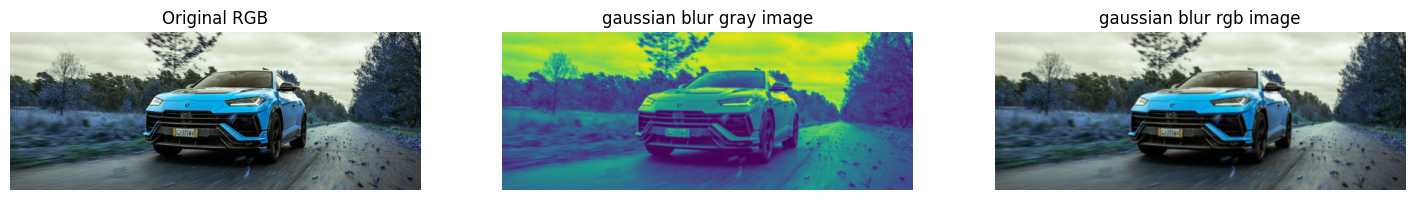

In [ ]:
gauss_blur_gray= gaussian_blur_gray(img_gray, 5,1.0)
gauss_blur_rgb=  gaussian_blur_rgb(img_rgb, 5,1.0)

plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.imshow(img_rgb.astype(np.uint8))
plt.title("Original RGB")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(gauss_blur_gray)
plt.title("gaussian blur gray image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(np.clip(gauss_blur_rgb, 0, 255).astype(np.uint8))
plt.title("gaussian blur rgb image")
plt.axis("off")

### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

sobel_x= np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

sobel_y= np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)

(np.float64(-0.5), np.float64(1037.5), np.float64(399.5), np.float64(-0.5))

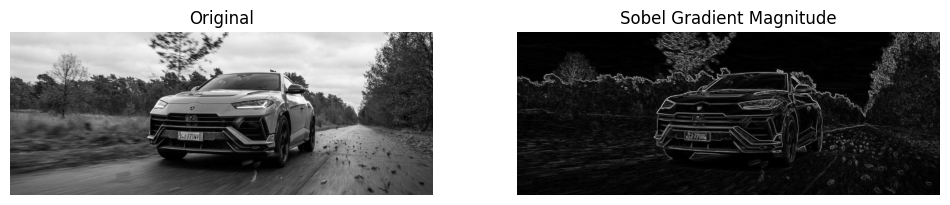

In [74]:
def sobel_edges(img_gray):
    Gx= convolve(img_gray,sobel_x)
    Gy= convolve(img_gray,sobel_y)

    magnitude= np.sqrt(Gx**2 + Gy**2)

    # Normalize to 0–255
    magnitude= magnitude/ magnitude.max() * 255
    direction= np.arctan2(Gy,Gx)* (180 / np.pi)

    return magnitude, direction

mag, theta= sobel_edges(img_gray)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1);
plt.imshow(img_gray, cmap='gray');
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2);
plt.imshow(mag, cmap='gray');
plt.title("Sobel Gradient Magnitude")
plt.axis("off")
# plt.show()

### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



In [ ]:
laplacian_kernel= np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
], dtype=np.float32)

In [ ]:
def laplacian_sharpen(img_gray):

    img= img_gray.astype(np.float32)
    lap= convolve(img, laplacian_kernel)
    sharp= img- lap
    return np.clip(sharp, 0, 255)

In [ ]:
# Using alpha = 1
sharp_numpy= laplacian_sharpen(img_gray)

gray_float= img_gray.astype(np.float32)
lap_cv= cv2.Laplacian(img_gray, cv2.CV_32F)
sharp_cv= gray_float - lap_cv
sharp_cv= np.clip(sharp_cv, 0, 255)

# Verify equality
exact_match= np.allclose(sharp_numpy, sharp_cv)
print("Exact matrix match:", exact_match)

Exact matrix match: False


(np.float64(-0.5), np.float64(1037.5), np.float64(399.5), np.float64(-0.5))

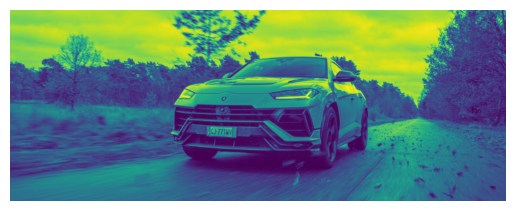

In [ ]:
def unsharp_mask(img, ksize, sigma, alpha):
    blurred= gaussian_blur_gray(img, ksize, sigma)
    mask= img -blurred
    sharp= img + (alpha * mask)
    return np.clip(sharp, 0, 255)

img_sharp= unsharp_mask(img_gray, 5, .6, -.5) # negative alpha= blurred image
plt.imshow(img_sharp)
plt.axis("off")

### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

def magnitude_spectrum(img):
    f= np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude = np.log(1 +np.abs(fshift))
    return magnitude

orig_mag= magnitude_spectrum(img_gray)
blur_mag= magnitude_spectrum(gaussian_blur_gray(img_gray, 7, 1.0))
unsharp_mag= magnitude_spectrum(unsharp_mask(img_gray, 7, 1.0, 1.5))

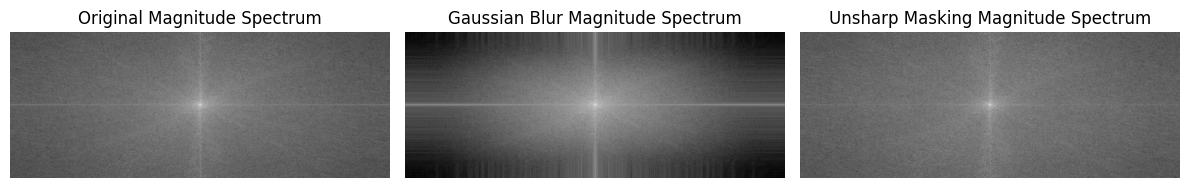

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(orig_mag, cmap="gray")
plt.title("Original Magnitude Spectrum")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(blur_mag, cmap="gray")
plt.title("Gaussian Blur Magnitude Spectrum")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(unsharp_mag, cmap="gray")
plt.title("Unsharp Masking Magnitude Spectrum")
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# Dark center  implies Low frequencies while Bright edges implies High frequencies

# In Gaussian Blur high frequencies are removed (LPF)
# In Sharpening low freuencies are removed (HPF)
# Increasing alpha increases high frequency energy.

### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

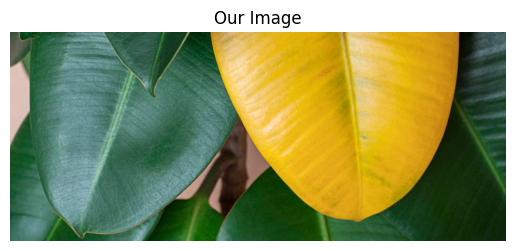

In [ ]:
plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.
edge_kernel= np.array([
    [-1,-1,-1],
    [-1, 8,-1],
    [-1,-1,-1]
], dtype=np.float32)

(np.float64(-0.5), np.float64(1139.5), np.float64(479.5), np.float64(-0.5))

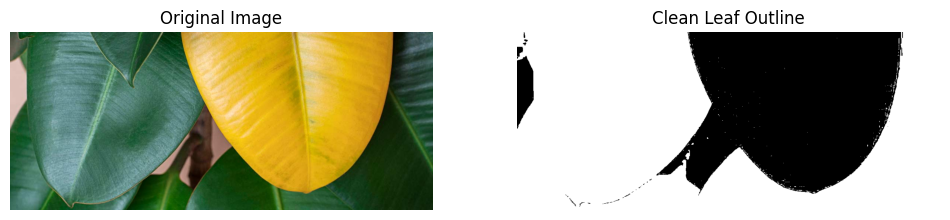

In [ ]:
def yellow_edge_detector(img):
    R,G,B= img[:, :, 0], img[:, :, 1], img[:, :, 2]

    # Edge responses
    r_edge= convolve(R, edge_kernel)
    g_edge= convolve(G, edge_kernel)

    # Color difference
    rg_diff= R-G
    response= np.abs(r_edge - g_edge) + np.abs(rg_diff)

    # Normalize
    response= response / response.max() * 255
    return response.astype(np.uint8)

yellow_edges= yellow_edge_detector(img_part5)
clean_edges= np.zeros_like(yellow_edges)
clean_edges[yellow_edges > 60]= 255

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.imshow(img_part5.astype(np.uint8))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(clean_edges, cmap='gray')
plt.title("Clean Leaf Outline")
plt.axis("off")

### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
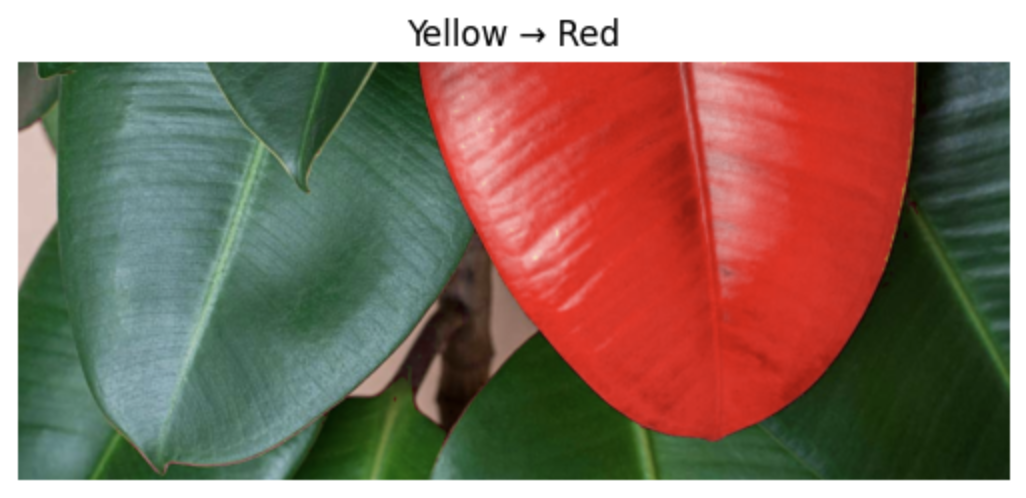

Also, we can change to a less brighter colour
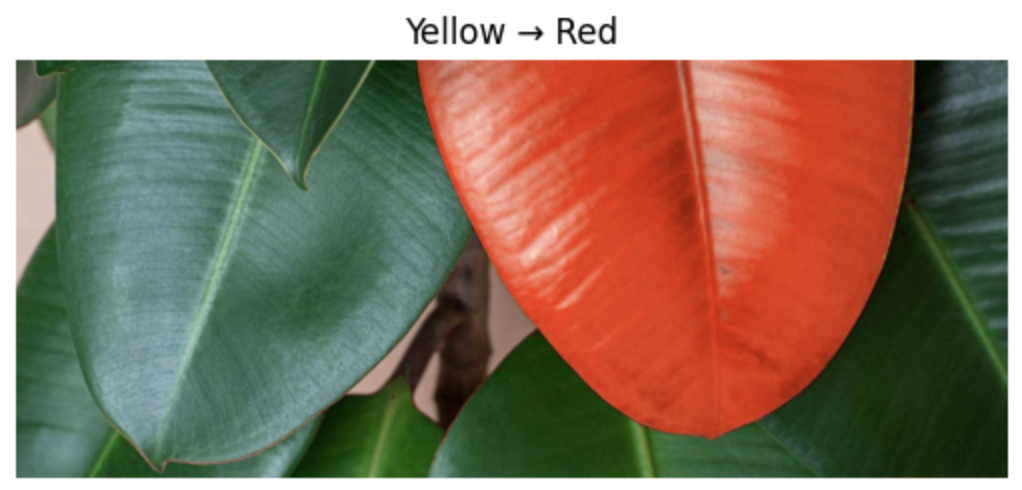

In [ ]:
# Your BONUS PART codes follow here. You can create more cells under this. Write clean and commented code.